<p style="text-align: center;">Data Science Project</p>
<p style="text-align: center;">By</p>
<p style="text-align: center;">Saar Golan</p>

# Introduction

## Statement and assignment conditions

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele personal data, including information about their plans and contracts.

**Interconnect services**

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *Digital Subscriber Line*) or through a fiber optic cable.

Other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract.  
They can use various payment methods and receive an electronic invoice after a transaction.

**Data Description**

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.  

The target feature: the 'EndDate' column equals 'No'.

## Data

Data available at:  
[final_provider.zip]  
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ac39c23b-718e-4cd6-bdaa-85b3a127a457/final_provider.zip  

The data is also located on the platform in the '/datasets/final_provider/' folder.

## Literature review

Left for report

## Performance evaluation

* This is a classification task. We are required to classify clients at churn risk. We are predicting a boolean parameter (0/1).  
* There is imbalance in the data because typically, fewer clients are moving at each given moment. We must be aware of this issue.  
* The context suggests that in our case a FN (False Negative, Type II error) result is much worse than a FP (False Positive, Type I error). I.e., if we get a wrong classification and identify a client as at risk, we may loose some money on discounts. But, if we wrongly classify him/her as not at risk, we may loose them altogether.  
This is alike to classic medical screening for a disease. A Type I error may give a patient some anxiety. This will lead to other testing procedures that will eventually reveal the initial test was incorrect. In contrast, a Type II error could give a patient the incorrect assurance that he or she does not have a disease when he or she in fact does. As a result of this incorrect information, the disease would not be treated. If doctors could choose between these two options, a false positive is more desirable than a false negative.  
* In such classic cases the AUC-ROC is a good classic ranking metric (as long as the dataset is not severely imbalanced, say at a 1:100 ratio and below) and we will employ it. Luckily, it is also the metric the client requests. 
* As a threshold metric, we will use the F1 score (see discussion above).
* The client also asks for accuracy results, so those will be provided as well.

## Project objectives

* Predict churn based on provided data.  
* The classification needs to have an AUC-ROC of at least 0.88.  
* F1 and accuracy/PRC metrics will also be documented to compare different models.

## Environment initialization

### Install/update packages

In [2]:
#!pip install --upgrade matplotlib

In [3]:
#!pip install --upgrade numpy 

In [4]:
#!pip install --upgrade pandas 

In [5]:
#!pip install --upgrade scikit-learn 

In [6]:
#!pip install spacy==3.2.0

In [7]:
# !pip install --user category_encoders

In [8]:
#!pip install --user tqdm

### Import basic packages

In [9]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()
#from tqdm.auto import tqdm  #does not work
#from tqdm.notebook import tqdm    #does not work

import warnings

### Import ML packages

In [10]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import TimeSeriesSplit #time series cross validation
# from sklearn.compose import ColumnTransformer
# from sklearn import tree
from sklearn import metrics
# import lightgbm as lgb
# import catboost as ctbst
# from catboost import CatBoostRegressor, Pool 
# Pool to define categorical data
# Pool_train=Pool(X_train,y_train,cat_features=[...])
# Pool_test=Pool(X_test,cat_features=[...])
# Does not work with gridsearch CV and pipeline

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import mean_squared_error #as mse
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Lasso
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.neighbors import NearestNeighbors               # added NearestNeighbors 
#from sklearn.neighbors import KNeighborsClassifier           # added kNN

from sklearn import preprocessing
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#from category_encoders import TargetEncoder
#from functools import partial as prt

#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV             # optimize hyper-parameters
#from sklearn.model_selection import RandomizedSearchCV       # Reduce number of iterations/cost of computation with random combination of parameters. 
#from sklearn.metrics import make_scorer                      # required to impose a custom made score function
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.pipeline import make_pipeline

#Imputation
#from sklearn.impute import KNNImputer                        #KNN imputer
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.impute import SimpleImputer

#from sklearn.utils import shuffle

### Output and display

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)  #was -1
plt.rcParams.update({'figure.max_open_warning': 0})

#Output all cell commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display as displaytab

#Base64 to encode fast image display
from IPython import display 
from base64 import b64decode 
#https://www.base64-image.de/

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'
#https://stackoverflow.com/questions/51937381/increase-dpi-of-matplotlib-show-in-jupyter-notebook
plt.style.use('seaborn')

# Task 1

Explore the data.  
Prepare a detailed plan on how you are going to approach the project.  
Write a detailed step by step guide to explain what you need to do as a Data Scientist to complete the project.  
This plan needs to be agreed with me.  
The plan should be in a form of a Jupyter notebook (in markdown) and submitted from the platform.  
Read in the dataset and do a bit of data exploration, so your plan is based on what you've noted from the initial exploration.

## Data

### Import data

contract = pd.read_csv('contract.csv', parse_dates=['BeginDate'], 
                         dtype={'Type': 'category',
                                'PaperlessBilling': 'category',
                                'PaymentMethod': 'category'})

personal = pd.read_csv('personal.csv',
                       dtype={'gender': 'category',
                              'SeniorCitizen': 'category',
                              'Partner': 'category',
                              'Dependents': 'category'})

internet = pd.read_csv('internet.csv',
                       dtype={'InternetService': 'category',
                              'OnlineSecurity': 'category',
                              'OnlineBackup': 'category',
                              'DeviceProtection': 'category',
                              'TechSupport': 'category',
                              'StreamingTV': 'category',
                              'StreamingMovies': 'category'})

phone = pd.read_csv('phone.csv',
                    dtype={'MultipleLines': 'category'})

In [13]:
try:
    contract = pd.read_csv('contract.csv', parse_dates=['BeginDate'], 
                           dtype={'Type': 'category',
                                  'PaperlessBilling': 'category',
                                  'PaymentMethod': 'category'})
    
    personal = pd.read_csv('personal.csv',
                           dtype={'gender': 'category',
                                  'SeniorCitizen': 'category',
                                  'Partner': 'category',
                                  'Dependents': 'category'})         
    
    internet = pd.read_csv('internet.csv',
                       dtype={'InternetService': 'category',
                              'OnlineSecurity': 'category',
                              'OnlineBackup': 'category',
                              'DeviceProtection': 'category',
                              'TechSupport': 'category',
                              'StreamingTV': 'category',
                              'StreamingMovies': 'category'})

    phone = pd.read_csv('phone.csv',
                        dtype={'MultipleLines': 'category'})

except:
    
    contract = pd.read_csv('/datasets/final_provider/contract.csv', parse_dates=['BeginDate'], 
                           dtype={'Type': 'category',
                                  'PaperlessBilling': 'category',
                                  'PaymentMethod': 'category'})
    
    personal = pd.read_csv('/datasets/final_provider/personal.csv',
                           dtype={'gender': 'category',
                                  'SeniorCitizen': 'category',
                                  'Partner': 'category',
                                  'Dependents': 'category'})         
    
    internet = pd.read_csv('/datasets/final_provider/internet.csv',
                       dtype={'InternetService': 'category',
                              'OnlineSecurity': 'category',
                              'OnlineBackup': 'category',
                              'DeviceProtection': 'category',
                              'TechSupport': 'category',
                              'StreamingTV': 'category',
                              'StreamingMovies': 'category'})

    phone = pd.read_csv('/datasets/final_provider/phone.csv',
                        dtype={'MultipleLines': 'category'})


### Description of the data

**Features:**  

1. From the table contract.csv, we have:
* customerID (string) - alphanumeric unique identifier of the client  
It is also the primary key of the database tables (all single to single connections).  
- [x] BeginDate (Datetime) - this item needs to be further analyzed to see if a certain joining/current month indicates higher churn rates (to be added in feature engineering).  
Some customers tend to join during sales or promotions and easily churn (join the competition) on similar occasions. We should check for this option.
* EndDate (Datetime/string) – this column acts as both the target and a feature.  
- [x] This data needs to be split to two columns:  
The first one is categorized (No/Yes) and indicates the churn status or the target.  
The second will be used in conjunction with the BeginDate to indicate the customer seniority in months as a feature. Most customers tend to either churn quickly due to some disappointment or unknown technical issues they were not aware of before joining or after a few years. In the latter case it is typically due to finding a more economical plan. The loyal customers will be assigned the last date February 1st 2020 since it was provided by the client as the database last valid date.
* Type (categorical) – the contract/payment type
- [x] Needs to be parsed as categorical
* PaperlessBilling (categorical) - whether the client favors an electronic or paper invoice
- [x] Needs to be parsed as categorical
* PaymentMethod (categorical) - the client payment method
- [x] Needs to be parsed as categorical
* MonthlyCharges (Numeric) - the client monthly charges. (Indicates their usage level).
* TotalCharges (Numeric) - the client overall charges. (Usually indicates their usage level/monthly payment * seniority in months. But could possibly include fines for early churners or coupons or some other anomalous expenditures).
- [x] This column should be  parsed as numerical but only parses as string. We need to discover why. 

2. From the table personal.csv, we have:
* gender (categorical) - the client gender
- [x] Needs to be parsed as categorical
* SeniorCitizen (categorical) - whether the client is a senior citizen (does affect communication habbits - perhaps more phone or less internet...)
- [x] Needs to be parsed as categorical
* Partner (categorical) - Unknown meaning. Could represent whether the client has a partner/spouse using the services as well.
- [x] Needs to be parsed as categorical
* Dependents (categorical) - unknown meaning. Could represent whether the client has (pays for) a dependent extension customer (say kids, second line, security alarm line, etc).
- [x] Needs to be parsed as categorical

3. From the table internet.csv, we have:
* InternetService (categorical) - whether the customer uses internet services
- [x] Needs to be parsed as categorical
* OnlineSecurity (categorical) - whether the customer uses online security
- [x] Needs to be parsed as categorical
* OnlineBackup (categorical) - whether the customer uses cloud backup services
- [x] Needs to be parsed as categorical
* DeviceProtection (categorical) - whether the customer uses antivirus services
- [x] Needs to be parsed as categorical
* TechSupport (categorical) - whether the customer uses technical support services
- [x] Needs to be parsed as categorical
* StreamingTV (categorical) - whether the customer uses streaming TV services
- [x] Needs to be parsed as categorical
* StreamingMovies (categorical) - whether the customer uses streaming movies services
- [x] Needs to be parsed as categorical

4. From the table phone.csv, we have:
* MultipleLines (categorical) - whether the customer has multiple land lines
- [x] Needs to be parsed as categorical

**Target:**  
* EndDate (Datetime/string) – this column acts as both the target and a feature.  
See advised treatment above.  
Eventually it will become a boolean churn indicator.

## EDA and data preparation

### Remove unnecessary columns

None needs removing at present.

### Examine data

In [14]:
def examine(fname):
    print('\n***************\n head:')
    displaytab(fname.head())
    print('\n***************\n tail:')
    displaytab(fname.tail())
    print('\n\n***************\n General info:\n')
    fname.info(memory_usage='deep')
    print('\n***************\n describe:\n', fname.describe(), '\n')
    print('\n***************\n nulls:\n', fname.isna().sum(), '\n')   
    print('\n***************\n duplicated:\n', fname.duplicated().sum(), '\n')
    
    # Exploring categorical variables
    for column in fname.select_dtypes(exclude=['number', 'datetime64[ns]', 'object']).columns:
        print('===============', column, '===============')
        print(fname[column].value_counts().head(25))
        print('Total No. of values:', fname[column].value_counts().count())
        print('\n')

#### contract

In [15]:
examine(contract)


***************
 head:


customerID  BeginDate              EndDate            Type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW 2016-05-01                   No        One year   
4  9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65


***************
 tail:


customerID  BeginDate              EndDate            Type  \
7038  6840-RESVB 2018-02-01                   No        One year   
7039  2234-XADUH 2014-02-01                   No        One year   
7040  4801-JZAZL 2019-03-01                   No  Month-to-month   
7041  8361-LTMKD 2019-07-01  2019-11-01 00:00:00  Month-to-month   
7042  3186-AJIEK 2014-08-01                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
7038              Yes               Mailed check           84.80       1990.5  
7039              Yes    Credit card (automatic)          103.20       7362.9  
7040              Yes           Electronic check           29.60       346.45  
7041              Yes               Mailed check           74.40        306.6  
7042              Yes  Bank transfer (automatic)          105.65       6844.5



***************
 General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(1), object(3)
memory usage: 1.4 MB

***************
 describe:
        MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000 


*******

Intermediate conclusions:  
* No significant low/high outliers appear for the numerical MonthlyCharges column
* No nulls
* No duplicates
* Most subscriptions are monthly. Only a third of the monthly clients have one/two year subscription.
* Most customers prefer electronic invoices.
* The customres preferred payment method is quite balanced.
* The TotalCharges column will not be parsed as numerical. We will have to investigate into the matter.

#### personal

In [16]:
examine(personal)


***************
 head:


customerID  gender SeniorCitizen Partner Dependents
0  7590-VHVEG  Female             0     Yes         No
1  5575-GNVDE    Male             0      No         No
2  3668-QPYBK    Male             0      No         No
3  7795-CFOCW    Male             0      No         No
4  9237-HQITU  Female             0      No         No


***************
 tail:


customerID  gender SeniorCitizen Partner Dependents
7038  6840-RESVB    Male             0     Yes        Yes
7039  2234-XADUH  Female             0     Yes        Yes
7040  4801-JZAZL  Female             0     Yes        Yes
7041  8361-LTMKD    Male             1     Yes         No
7042  3186-AJIEK    Male             0      No         No



***************
 General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   category
 3   Partner        7043 non-null   category
 4   Dependents     7043 non-null   category
dtypes: category(4), object(1)
memory usage: 489.0 KB

***************
 describe:
         customerID gender SeniorCitizen Partner Dependents
count         7043   7043          7043    7043       7043
unique        7043      2             2       2          2
top     7590-VHVEG   Male             0      No         No
freq             1   3555          5901    3641       4933 


***************
 nulls:
 customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64 


***************
 duplicated:

Intermediate conclusions:  
* No nulls
* No duplicates
* The gender and partner categories are quite balanced.
* There are much less senior citizens than regular customers.
* There are much more non-dependents than dependents (I guess you would have to be a customer first if you are to have other dependent customers).

#### Internet

In [17]:
examine(internet)


***************
 head:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No


***************
 tail:


customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
5512  6840-RESVB             DSL            Yes           No              Yes   
5513  2234-XADUH     Fiber optic             No          Yes              Yes   
5514  4801-JZAZL             DSL            Yes           No               No   
5515  8361-LTMKD     Fiber optic             No           No               No   
5516  3186-AJIEK     Fiber optic            Yes           No              Yes   

     TechSupport StreamingTV StreamingMovies  
5512         Yes         Yes             Yes  
5513          No         Yes             Yes  
5514          No          No              No  
5515          No          No              No  
5516         Yes         Yes             Yes



***************
 General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5517 non-null   object  
 1   InternetService   5517 non-null   category
 2   OnlineSecurity    5517 non-null   category
 3   OnlineBackup      5517 non-null   category
 4   DeviceProtection  5517 non-null   category
 5   TechSupport       5517 non-null   category
 6   StreamingTV       5517 non-null   category
 7   StreamingMovies   5517 non-null   category
dtypes: category(7), object(1)
memory usage: 399.7 KB

***************
 describe:
         customerID InternetService OnlineSecurity OnlineBackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            309

Intermediate conclusions:  
* This database is smaller than the contract/personal databases.  
Quite reasonably, not all clients use internet services as we have above 7000 listed entries for the contract and personal datasets and only ~5500 clients listed for internet services. This will pose a problem upon merge. However, we cannot drop ~1500 rows with missing values. Therefore, after the merge I will add a 'missing' category to all the lacking entries (rather than imputing as this can prove challenging for such a boolean-parameter based dataset with no option to impute using average/median values.
* No nulls
* No duplicates
* The InternetService, OnlineBackup, DeviceProtection, StreamingTV and StreamingMovies categories are quite balanced.
* There are much more clients using OnlineSecurity than those not using.
* There are much less clients using TechSupport than those not using.

#### Phone

In [18]:
examine(phone)


***************
 head:


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


***************
 tail:


customerID MultipleLines
6356  2569-WGERO            No
6357  6840-RESVB           Yes
6358  2234-XADUH           Yes
6359  8361-LTMKD           Yes
6360  3186-AJIEK            No



***************
 General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     6361 non-null   object  
 1   MultipleLines  6361 non-null   category
dtypes: category(1), object(1)
memory usage: 422.7 KB

***************
 describe:
         customerID MultipleLines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390 


***************
 nulls:
 customerID       0
MultipleLines    0
dtype: int64 


***************
 duplicated:
 0 

=============== MultipleLines ===============
No     3390
Yes    2971
Name: MultipleLines, dtype: int64
Total No. of values: 2




Intermediate conclusions:  
* This database is also smaller than the contract/personal databases.  
Quite reasonably, not all clients use phone services as well. Today, many clients use phone over IP applications (such as whatsapp calls) and do not even bother with a real phone line. Again, after the merge I will have to add a 'missing' category to all the lacking entries.
* The database is quite balanced.

### Nulls and improper values

We have those only for the contract database.  
The other databases are fine.

#### TotalCharges

We have no nulls.  
However, the column 'TotalCharges' will not be imported as numeric.  
Let's try and examine why.  
We may have empty strings or whitspaces (probably human encoding errors...)

In [19]:
contract.loc[contract['TotalCharges'].isna()]

Empty DataFrame
Columns: [customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []

No nulls (but we already saw that above).

Let's look for blanks and white spaces:

In [20]:
(contract['TotalCharges'].values == '').sum() 
(contract['TotalCharges'].values == ' ').sum()
(contract['TotalCharges'].values == '  ').sum()

0

11

0

We have 11 whitespaces (single).  

In [21]:
contract.loc[contract['TotalCharges'] == ' ']

customerID  BeginDate EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01      No  Two year              Yes   
753   3115-CZMZD 2020-02-01      No  Two year               No   
936   5709-LVOEQ 2020-02-01      No  Two year               No   
1082  4367-NUYAO 2020-02-01      No  Two year               No   
1340  1371-DWPAZ 2020-02-01      No  Two year               No   
3331  7644-OMVMY 2020-02-01      No  Two year               No   
3826  3213-VVOLG 2020-02-01      No  Two year               No   
4380  2520-SGTTA 2020-02-01      No  Two year               No   
5218  2923-ARZLG 2020-02-01      No  One year              Yes   
6670  4075-WKNIU 2020-02-01      No  Two year               No   
6754  2775-SEFEE 2020-02-01      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  
488   Bank transfer (automatic)           52.55               
753                Mailed check           20.25               
936                Mailed check           80.85               
1082               Mailed check           25.75               
1340    Credit card (automatic)           56.05               
3331               Mailed check           19.85               
3826               Mailed check           25.35               
4380               Mailed check           20.00               
5218               Mailed check           19.70               
6670               Mailed check           73.35               
6754  Bank transfer (automatic)           61.90

We have 11 customers that just joined our services.  
They cannot churn on the same day they joined.  
So this data is useless.  
Let's remove it.
But before we do, we will store these customers ids and remove them from the other databases as well.

In [22]:
white = contract.loc[contract['TotalCharges'] == ' ', 'customerID'].copy()

In [23]:
white

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object

In [24]:
contract.drop(contract.loc[contract['TotalCharges'] == ' '].index, inplace=True)

In [25]:
contract.loc[contract['TotalCharges'] == ' ']

Empty DataFrame
Columns: [customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []

Fixed.  
Let's convert our data to numeric.

In [26]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

Let's remove these customers from the other databases so the merge is clean:

In [27]:
personal.drop(personal.loc[personal['customerID'].isin(white)].index, inplace=True)

In [28]:
internet.drop(internet.loc[internet['customerID'].isin(white)].index, inplace=True)

In [29]:
phone.drop(phone.loc[phone['customerID'].isin(white)].index, inplace=True)

#### EndDate

As explained above, this column contains two types of information. The first is categorized (No/Yes) and indicates the churn status or the target. The second type will be used in conjunction with the BeginDate to indicate the customer seniority in months as a feature. Most customers tend to either churn quickly due to some disappointment or unknown technical issues they were not aware of before joining or after a few years. In the latter case it is probably due to finding a more economical plan. The loyal customers will be assigned the last date February 1st 2020 since it was provided by the client as the last valid date.

In [30]:
contract['churn'] = 1
contract['churn'] = contract['churn'].astype('category')

In [31]:
contract['churn'] = contract['churn'].cat.add_categories(0)
contract.loc[contract['EndDate'] == 'No', 'churn'] = 0

In [32]:
from datetime import date, time, datetime

Let's replace the improper EndDate values with the valid date:

In [33]:
contract.loc[contract['EndDate'] == 'No', 'EndDate'] = datetime.strptime('2020-02-01', "%Y-%m-%d") #np.nan

Convert the column to date (we will need this later to calculate the seniority feature):

In [34]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

Let's verify proper datasets types:

In [35]:
contract.head()
contract.info()

customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges churn  
0           Electronic check           29.85         29.85     0  
1               Mailed check           56.95       1889.50     0  
2               Mailed check           53.85        108.15     1  
3  Bank transfer (automatic)           42.30       1840.75     0  
4           Electronic check           70.70        151.65     1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   category      
 4   PaperlessBilling  7032 non-null   category      
 5   PaymentMethod     7032 non-null   category      
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   category      
dtypes: category(4), datetime64[ns](2), float64(2), object(1)
memory usage: 357.6+ KB


Everything seems fine.

### Imbalance check

Let's check the target balance:  
(for feature imbalance see examination above)

In [36]:
contract.churn.value_counts()

0    5163
1    1869
Name: churn, dtype: int64

We have an imbalanced dataset.  
Ideally, we should consider upsampling the churn = 1 (churned) class. This is typically performed using smote. However, in a dataset such as ours, where nearly all data is categorical, this could be problematic. The imbalanced learn module offers SMOTE-NC (SMOTE-Non Continuous):  
"SMOTE-NC slightly changes the way a new sample is generated by performing something specific for the categorical features. In fact, the categories of a new generated sample are decided by picking the most frequent category of the nearest neighbors present during the generation."  
However, this approach could lead to significant bias when nearly all features are categorical.  
So we will not upsample.  

[1] https://imbalanced-learn.org/stable/over_sampling.html  
[2] https://stackoverflow.com/questions/47655813/oversampling-smote-for-binary-and-categorical-data-in-python  
[3] Chawla et al., SMOTE: Synthetic Minority Over-sampling Technique, Journal of Artificial Intelligence Research 16 (2002), 321 - 357. Submitted 09/01; published 06/02. Section 6.1.  
https://www.jair.org/index.php/jair/article/view/10302

### Outliers

Let's check for outliers.  
We only have two numeric features (in contract dataframe).  

In [37]:
contract.describe()

MonthlyCharges  TotalCharges
count     7032.000000   7032.000000
mean        64.798208   2283.300441
std         30.085974   2266.771362
min         18.250000     18.800000
25%         35.587500    401.450000
50%         70.350000   1397.475000
75%         89.862500   3794.737500
max        118.750000   8684.800000

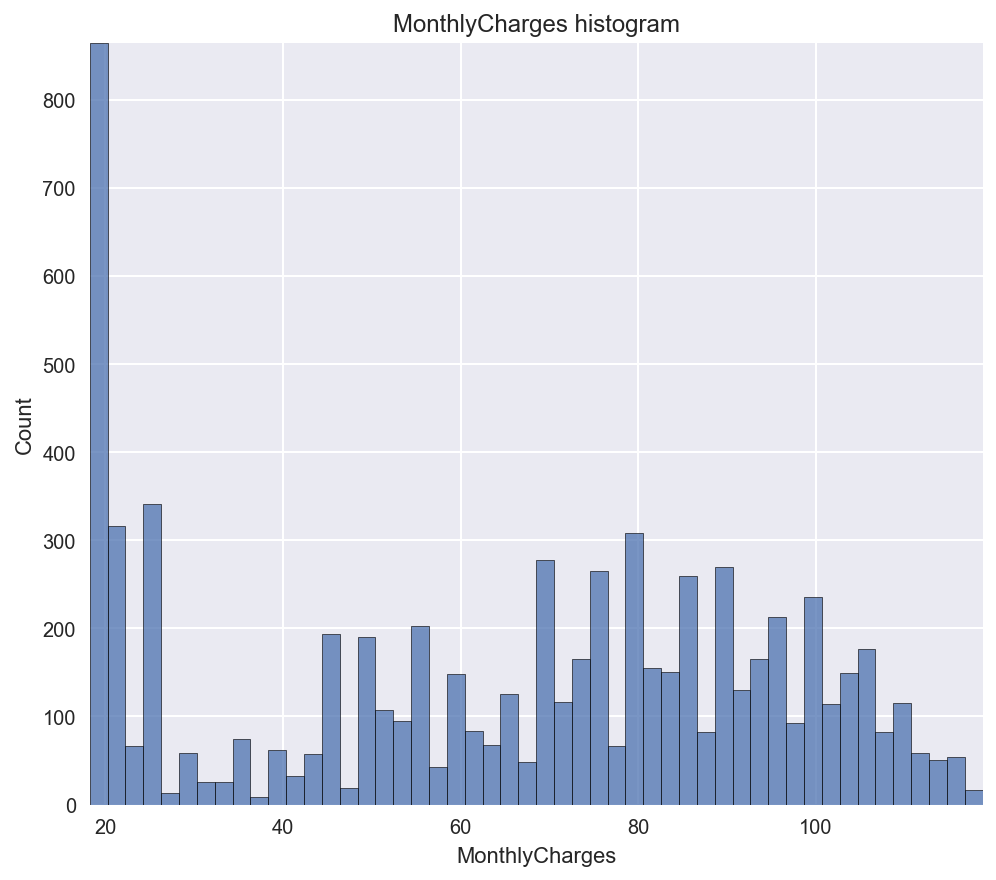

In [38]:
fig_init = plt.figure(figsize=(8,7))
plot = sns.histplot(data=contract, x="MonthlyCharges", bins=50)
plot.autoscale(axis="x", tight=True, enable=True) 
plot.autoscale(axis="y", tight=True, enable=True)
tit = plt.title('MonthlyCharges histogram')
plt.show()

In [39]:
contract.loc[contract['MonthlyCharges'] < 18, 'customerID'].count()

0

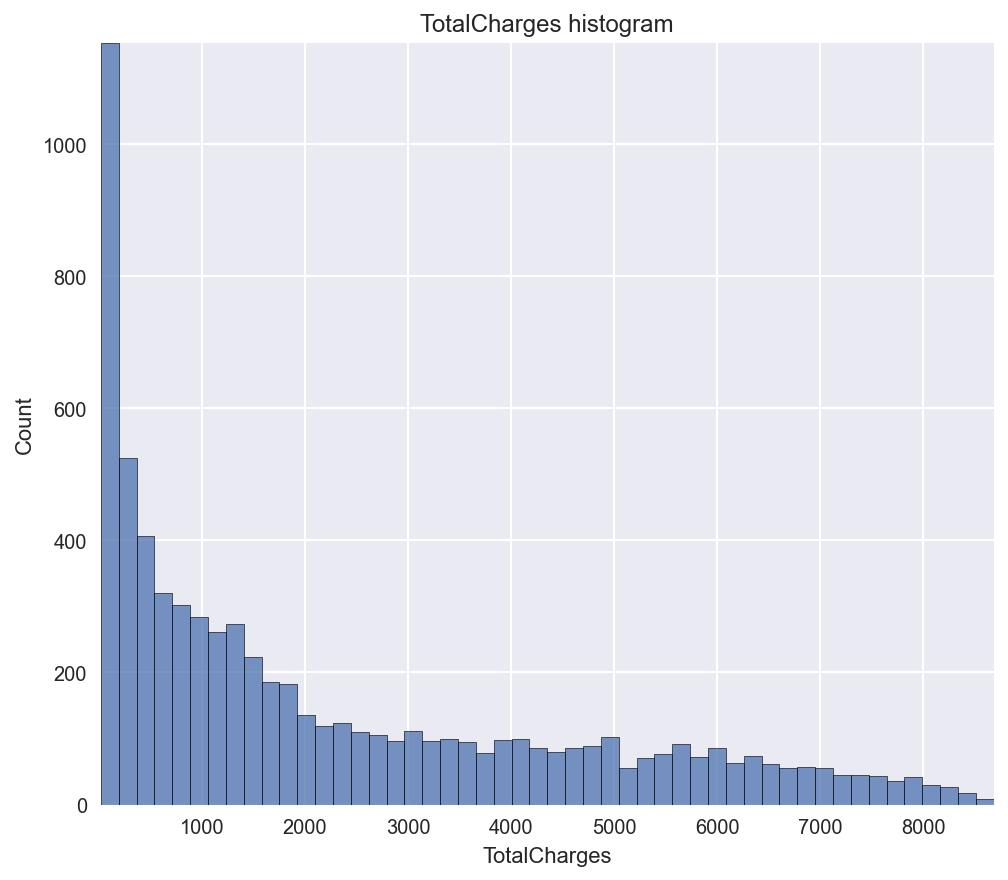

In [40]:
fig_init = plt.figure(figsize=(8,7))
plot = sns.histplot(data=contract, x="TotalCharges", bins=50)
plot.autoscale(axis="x", tight=True, enable=True) 
plot.autoscale(axis="y", tight=True, enable=True)
tit = plt.title('TotalCharges histogram')
plt.show()

We have a group of people paying a reduced monthly fee of ~20-30 Dollars.  
These are probably 'light line' plans like security alarm lines or pay per talk (talkman) lines where the services are very limited.  
The rest of the monthly payments are distributed up to ~120 $/month.  
The large group of very low TotalCharges suggests that there are clients that churn fast.  
In any event, we see no outstanding outliers.  

Remark - there is no use to employ statistical tests here, the result is clear and the data is far from normal so as to have any easy fix...

### Intermediate conclusions and workplan

This project data is composed nearly fully of categorical features.  
From my experience, the best approach to work with so many categorical features is to employ decision trees and not neural networks. Particularly since the data is not homogeneous like images but also contains a few numerical features.  
After correcting the imbalance using smote, I intend to compare a dummy regressor (mode), decision tree, random forest and catboost algorithms for predicting the churn. I suspect that catboost will work best as it is praised for performing well with many categorical features.  

Detailed plan:
1. First I will generate a flat file by merging all datasets on customerID and imputing missing categories with 'missing'.
2. Generate box plots of the target with the numerical features.
3. Feature enngineer the months as categorical features (see above) and the seniority (already done).
4. Check the correlation between the target and the features using a chi square test and see if some features can be discarded.
5. I will then one hot encode all categorical features as they are all low-cardinality.
6. Minmax scale the data (It is clearly not normal)
7. Establish a train (60%) - validation (20%) - test (20%) process.
8. Train the models
9. Verify that the best performing one (KFOLD selection) meets the clients AUC-ROC and accuracy demands (test data).
9. Write the appropriate conclusions.

# Task 2

Write the actual code to complete the project.  
Submit it for a review from the platform.  
Your work will be evaluated based on the end performance of your model.  
Assessment criteria is described in the project description.

## Feature engineering

Let's add a few features:
1. The BeginDate/Enddate by themselves are not as important as the subscription duration (seniority) and can even be deceiving. A customer starting subscription on 2014 appears to have presented minimal difference between the years 2015 and 2016. However, the difference between 1 and 2 years seniority is huge. Also, 2014 is not really the same year for a customer that joined on 2013 and a customer that joined on 2012. We need to add the seniority (subscription duration) feature to the database.
2. The BeginDate Month (Day does not matter as we are only looking at months kalends).  
Note that the Month parameter is to be viewed as categorical because we are looking for monthly promotional sales and holidays (seasonal effects) that increase churn probability/plan transfer.

### Seniority

In [42]:
contract['seniority'] = ((contract.EndDate - contract.BeginDate) / np.timedelta64(1,'D')).astype('int64')
# https://numpy.org/doc/stable/reference/arrays.datetime.html

In [43]:
contract.seniority.describe()

count    7032.000000
mean      987.538538
std       747.153663
min        30.000000
25%       275.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: seniority, dtype: float64

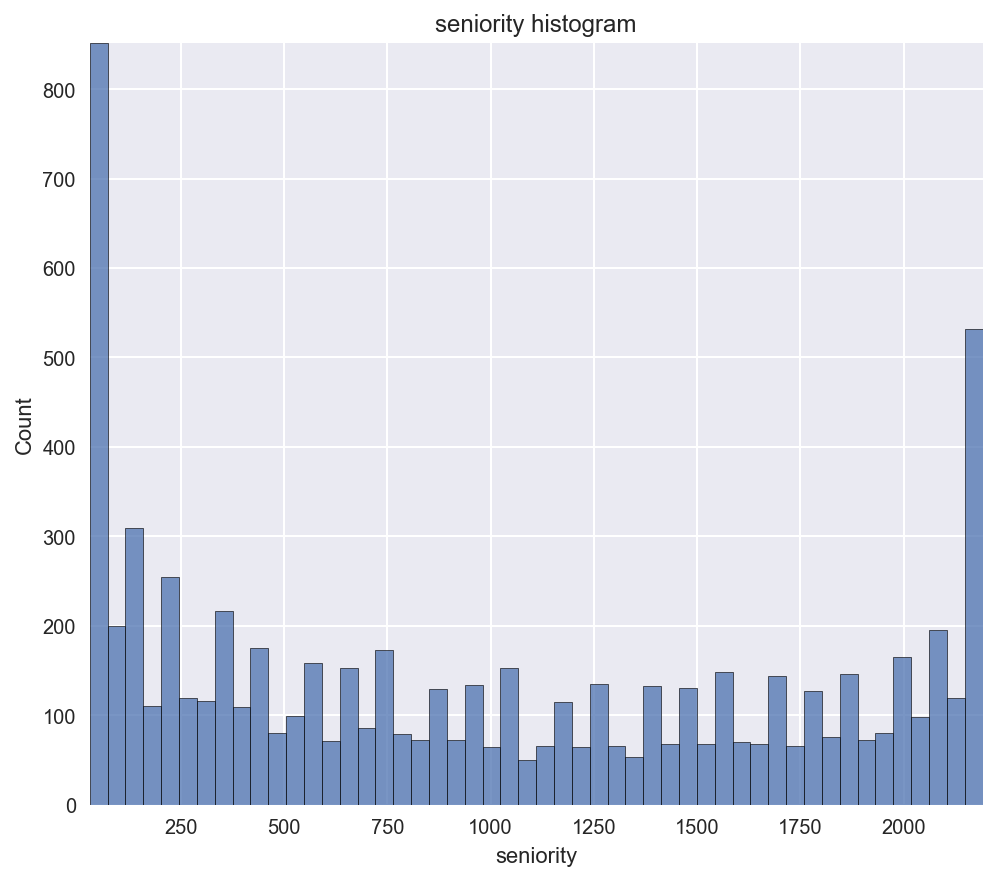

In [44]:
fig_init = plt.figure(figsize=(8,7))
plot = sns.histplot(data=contract, x=contract.seniority, bins=50)
plot.autoscale(axis="x", tight=True, enable=True) 
plot.autoscale(axis="y", tight=True, enable=True)
tit = plt.title('seniority histogram')
plt.show()

We have many early churners (low seniority customers) followed by a low-rate churning with some fluctuations period (some users always leave while new ones join). The last bin represents the pool of current loyal users that have not churned and have the longest seniority to date.  
Remark - We can see that the minimum value is 30 days. Further supporting our dropping of the 11 newcomers...

### Begin/End months

In [45]:
contract['BeginMonth'] = contract.BeginDate.dt.month.astype('category')

In [46]:
contract['EndMonth'] = contract.EndDate.dt.month.astype('category')

In [47]:
contract['BeginMonth'].value_counts()
contract['EndMonth'].value_counts()

2     793
1     623
9     623
11    621
12    604
10    601
3     590
8     532
6     522
7     518
4     511
5     494
Name: BeginMonth, dtype: int64

2     5163
11     485
12     466
1      460
10     458
Name: EndMonth, dtype: int64

More customers join on February but customer joining is indeed distributed throughout the entire year.  
In contrast, the majority of customers appear to leave on February. 10 times more than those leaving on any other month. This is naturally a mistake. We have assigned an EndMonth to loyal customers. We will fix it below.  
Furthermore, there are many months that present no churning. This is a very important find. But can it help improve our model predictions?

In [48]:
contract['EndMonth'] = contract['EndMonth'].cat.add_categories(0)
contract.loc[contract['churn'] == 0, 'EndMonth'] = 0

In [49]:
contract['EndMonth'].value_counts()

0     5163
11     485
12     466
1      460
10     458
2        0
Name: EndMonth, dtype: int64

Indeed, we can see that all churning occurs on very specific months. The problem here is that we cannot use this information. First, it constitutes data leakage. If there is a churn month, that means that the customer churned. The model will pick up on this. Second, we have no true time data (kinetics) on our customers. We do not know whether they elevated their services (joined new services or made higher monthly payments), downgraded them, changed any frequency measures (say watched less streaming TV time or less streaming movies) and so forth. This is crucial for seasonal churning analysis [1-3]. In fact, we do not even know the actual time when our client deploys our model or if the data was extracted on February but provided to us on a different month. We do not even know what is our actual current date (month). In other words, any time related analysis is virtually impossible. Therefore, the endMonth is much less useful to us.  
Nevertheless, the beginMonth does indicate a probability to churn (see below). This feature does not depend on our actual (real) time. The month a user joined does not change. Customers joining on January are, for instance, more than twice as prone to churn as customers joining on December (see below). So we will use this information by encoding this variable. In fact, since no one lives today without internet/telephone lines, it is quite reasonable to assume that our customers churned on another service provider the same time they joined our client pool. This raises the question of the significant dissimilarity between our customers join and end dates.  
To conclude, this analysis has taught us to return to our clients and ask them to further investigate the reason why clients leave only on certain months and to provide us with more time related information.  

[1] Gattermann-Itschert, Theresa & Thonemann, Ulrich. (2021). How training on multiple time slices improves performance in churn prediction.  
https://www.researchgate.net/publication/352443527_How_training_on_multiple_time_slices_improves_performance_in_churn_prediction  
[2] https://stats.stackexchange.com/questions/111124/temporal-abstraction-in-churn-analysis-why-do-we-need-it  
[3] https://towardsdatascience.com/marketing-automation-customer-churn-prediction-6001cf91d8ae

In [50]:
contract.query('BeginMonth == 1 and churn == 1').customerID.count()
contract.query('BeginMonth == 12 and churn == 1').customerID.count()

94

204

Drop the unnecessary features:

In [51]:
#contract.drop(columns = ['EndMonth', 'BeginDate', 'EndDate'], inplace = True)

# Correction for Revision 2 - remove BeginMonth as well.
contract.drop(columns = ['EndMonth', 'BeginDate', 'EndDate', 'BeginMonth'], inplace = True)

## Merge data

In [52]:
import functools as ft
from functools import reduce

In [53]:
dfs = [contract, personal, internet, phone]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='customerID', how = 'outer'), dfs)

The reduce approach is better than concat or join because it will still run when the index is not unique.  
https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns  
https://www.youtube.com/watch?v=Wce8vVezoTI

In [54]:
examine(df)


***************
 head:


customerID            Type PaperlessBilling              PaymentMethod  \
0  7590-VHVEG  Month-to-month              Yes           Electronic check   
1  5575-GNVDE        One year               No               Mailed check   
2  3668-QPYBK  Month-to-month              Yes               Mailed check   
3  7795-CFOCW        One year               No  Bank transfer (automatic)   
4  9237-HQITU  Month-to-month              Yes           Electronic check   

   MonthlyCharges  TotalCharges churn  seniority  gender SeniorCitizen  \
0           29.85         29.85     0         31  Female             0   
1           56.95       1889.50     0       1036    Male             0   
2           53.85        108.15     1         61    Male             0   
3           42.30       1840.75     0       1371    Male             0   
4           70.70        151.65     1         61  Female             0   

  Partner Dependents InternetService OnlineSecurity OnlineBackup  \
0     Yes         No             DSL             No          Yes   
1      No         No             DSL            Yes           No   
2      No         No             DSL            Yes          Yes   
3      No         No             DSL            Yes           No   
4      No         No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  
0               No          No          No              No           NaN  
1              Yes          No          No              No            No  
2               No          No          No              No            No  
3              Yes         Yes          No              No           NaN  
4               No          No          No              No            No


***************
 tail:


customerID            Type PaperlessBilling              PaymentMethod  \
7027  6840-RESVB        One year              Yes               Mailed check   
7028  2234-XADUH        One year              Yes    Credit card (automatic)   
7029  4801-JZAZL  Month-to-month              Yes           Electronic check   
7030  8361-LTMKD  Month-to-month              Yes               Mailed check   
7031  3186-AJIEK        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges churn  seniority  gender SeniorCitizen  \
7027           84.80       1990.50     0        730    Male             0   
7028          103.20       7362.90     0       2191  Female             0   
7029           29.60        346.45     0        337  Female             0   
7030           74.40        306.60     1        123    Male             1   
7031          105.65       6844.50     0       2010    Male             0   

     Partner Dependents InternetService OnlineSecurity OnlineBackup  \
7027     Yes        Yes             DSL            Yes           No   
7028     Yes        Yes     Fiber optic             No          Yes   
7029     Yes        Yes             DSL            Yes           No   
7030     Yes         No     Fiber optic             No           No   
7031      No         No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  
7027              Yes         Yes         Yes             Yes           Yes  
7028              Yes          No         Yes             Yes           Yes  
7029               No          No          No              No           NaN  
7030               No          No          No              No           Yes  
7031              Yes         Yes         Yes             Yes            No



***************
 General info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Type              7032 non-null   category
 2   PaperlessBilling  7032 non-null   category
 3   PaymentMethod     7032 non-null   category
 4   MonthlyCharges    7032 non-null   float64 
 5   TotalCharges      7032 non-null   float64 
 6   churn             7032 non-null   category
 7   seniority         7032 non-null   int64   
 8   gender            7032 non-null   category
 9   SeniorCitizen     7032 non-null   category
 10  Partner           7032 non-null   category
 11  Dependents        7032 non-null   category
 12  InternetService   5512 non-null   category
 13  OnlineSecurity    5512 non-null   category
 14  OnlineBackup      5512 non-null   category
 15  DeviceProtection  5512 non-null   cate

We find our expected nulls.  
We will fill those with a 'missing' category as explained above.  
Otherwise, the ML code will not work.

In [55]:
miss_col=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
          'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in miss_col:
    df[col] = df[col].cat.add_categories('missing')
    df[col] = df[col].fillna('missing')

The database is ready.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   Type              7032 non-null   category
 2   PaperlessBilling  7032 non-null   category
 3   PaymentMethod     7032 non-null   category
 4   MonthlyCharges    7032 non-null   float64 
 5   TotalCharges      7032 non-null   float64 
 6   churn             7032 non-null   category
 7   seniority         7032 non-null   int64   
 8   gender            7032 non-null   category
 9   SeniorCitizen     7032 non-null   category
 10  Partner           7032 non-null   category
 11  Dependents        7032 non-null   category
 12  InternetService   7032 non-null   category
 13  OnlineSecurity    7032 non-null   category
 14  OnlineBackup      7032 non-null   category
 15  DeviceProtection  7032 non-null   category
 16  TechSupport       7032 n

## Finalize EDA

### Multivariate EDA

#### Numerical features

Let's examine which features are more correlated using the correlation matrix:

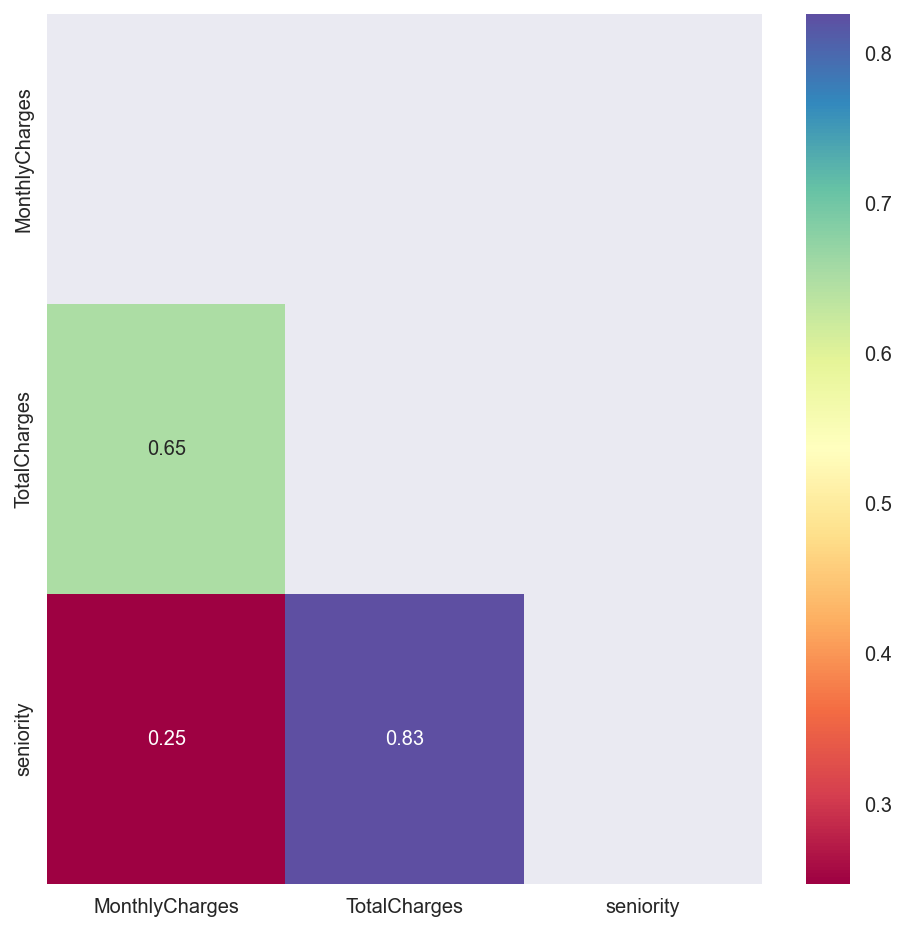

In [57]:
#Prepare mask matrix
corr_mat = df.corr()
mask_mat = np.tril(np.ones(corr_mat.shape)).astype(bool)
np.fill_diagonal(mask_mat, False)  #remove diagonal elements to improve plot resolution

#Impose mask on correlation
corr_mat_lt = corr_mat.where(mask_mat)

#Plot matrix
fig1 = plt.figure(figsize=(8, 8))
#corr_mat = df.corr()
heat_map = sns.heatmap(corr_mat_lt, annot=True, cmap="Spectral")
#cntrl0 = plt.xticks(rotation=45)

#https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/

Conclusions:  
The total charges are correlated to seniority because the longer a customer stays with the company services, the higher he/she pays. The monthly charges are less correlated since any seniority customer can pay any level of program (basic, premium...).

#### Categorical features

The correlation matrix does not cover correlations between categorical variables.  

To cover this we need the Chi-square test, Cramer’s V or Theil’s U.  
We can also use the dython package.  
I will use the Chi-square test as it is the simplest and most classic:

The test assumptions are:  
H0: Variables are not correlated (independent).  
H1: Variables are correlated (dependent).  
p >= 0.05 -> Accept H0  
p < 0.05 -> Cannot accept H0  

https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas  
https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/  
https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26  
https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7  
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9  
https://www.youtube.com/watch?v=Pjw9dG2ixAk  
https://www.youtube.com/watch?v=HKDqlYSLt68

In [58]:
cats = list(df.select_dtypes(include='category').columns)

In [59]:
print(cats)

['Type', 'PaperlessBilling', 'PaymentMethod', 'churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [60]:
from scipy import stats
from scipy.stats import chi2_contingency

for i, cati in enumerate(cats):
    j = i+1
    while j <= len(cats)-1:
        #print(i,j)
        CrosstabResult = pd.crosstab(index=df[cats[i]], columns=df[cats[j]])# ,normalize = True)
        #print('5X5 first elements of the cross table:')
        #displaytab(CrosstabResult)#.iloc[:5,:5])
        ChiSqResult = chi2_contingency(CrosstabResult)
        #print(ChiSqResult)
        print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
        if ChiSqResult[1] < 0.05:
            print(cats[i],
                  'and',
                  cats[j],
                  'variables could be correlated',
                  '\n\n')        
        else:
            print(cats[i],
                  'and',
                  cats[j],
                  'variables are not correlated',
                  '\n\n')               
        j += 1

#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/

The P-Value of the ChiSq Test is: 2.745045669938772e-48
Type and PaperlessBilling variables could be correlated 


The P-Value of the ChiSq Test is: 6.908556640756664e-213
Type and PaymentMethod variables could be correlated 


The P-Value of the ChiSq Test is: 7.326182186264635e-257
Type and churn variables could be correlated 


The P-Value of the ChiSq Test is: 0.8036646152554131
Type and gender variables are not correlated 


The P-Value of the ChiSq Test is: 5.048394653966384e-32
Type and SeniorCitizen variables could be correlated 


The P-Value of the ChiSq Test is: 6.569797961945938e-134
Type and Partner variables could be correlated 


The P-Value of the ChiSq Test is: 6.366704051182578e-90
Type and Dependents variables could be correlated 


The P-Value of the ChiSq Test is: 6.681341589232126e-128
Type and InternetService variables could be correlated 


The P-Value of the ChiSq Test is: 2.894613836236884e-274
Type and OnlineSecurity variables could be correlated 


The P-Val

Intermediate conclusions:  

* As we can see, most features are correlated among themselves and to the target (churn).  
Those that are not correlated are:  
Features:

        Type and gender variables  
        PaperlessBilling and gender  
        PaperlessBilling and Partner  
        PaymentMethod and gender  
   ~~BeginMonth and gender~~ - correction for revision 2
        EndMonth and gender  
        gender and SeniorCitizen  
        gender and Partner  
        gender and Dependents  
        gender and InternetService  
        gender and OnlineSecurity  
        gender and OnlineBackup  
        gender and DeviceProtection  
        gender and TechSupport  
        gender and StreamingTV  
        gender and StreamingMovies  
        gender and MultipleLines  
        SeniorCitizen and Partner  
        Partner and InternetService  
        Dependents and MultipleLines  

Target:

        churn and gender  

* Features that are correlated to other features reduce the performance and should be avoided. Features that are not correlated to the data are useless. Gender variable is not correlated to the target churn, so we can remove it from the database. We are left with the following non-correlated features:  

        PaperlessBilling and Partner
        SeniorCitizen and Partner  
        Partner and InternetService  
        Dependents and MultipleLines  

* The main challenge now is how to select the best features for our prediction.
* The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are indeed the chi-squared statistic used above and the mutual information statistic. There is a no 'gold-standard' all-accepted approach to do so, but there are canonic (common) procedures (see reference below). However, before performing them we will finish studying the data.  
https://machinelearningmastery.com/feature-selection-with-categorical-data/

#### Numerical vs. categorical features

Let's study each numerical feature by its categorical counterparts:  

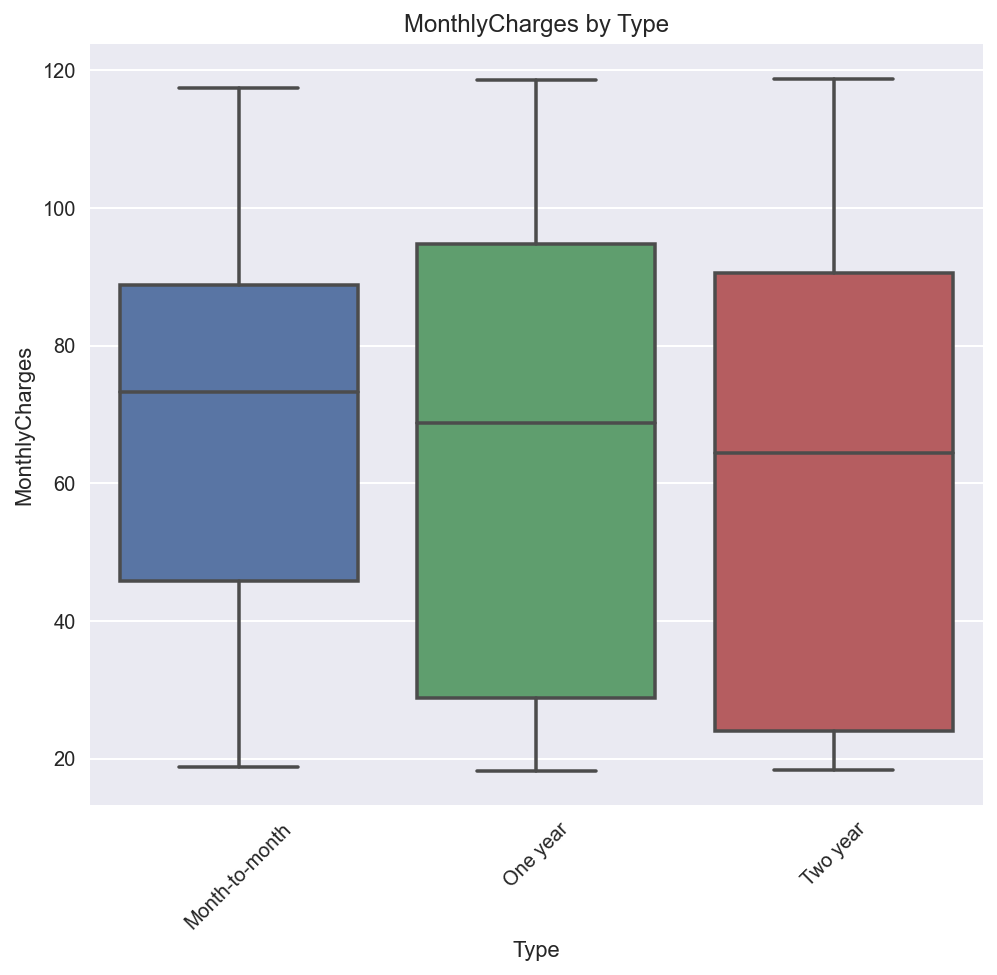

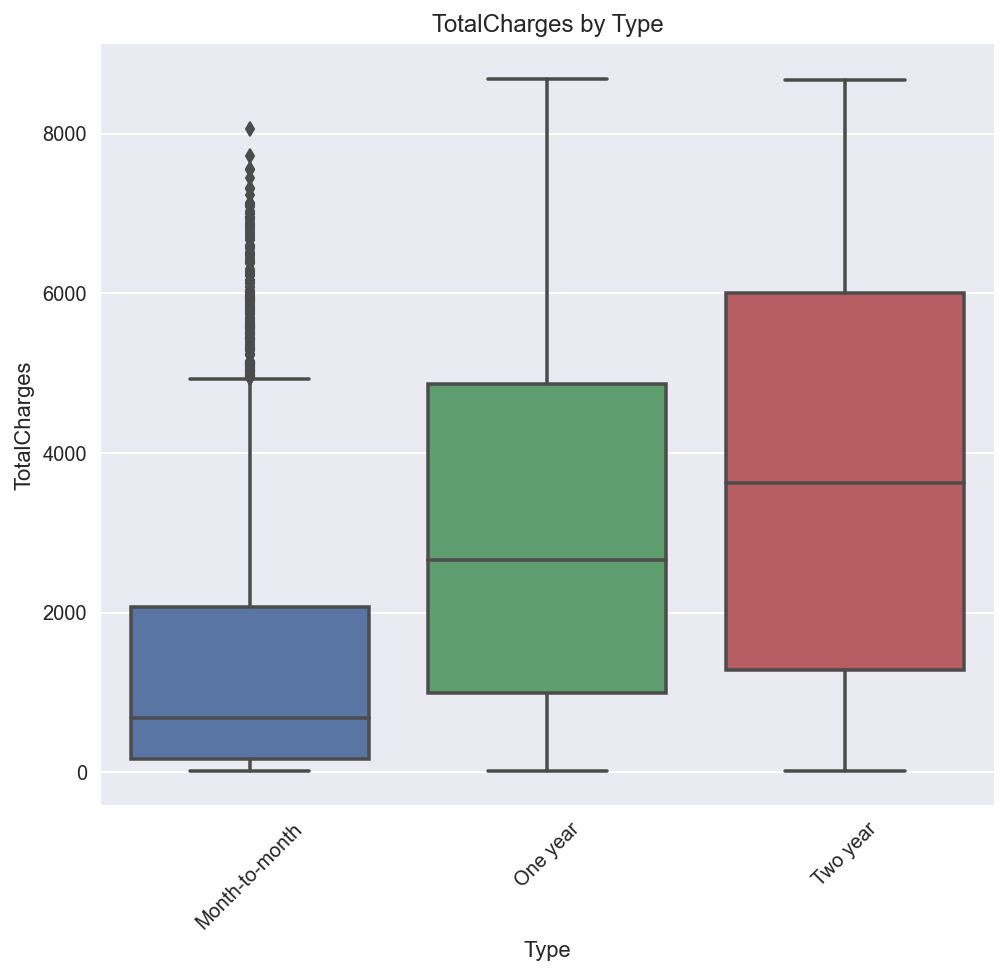

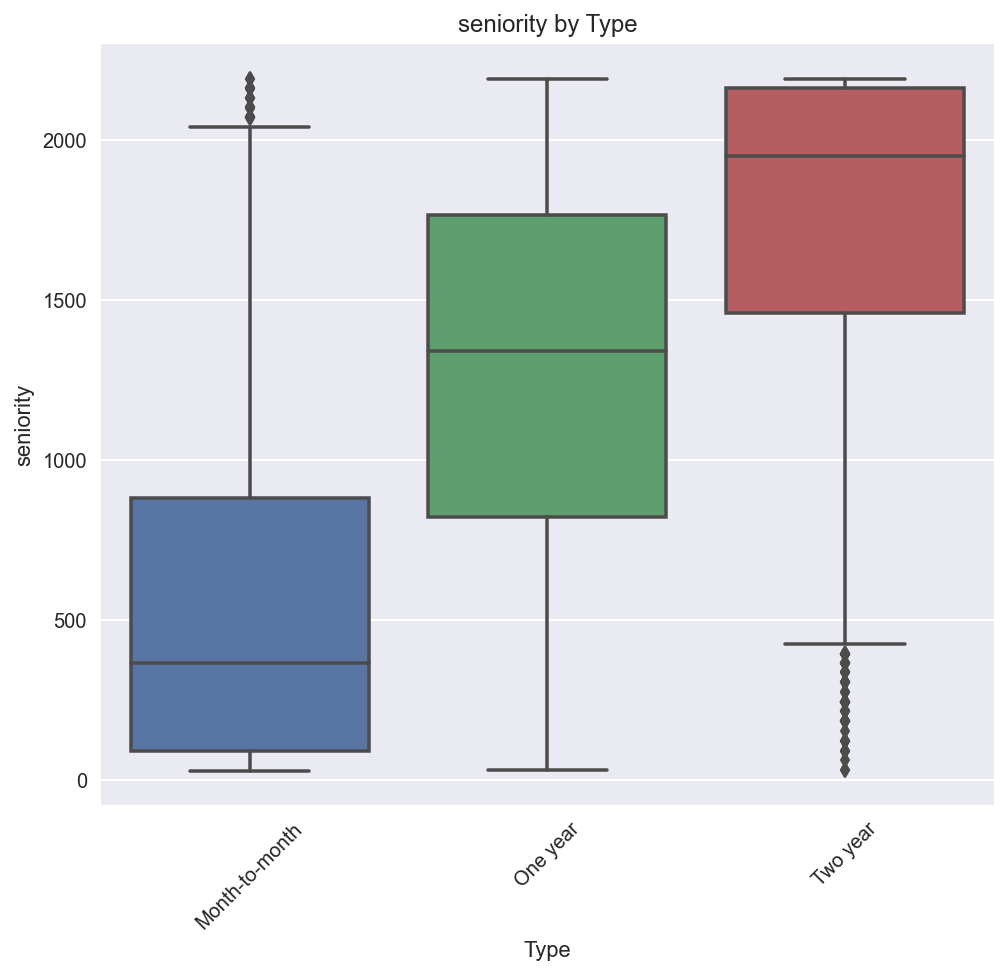

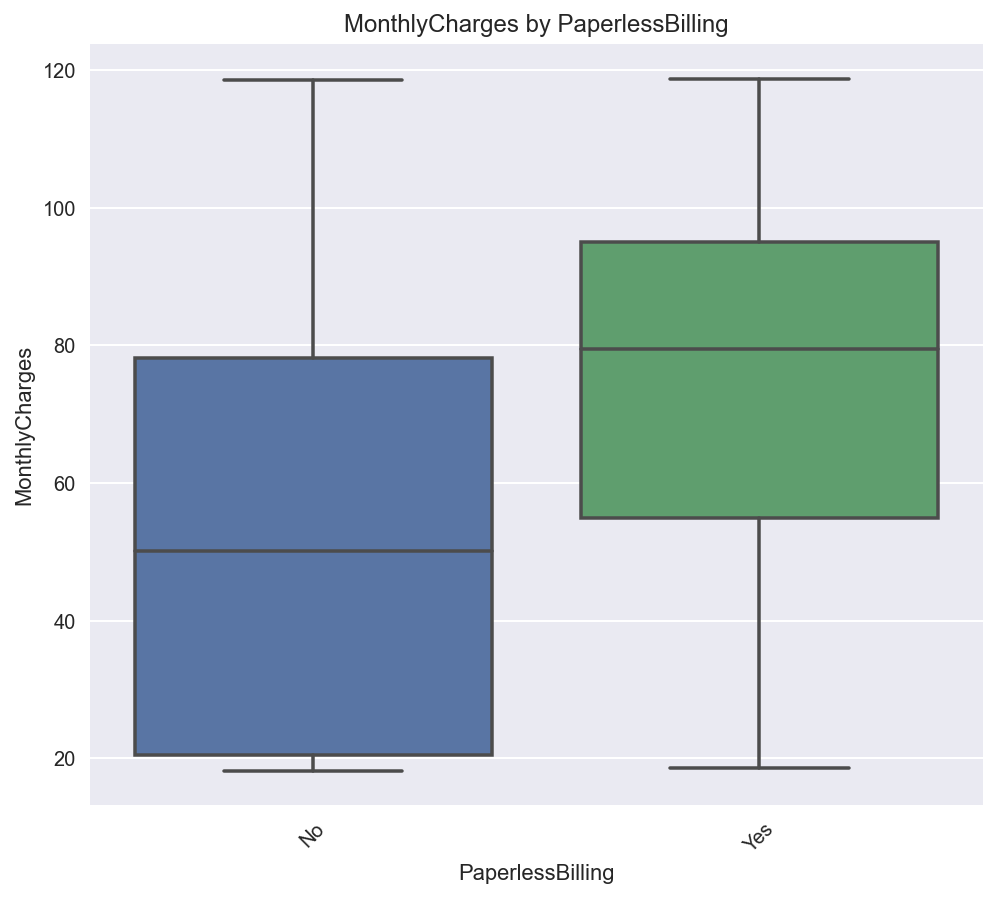

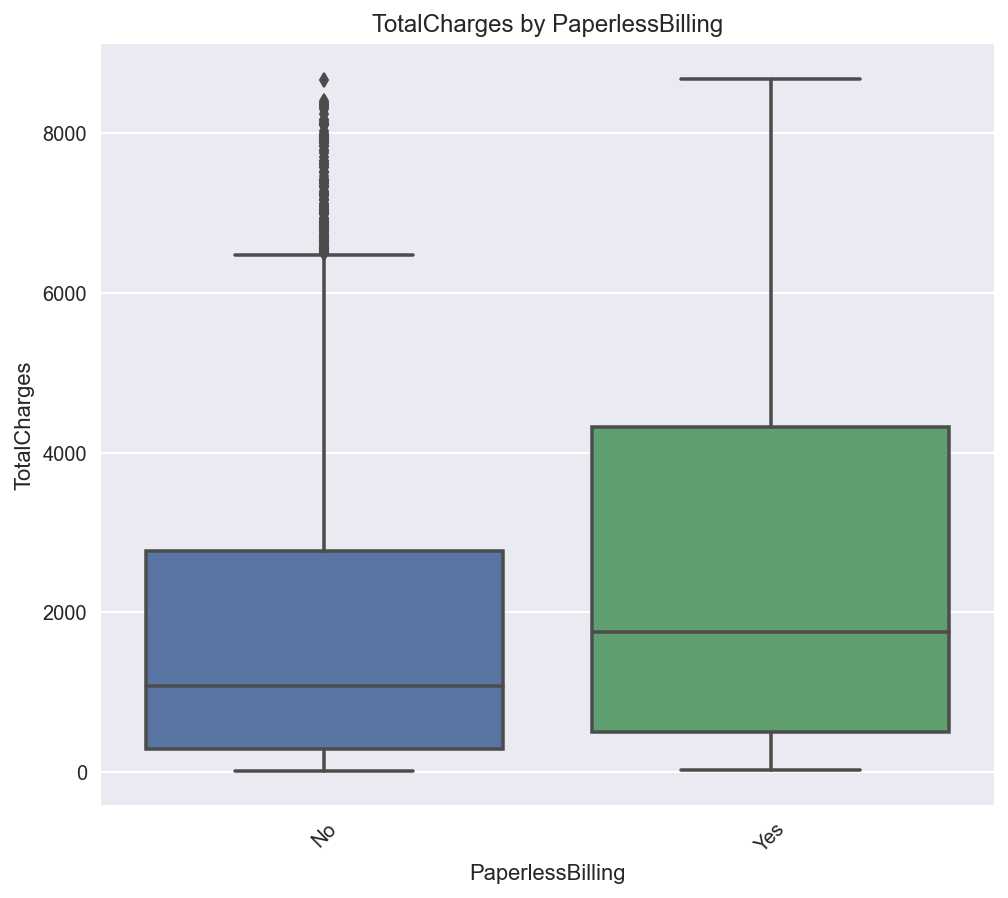

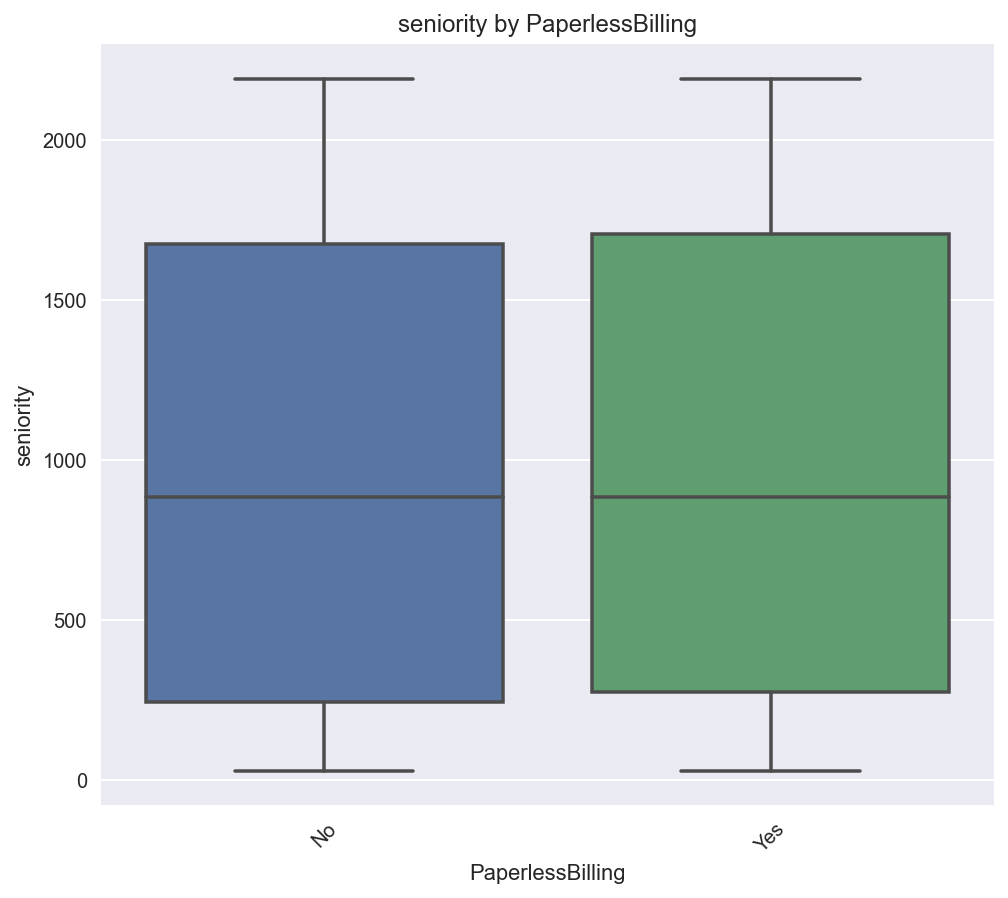

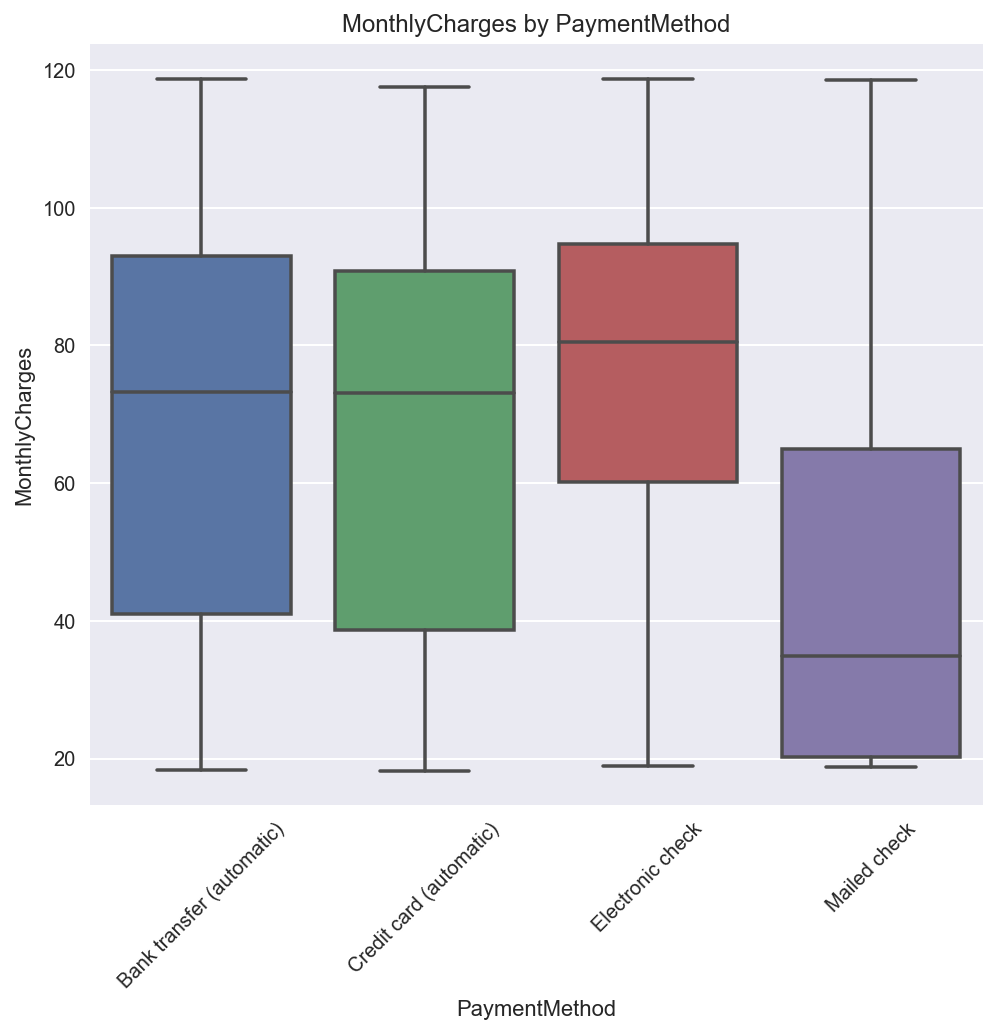

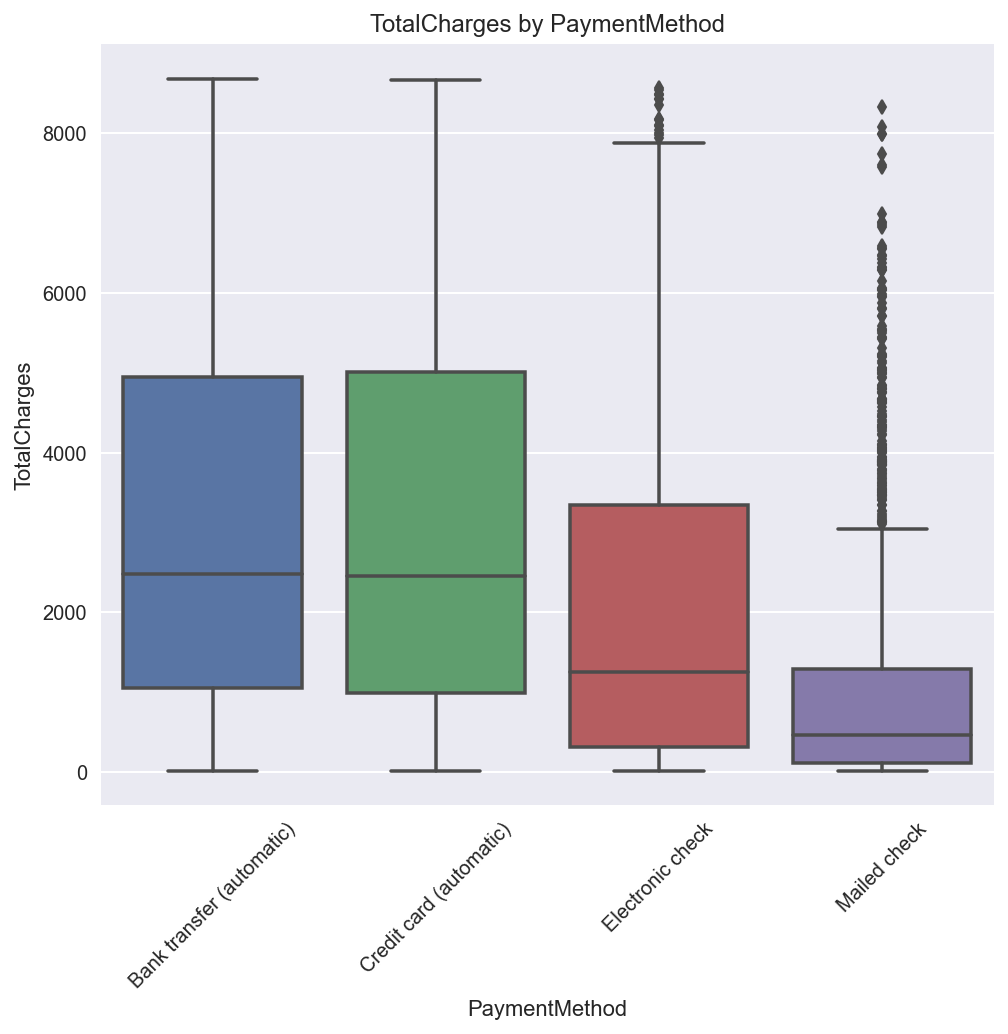

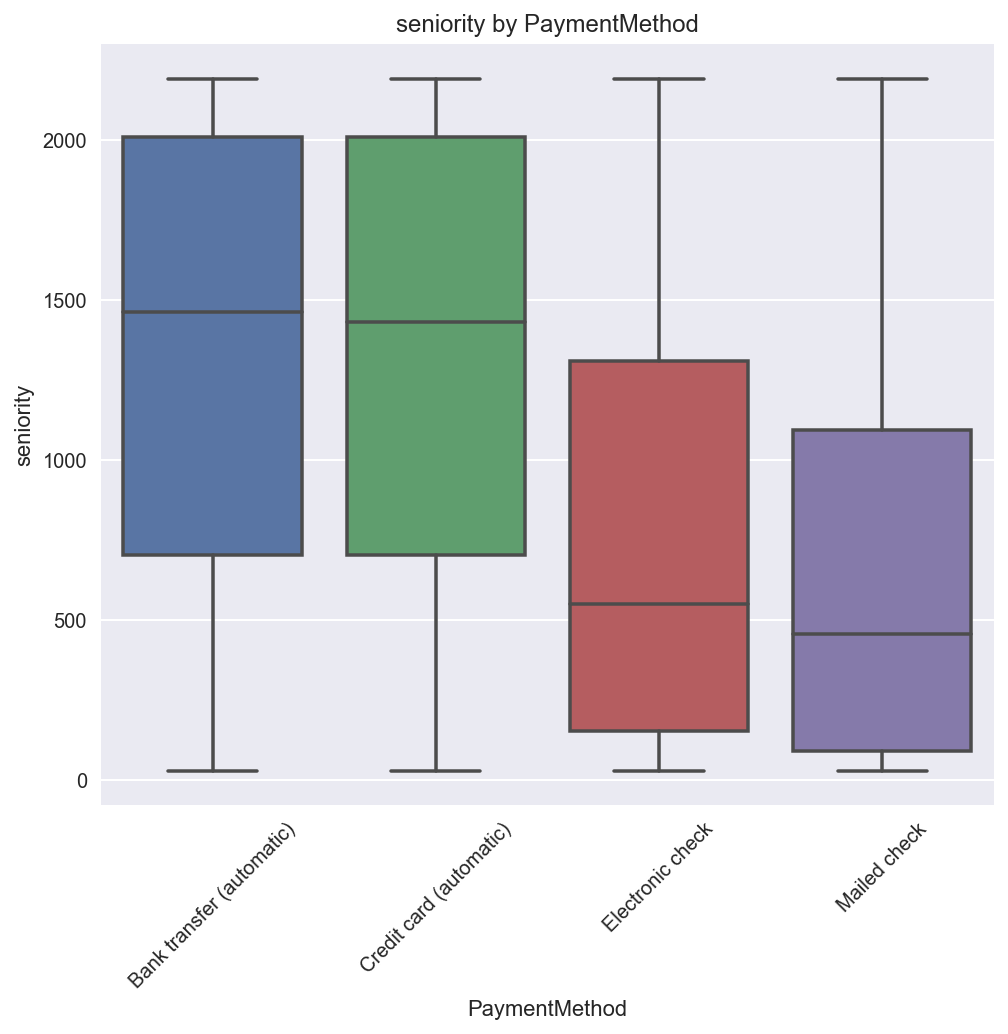

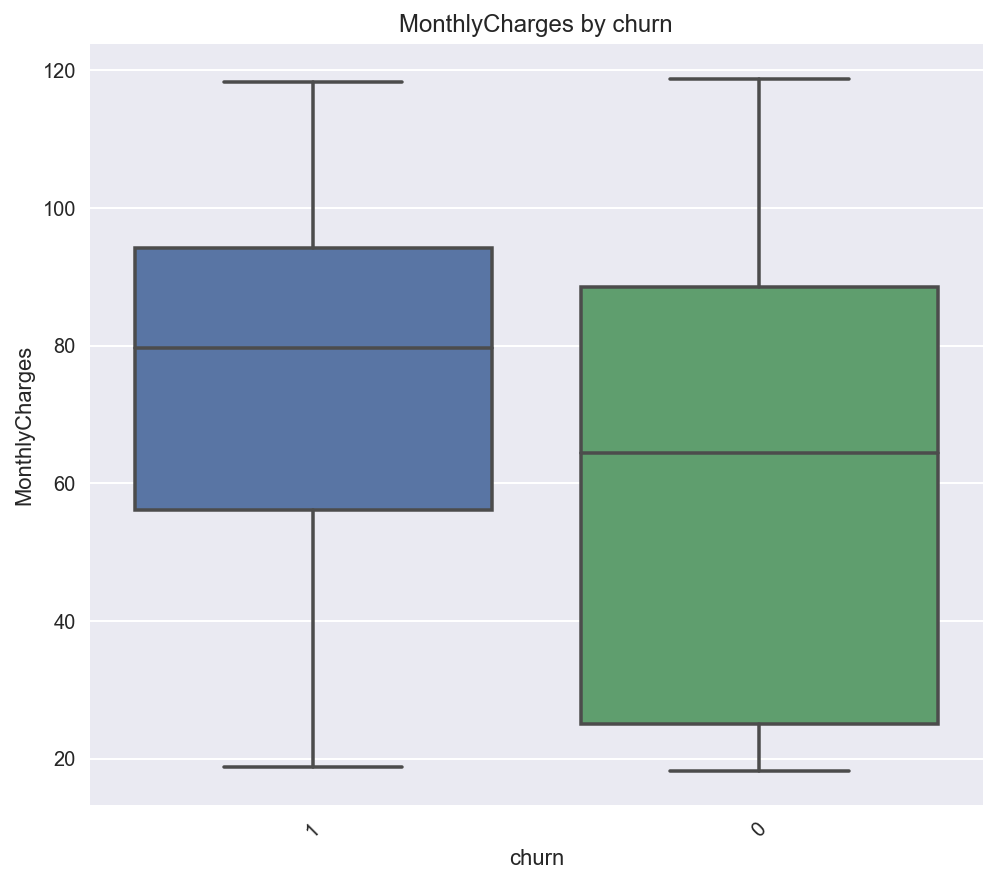

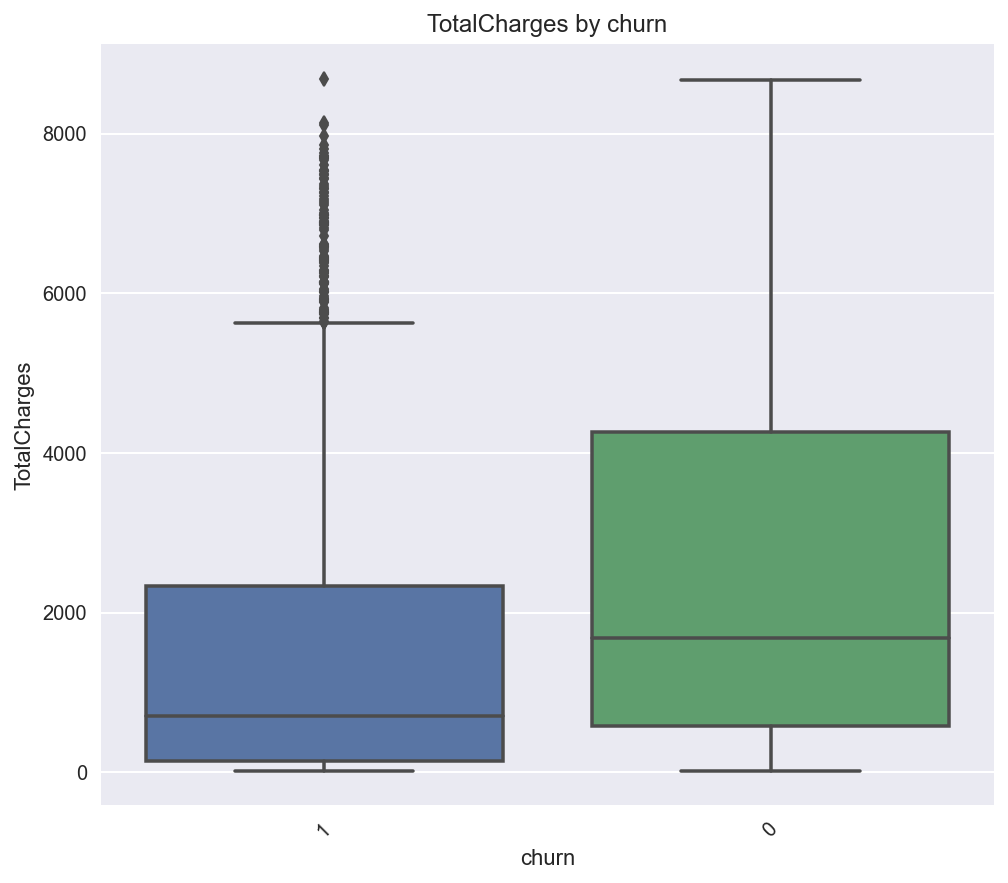

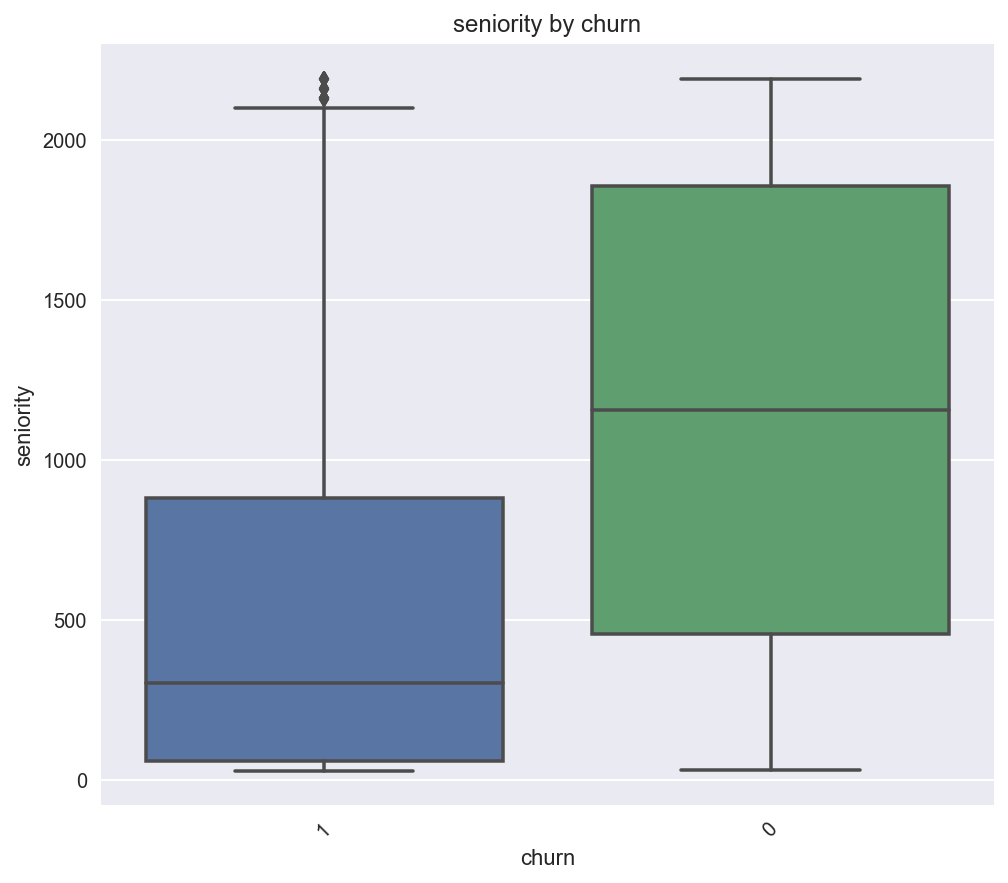

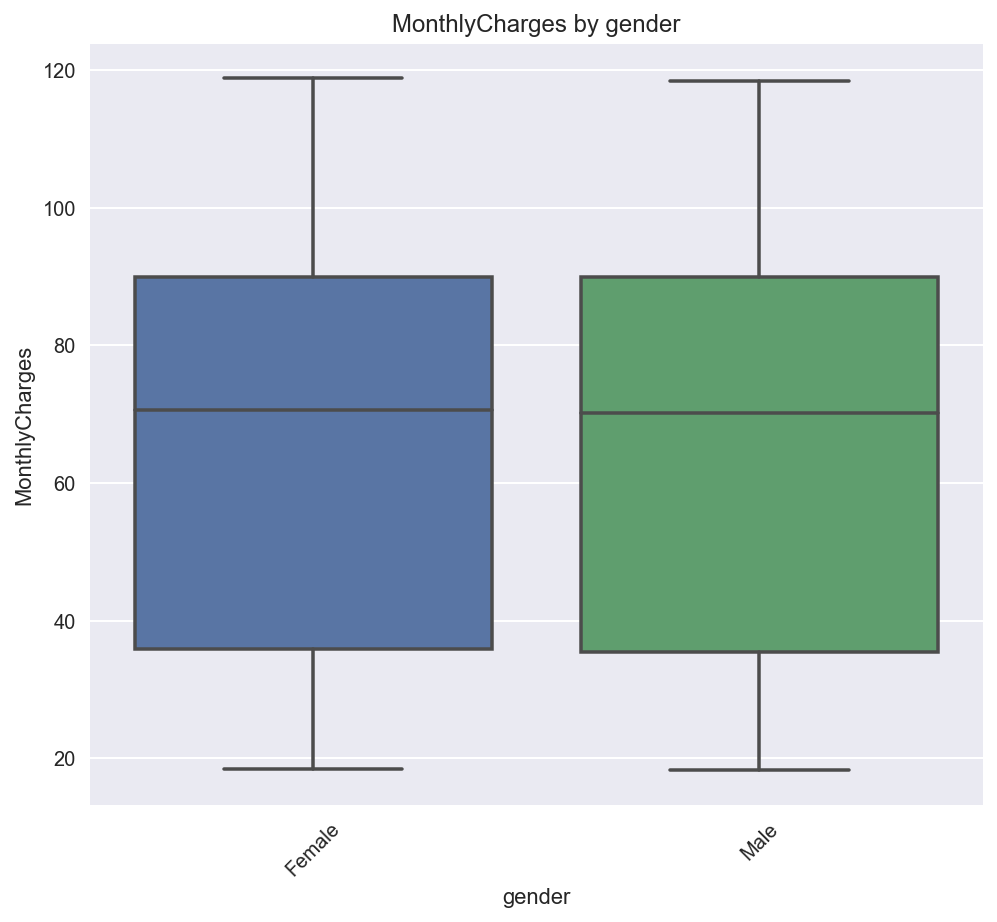

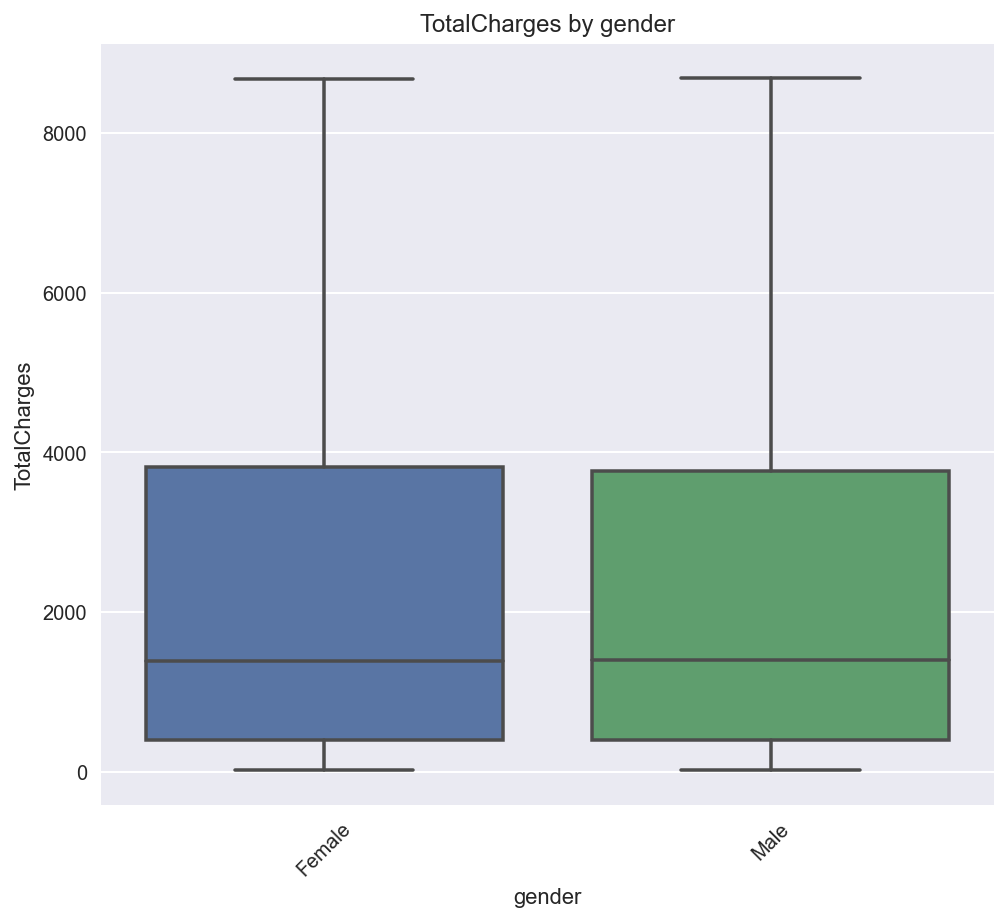

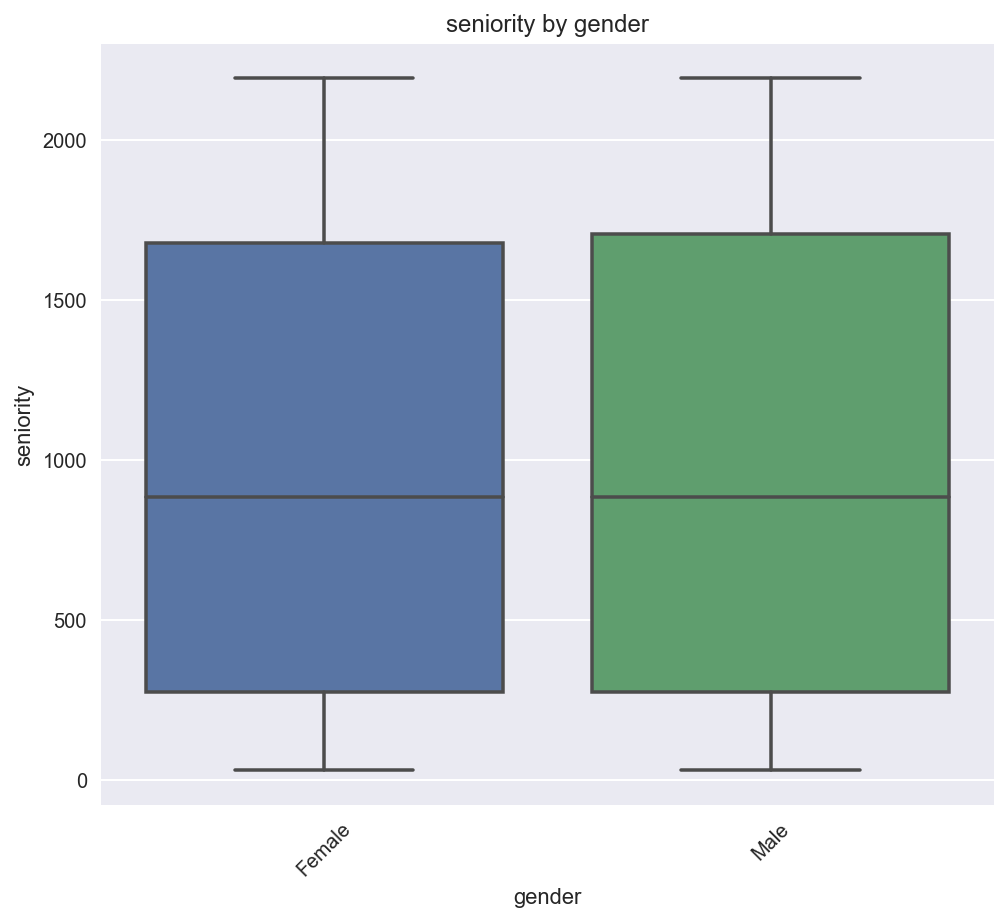

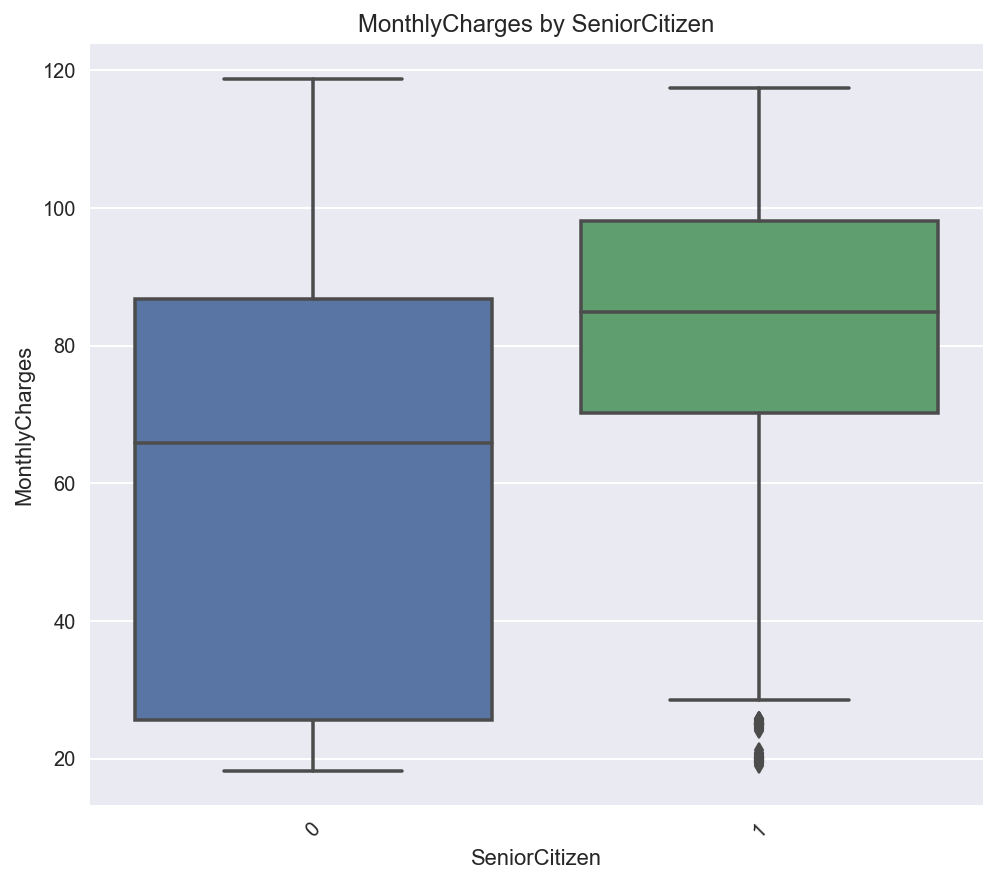

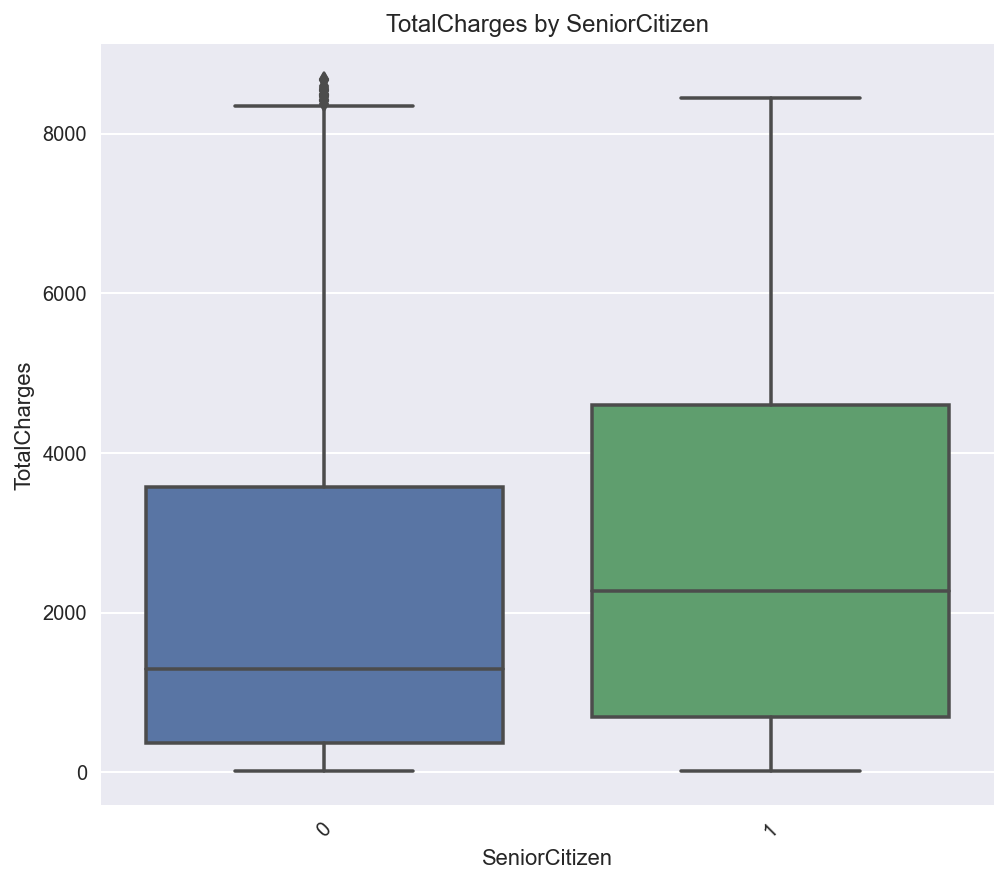

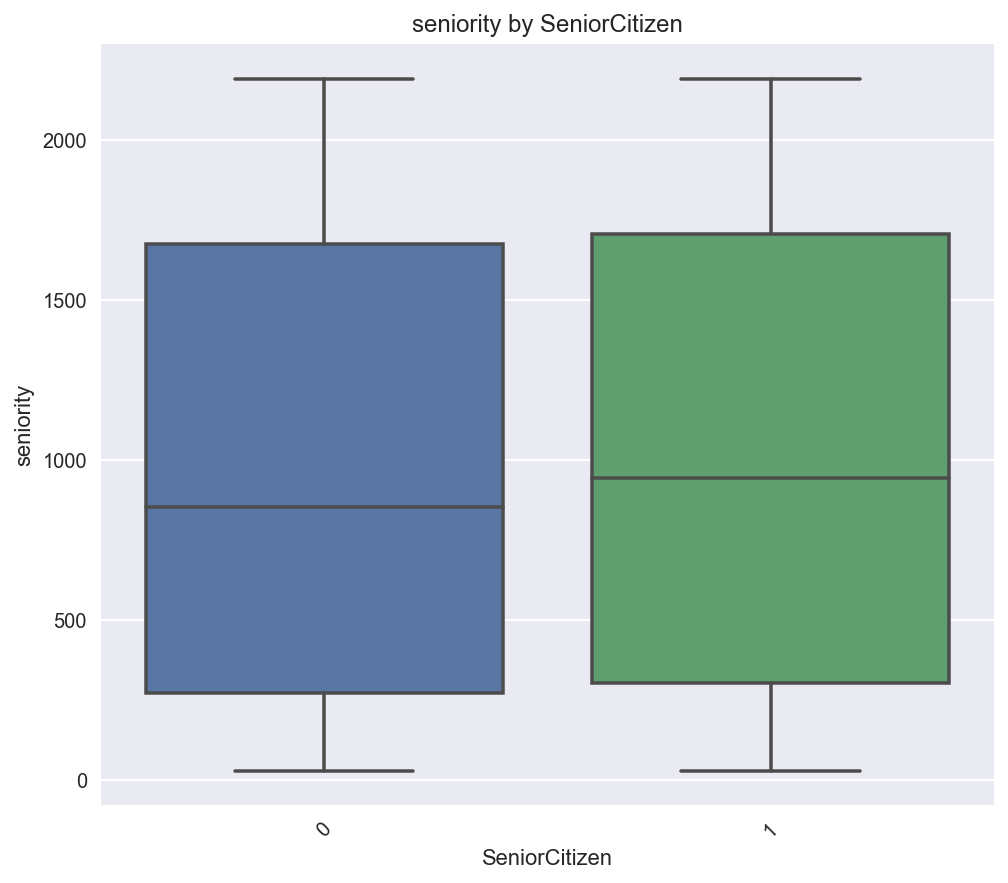

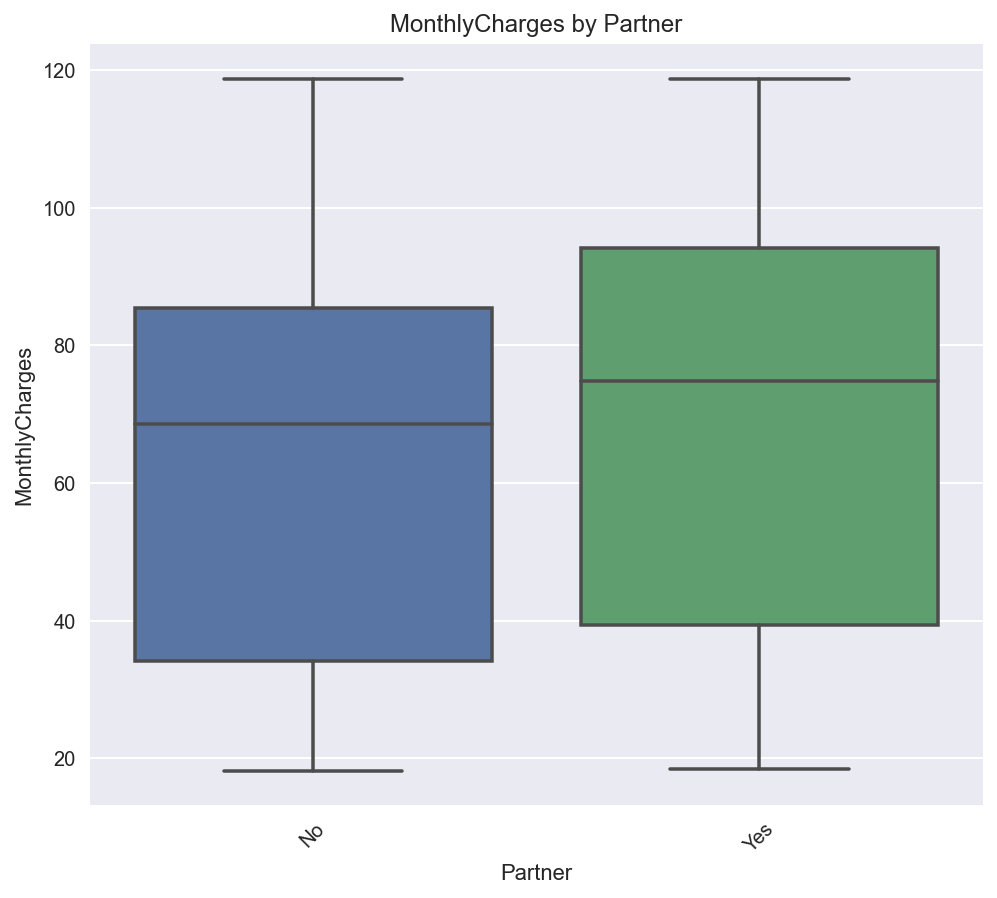

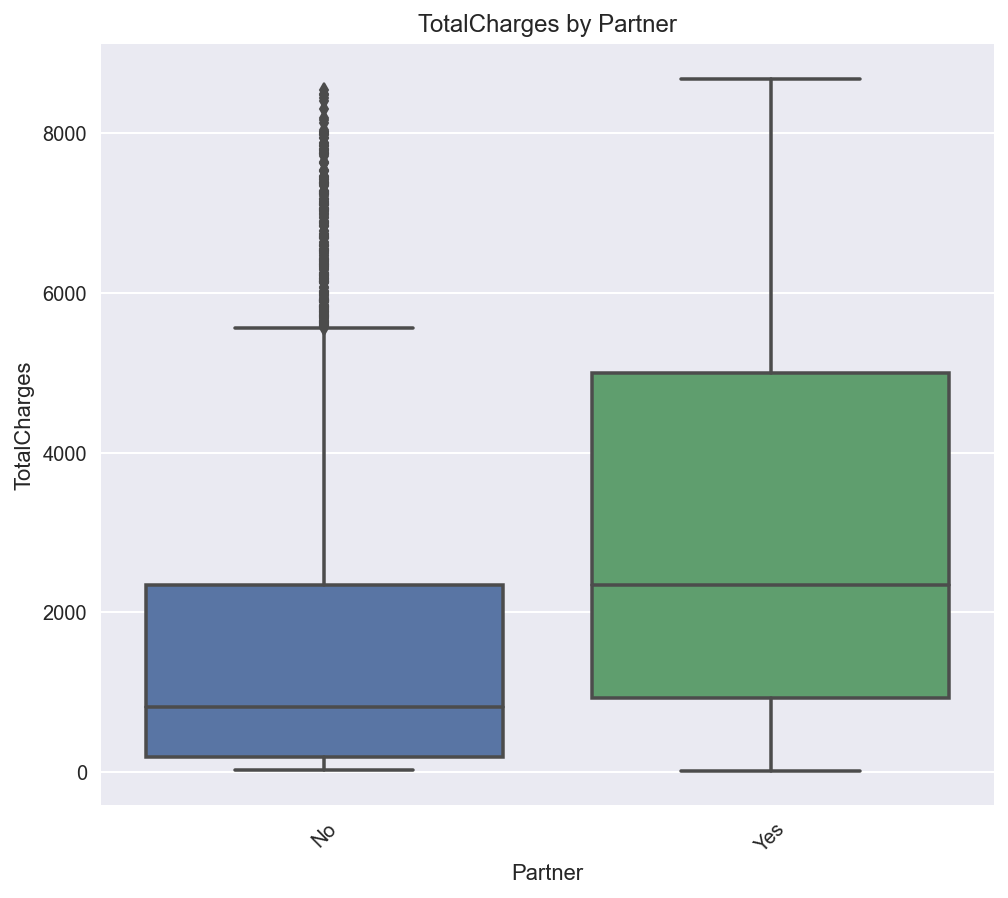

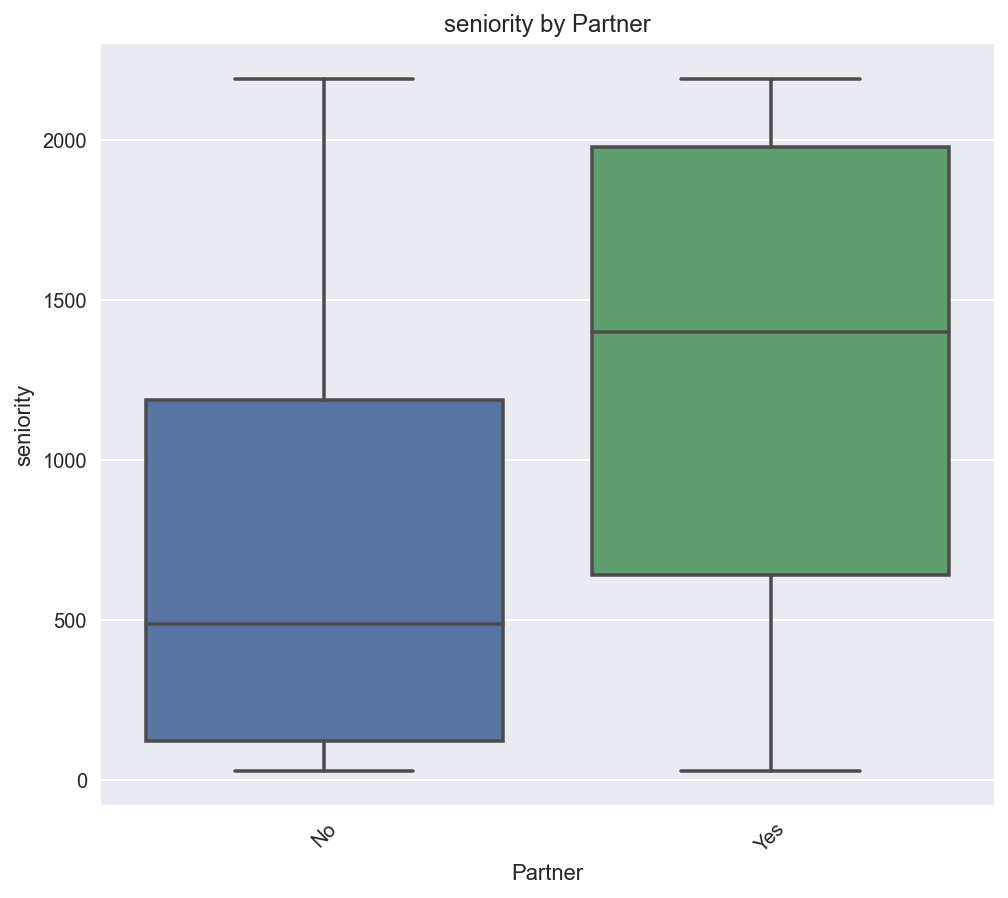

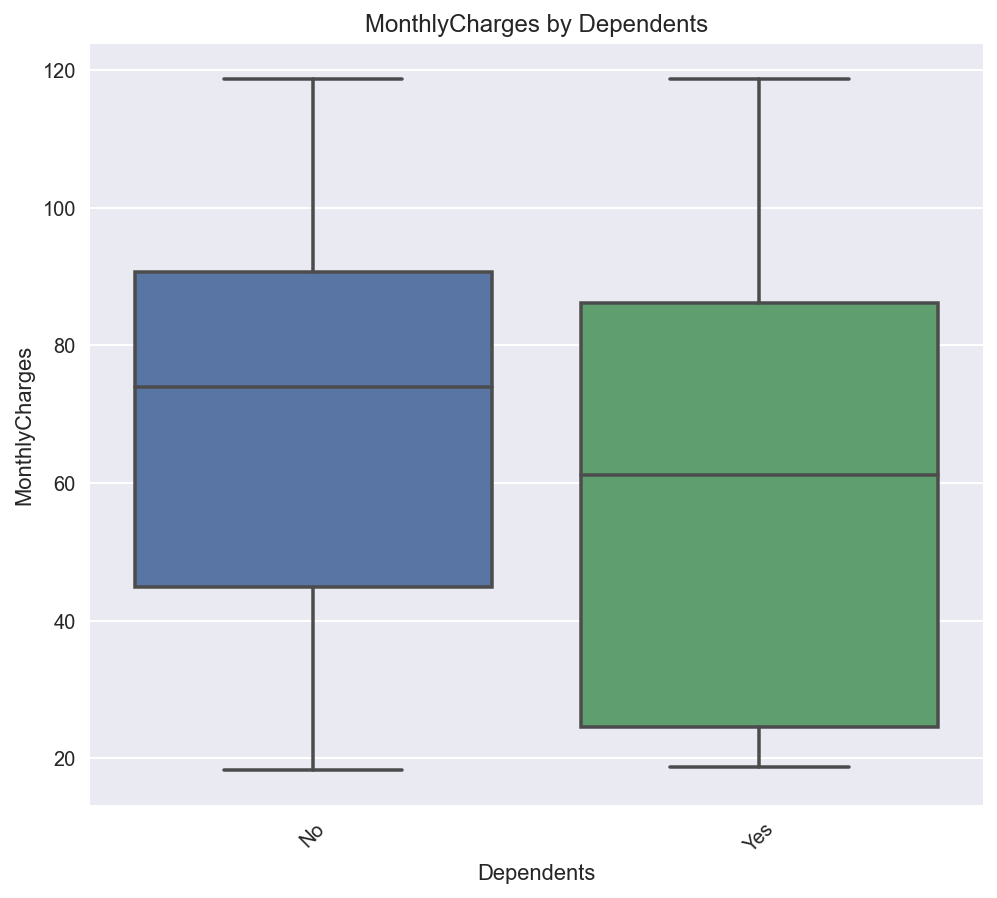

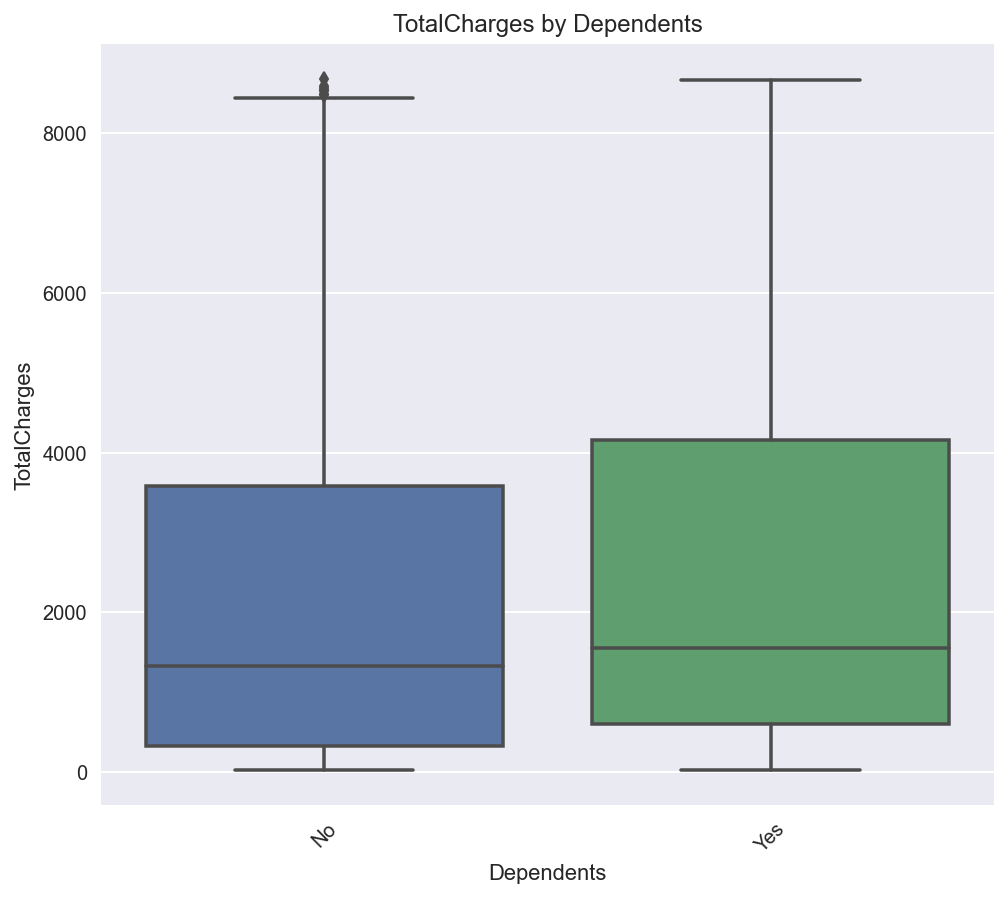

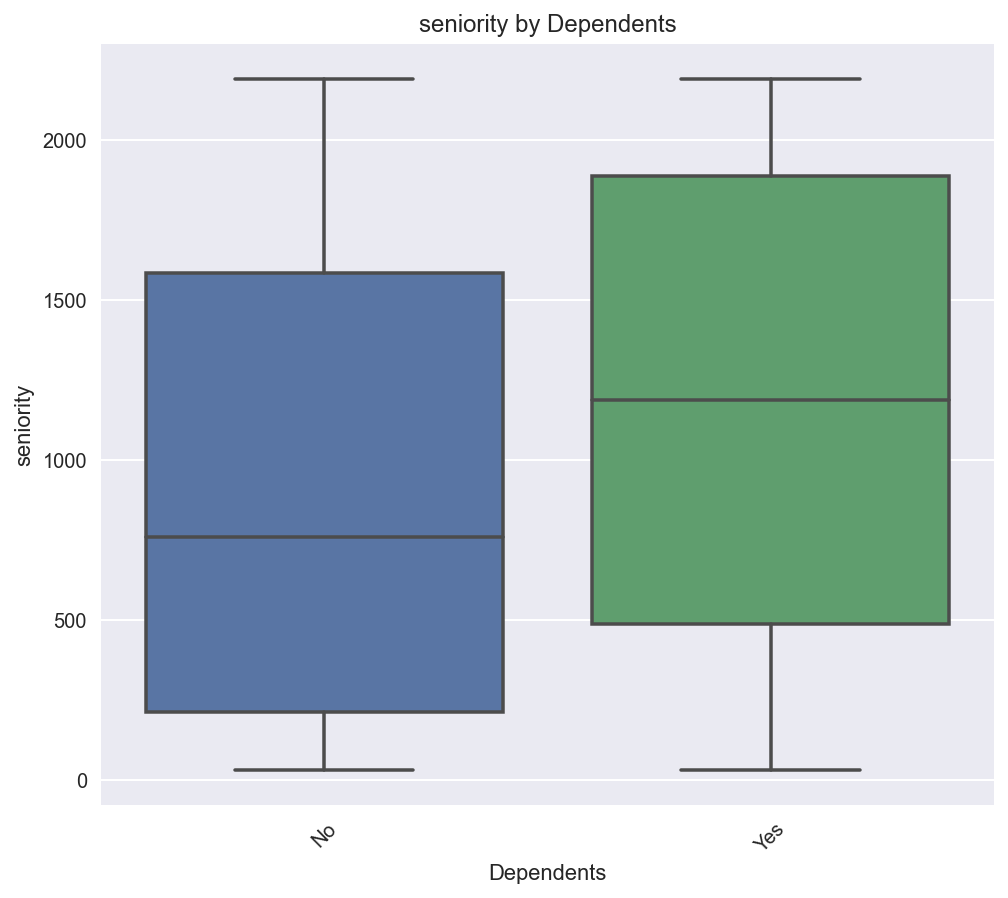

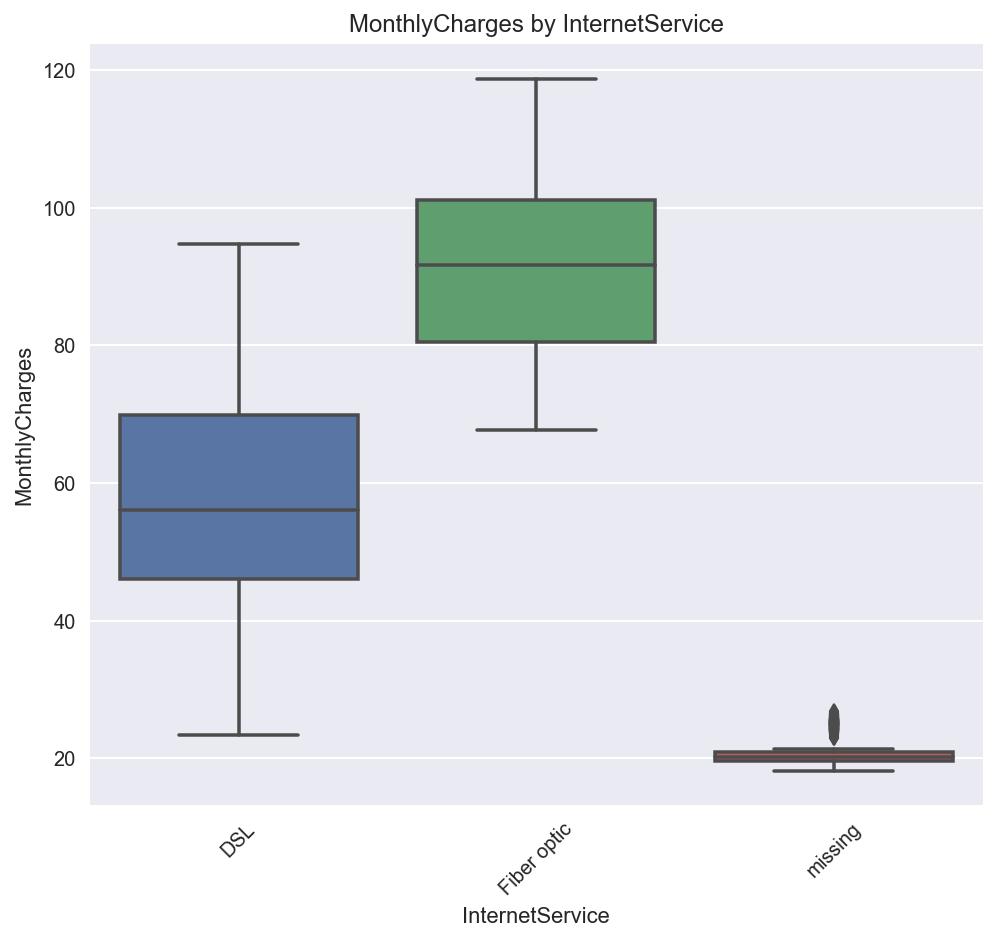

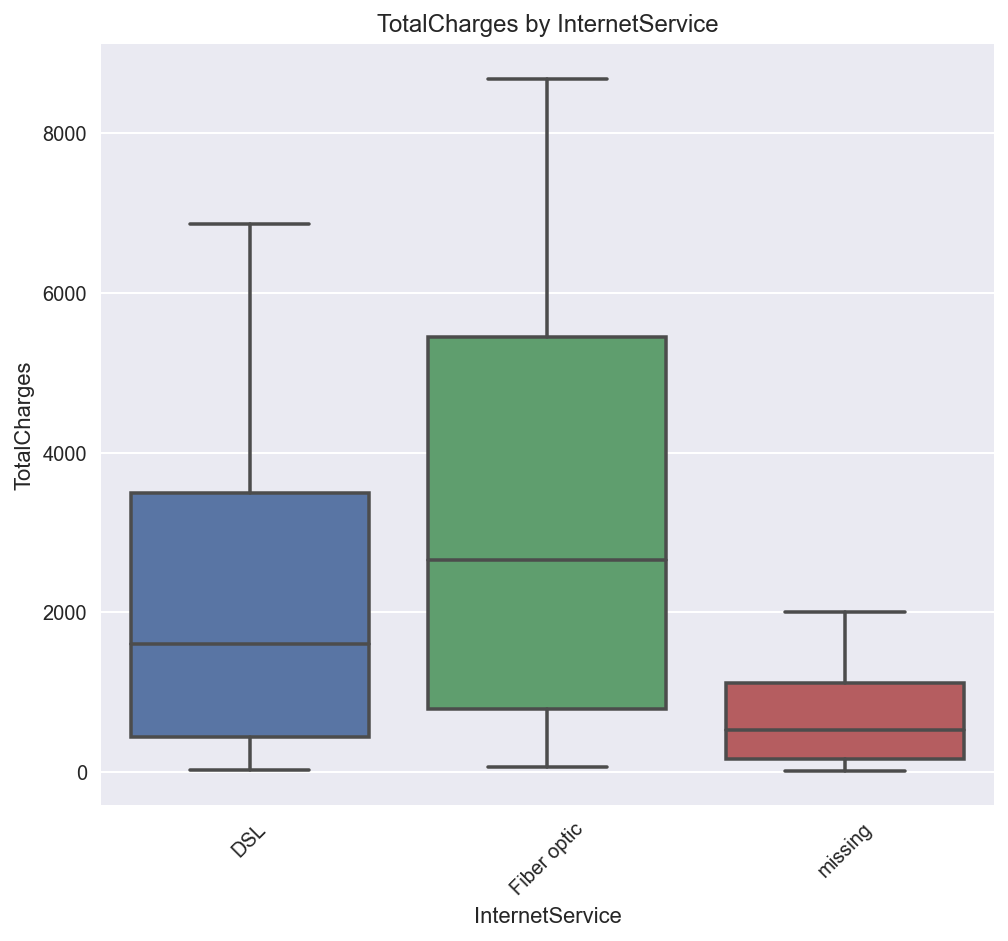

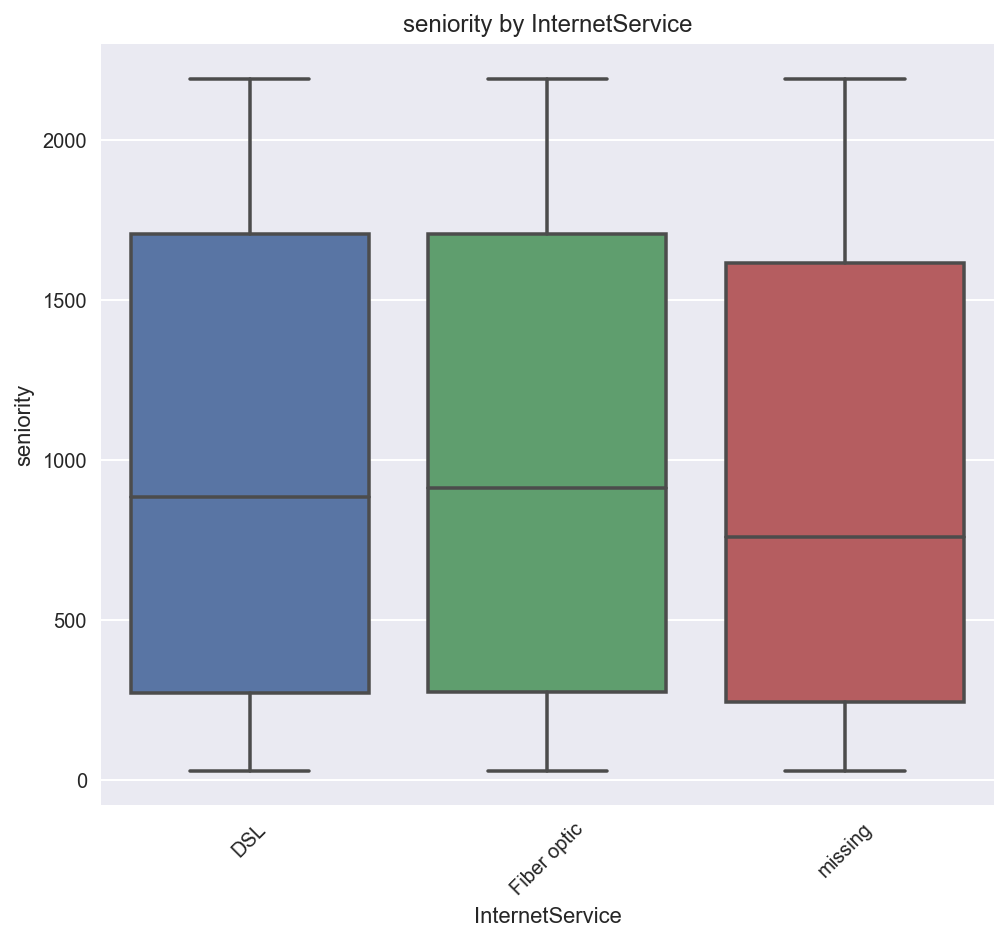

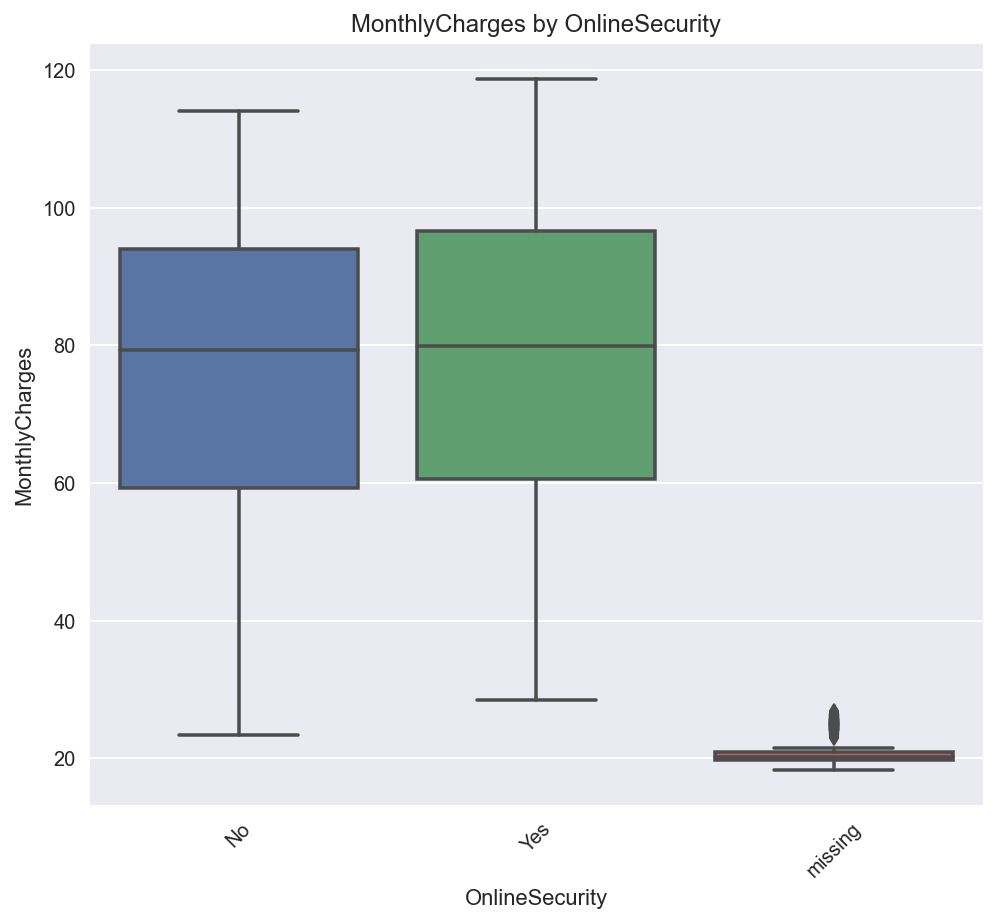

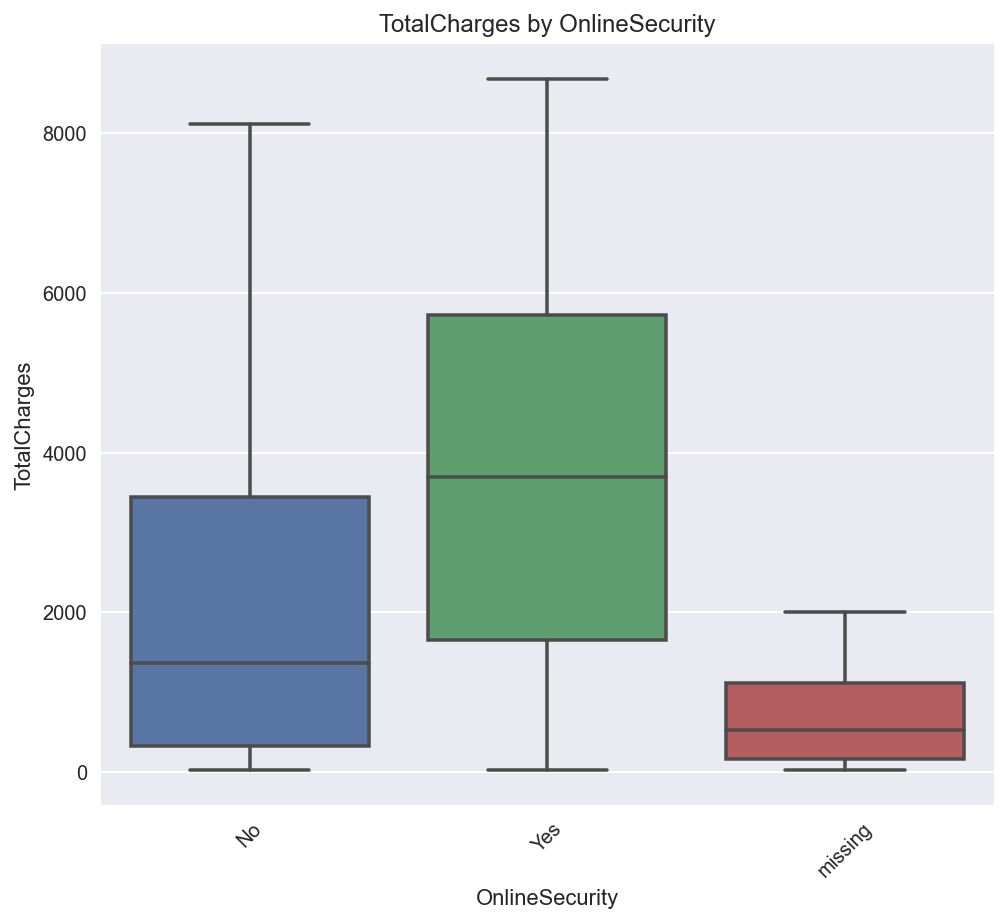

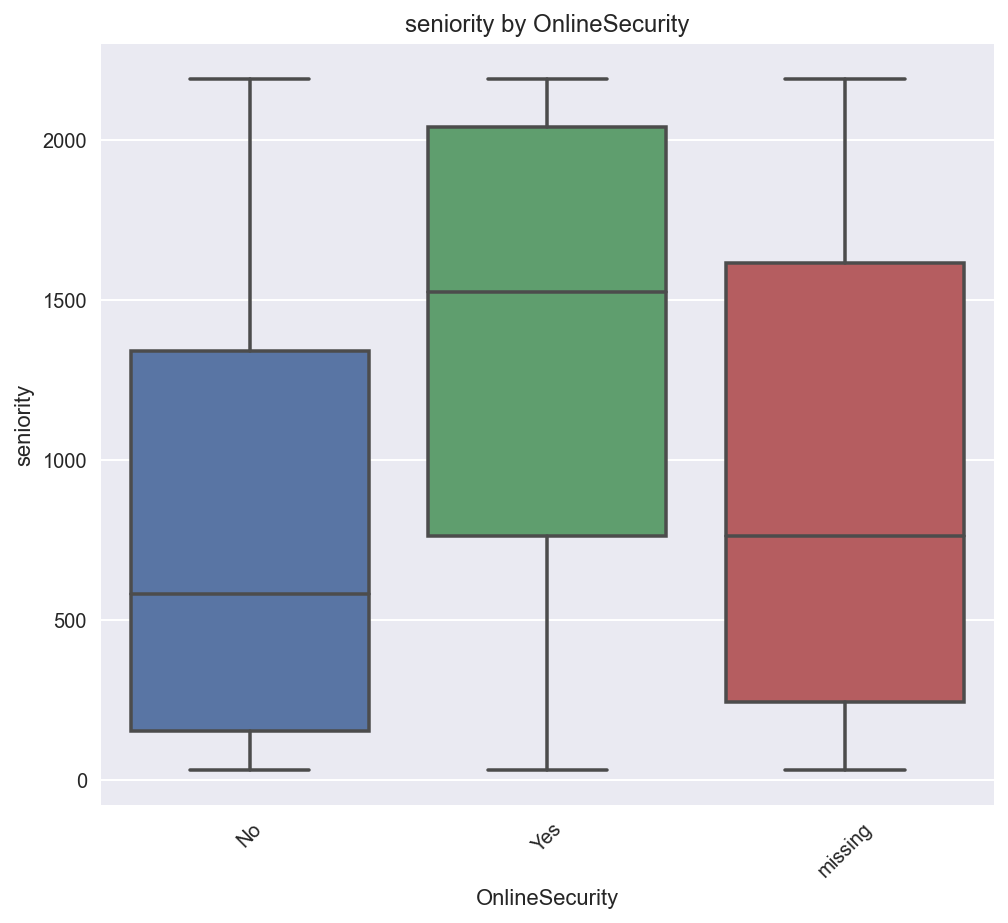

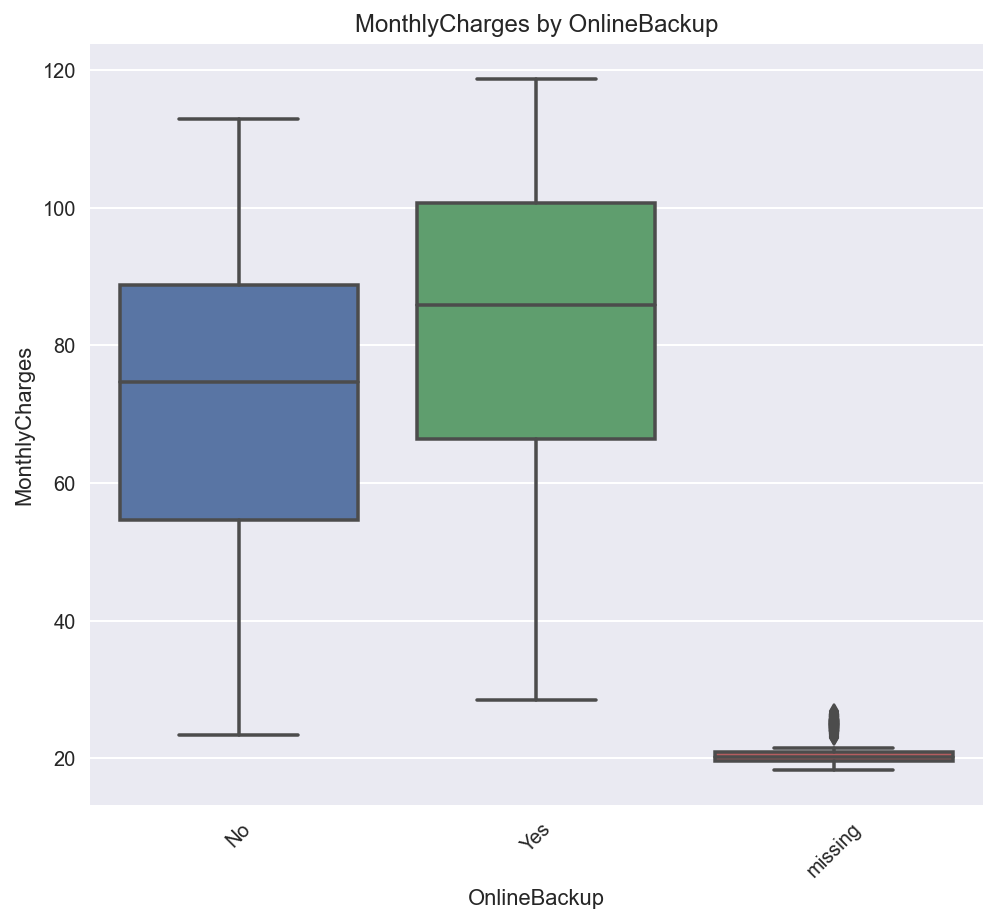

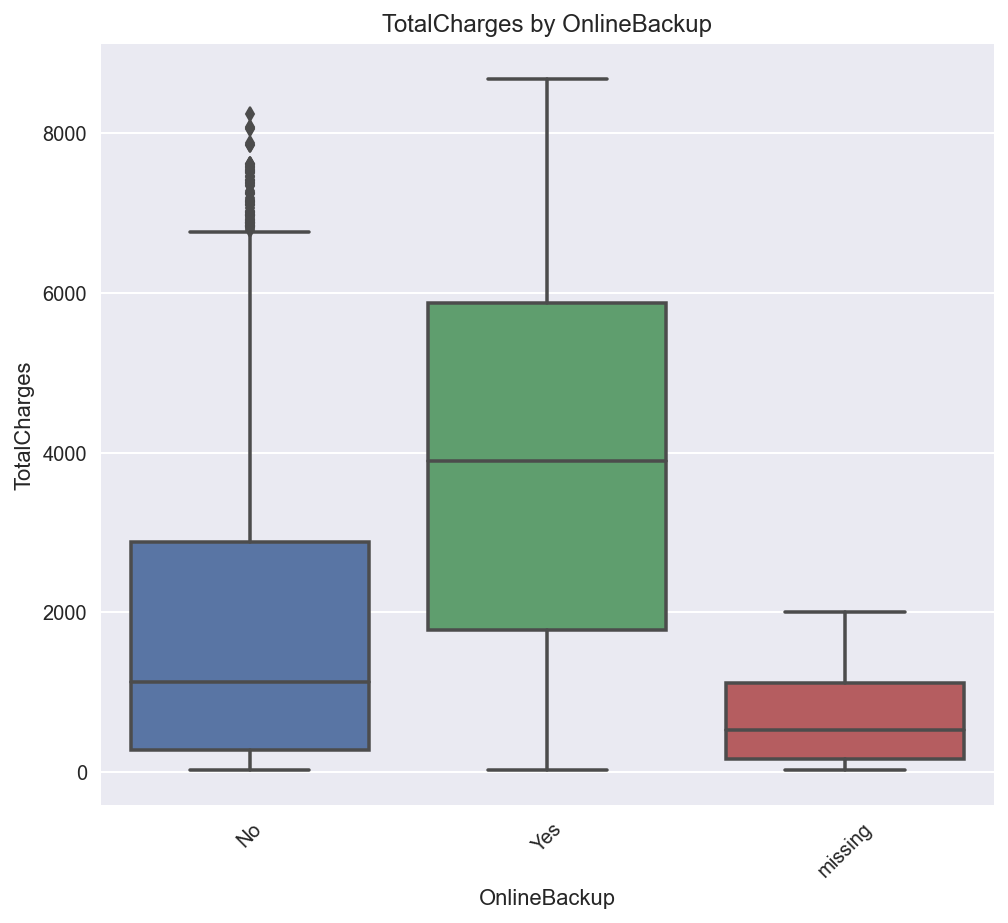

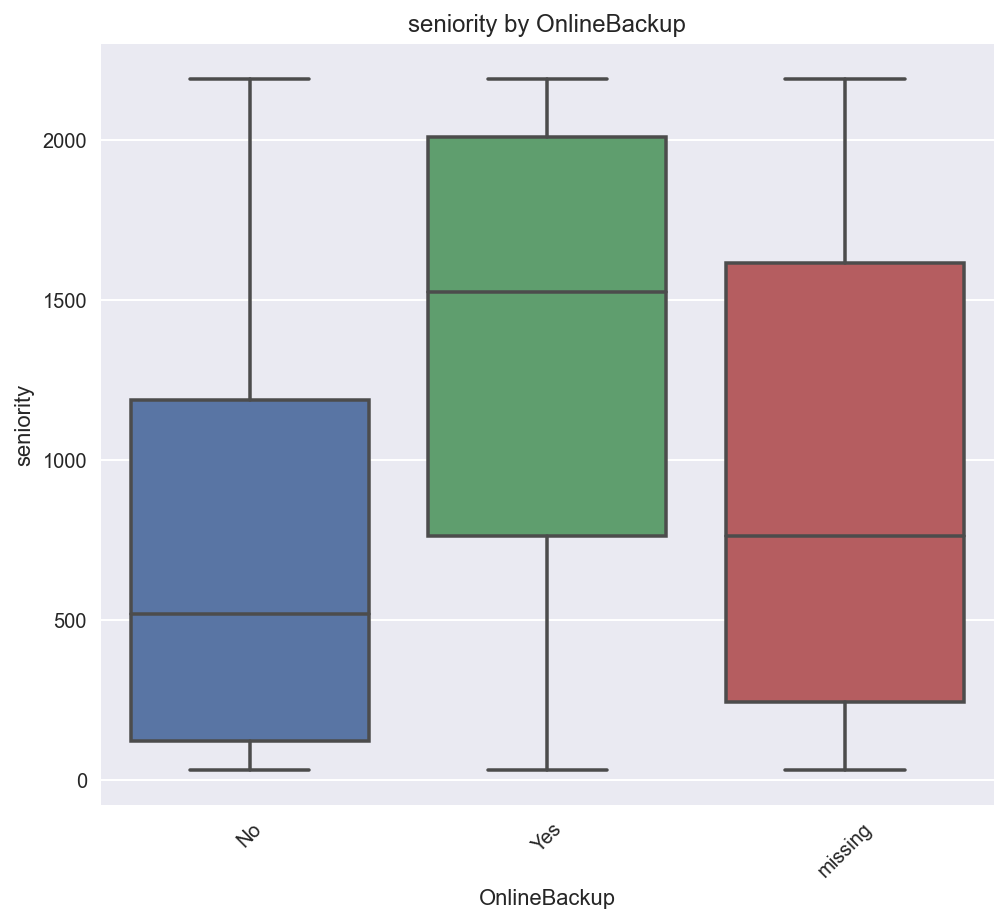

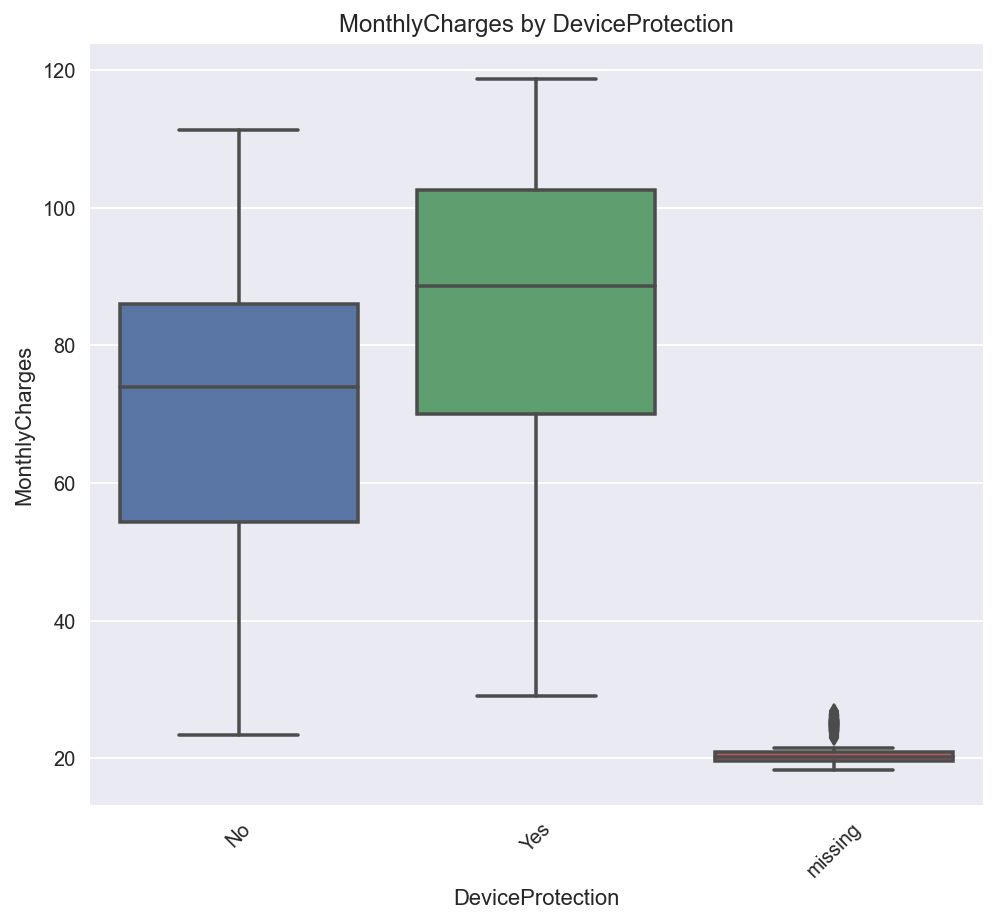

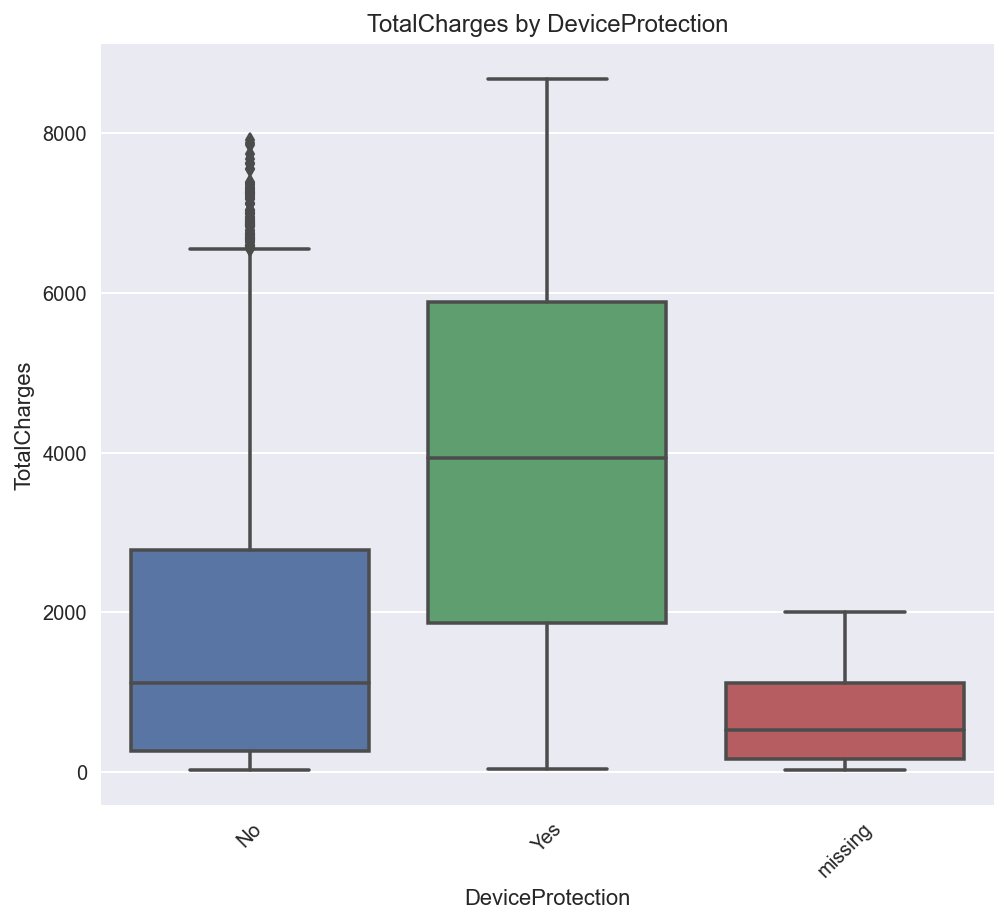

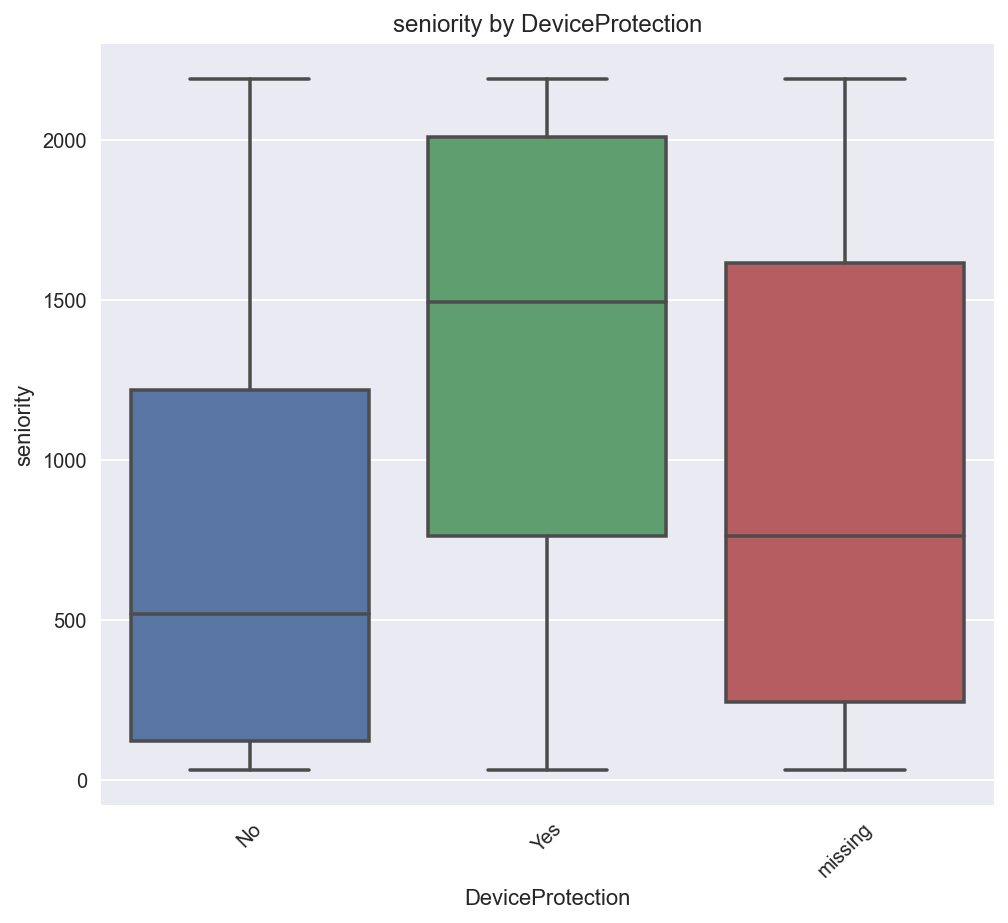

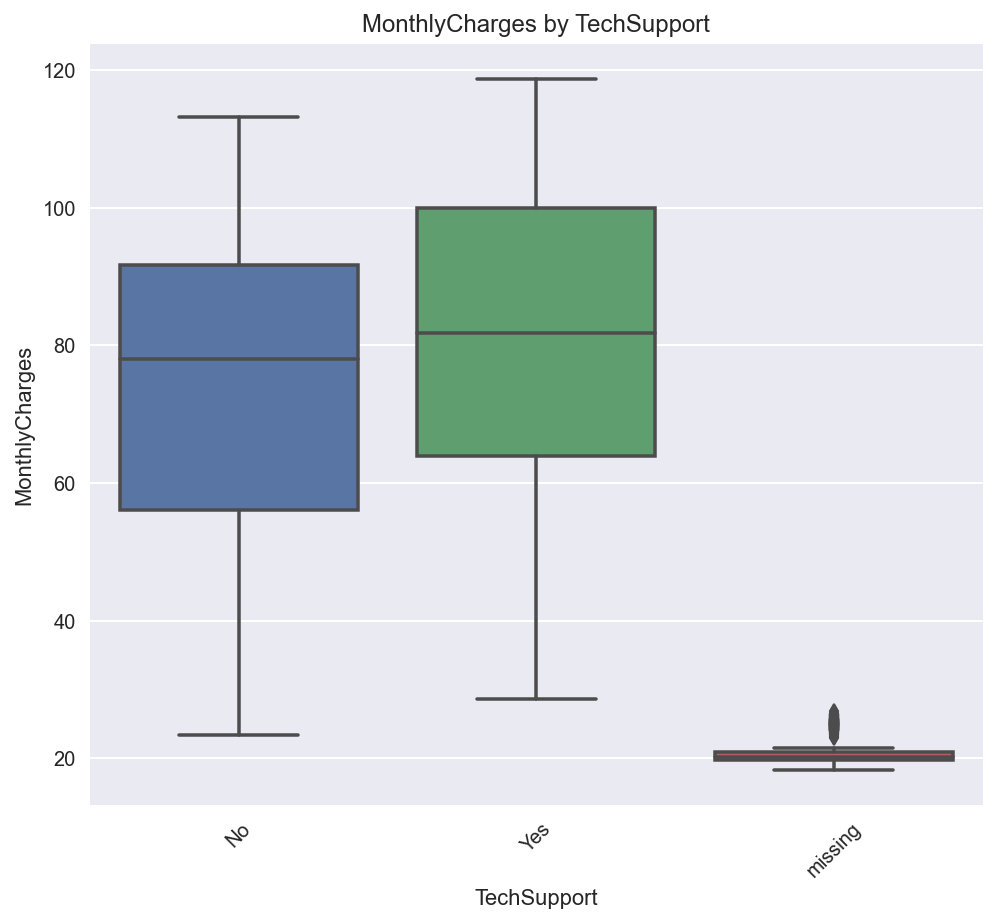

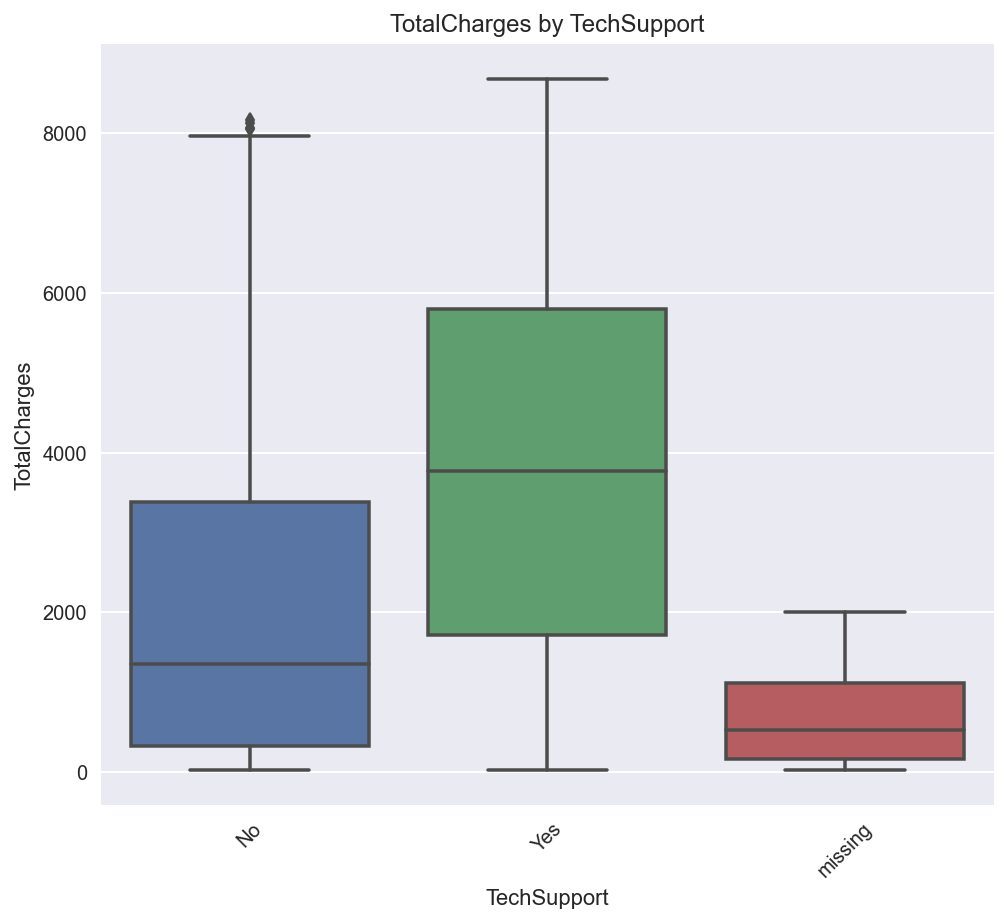

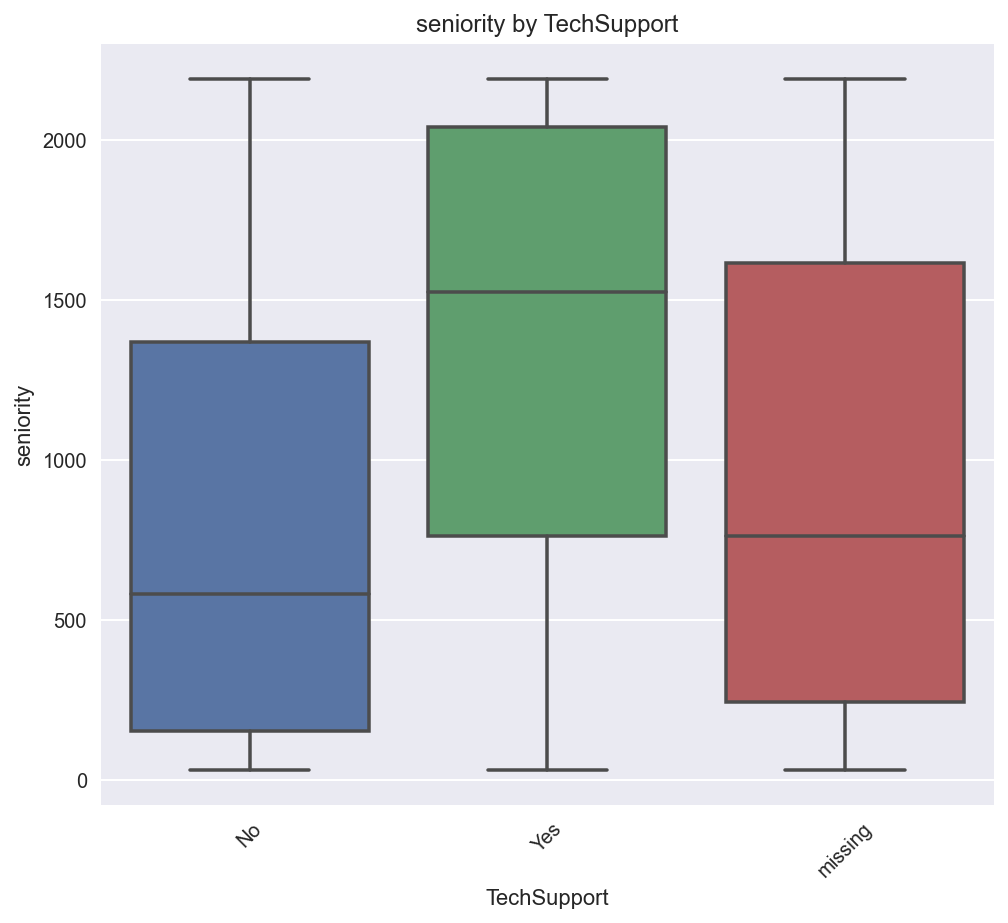

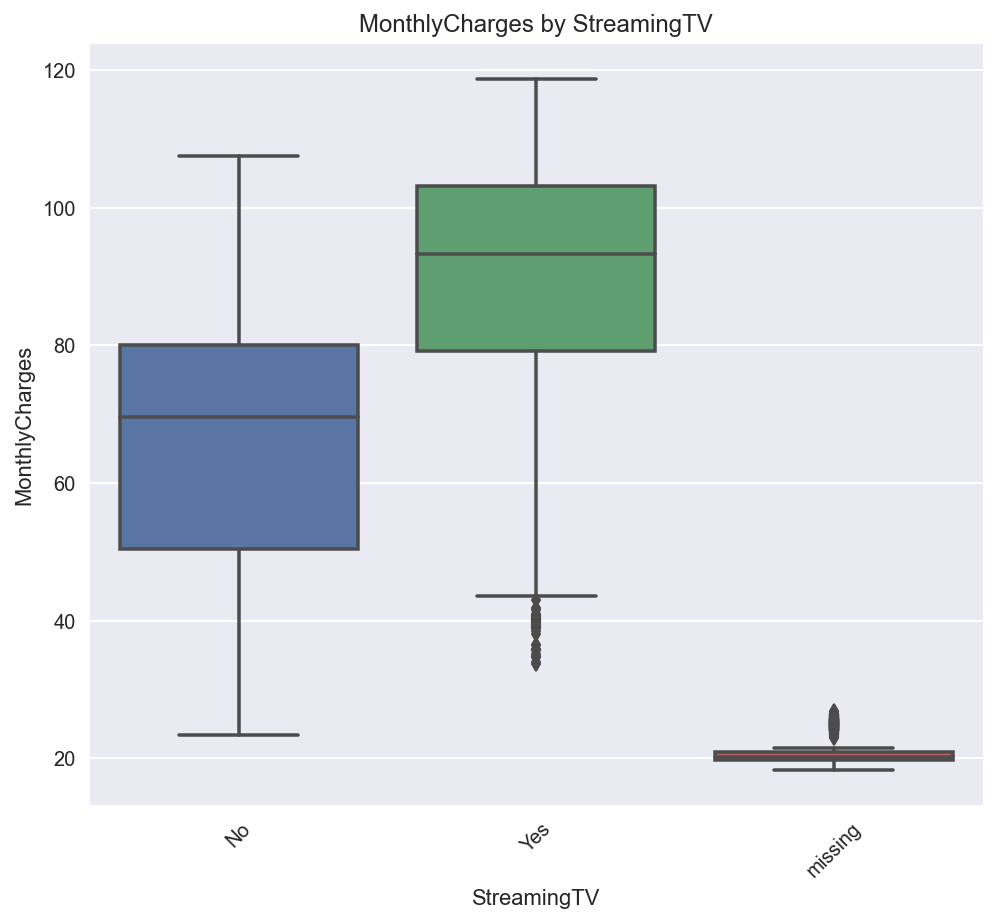

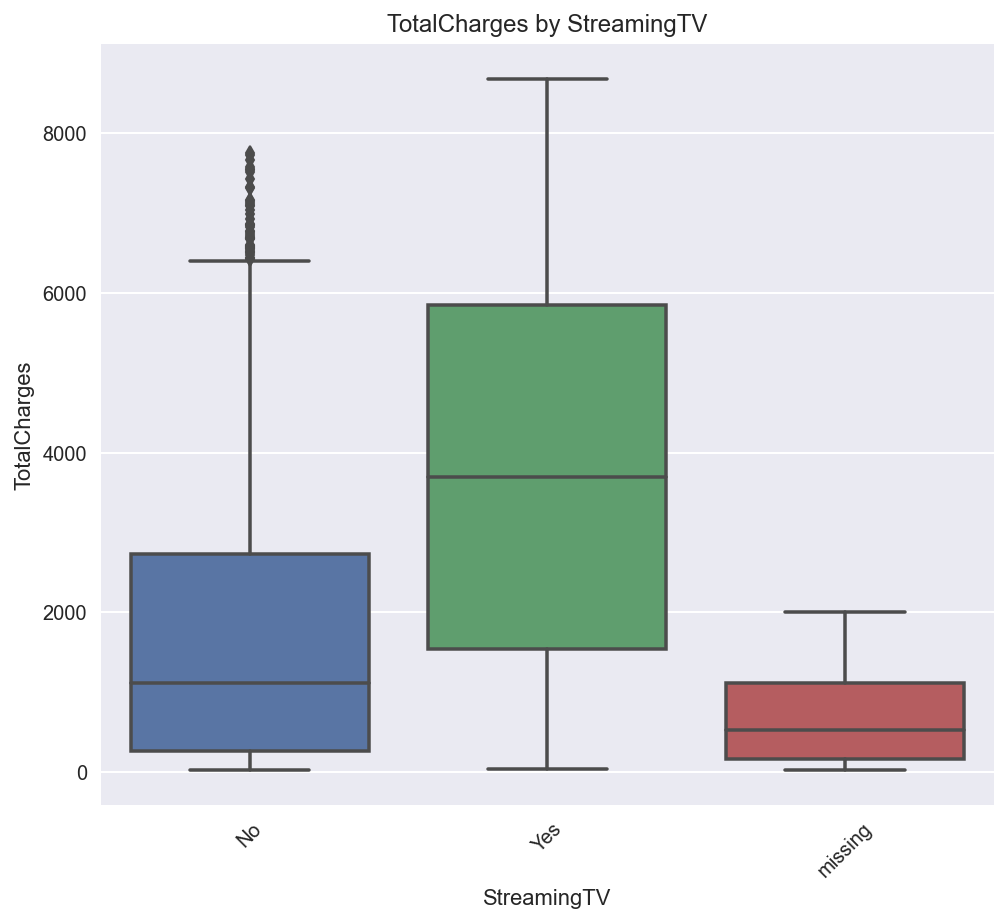

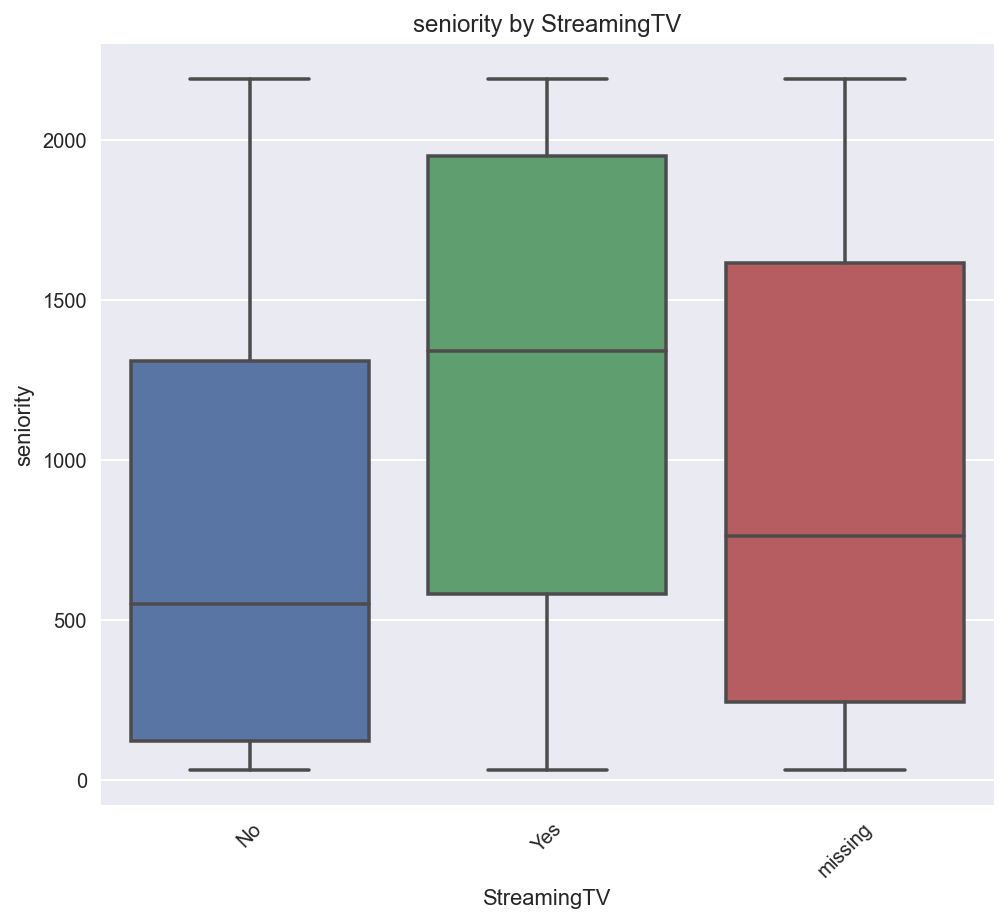

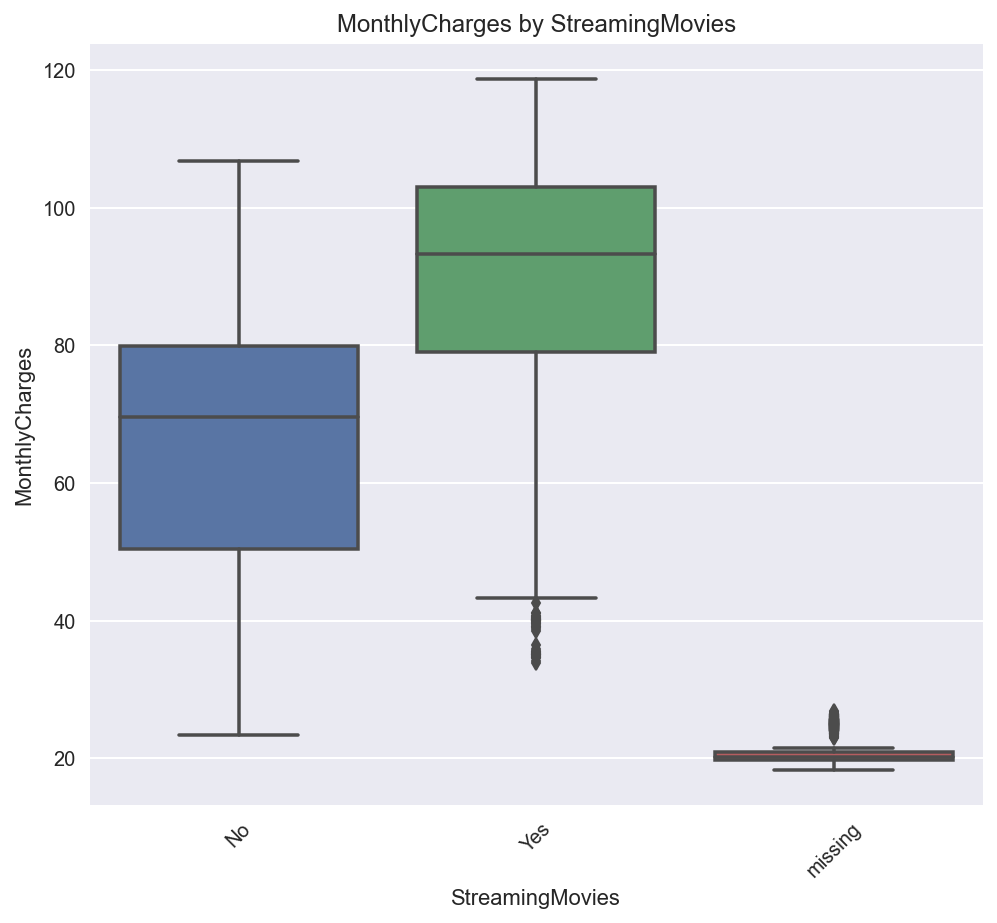

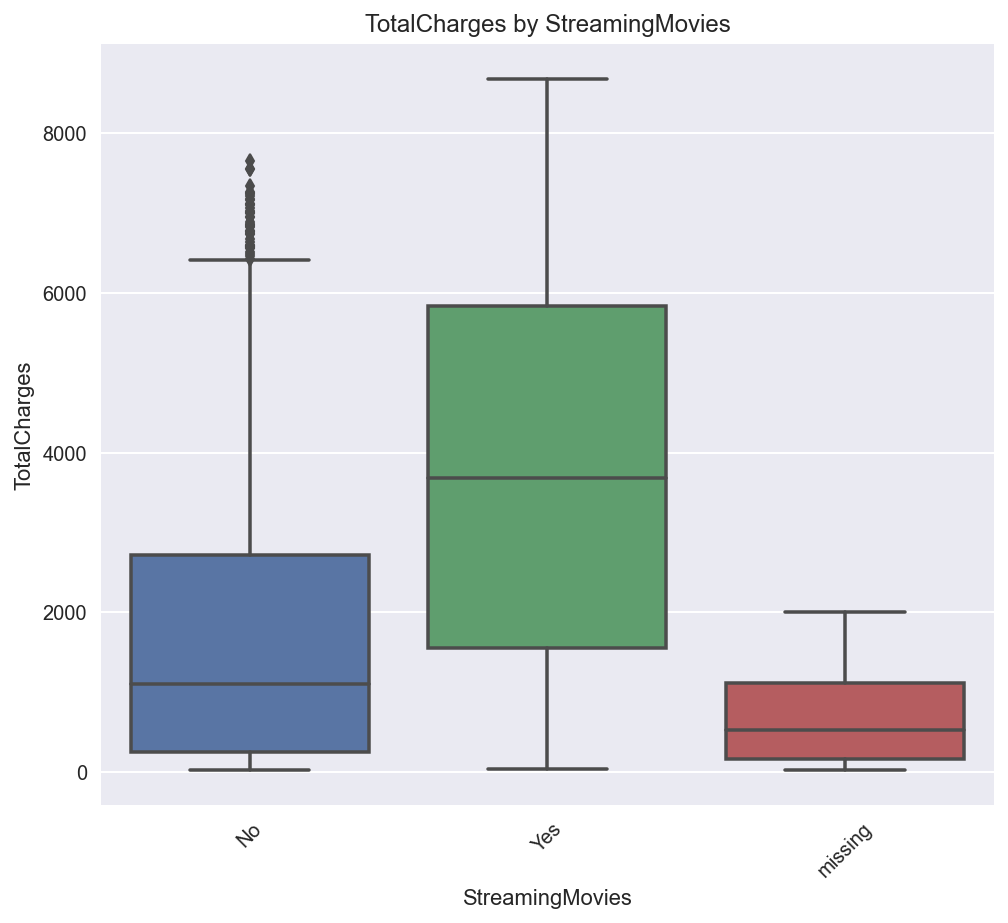

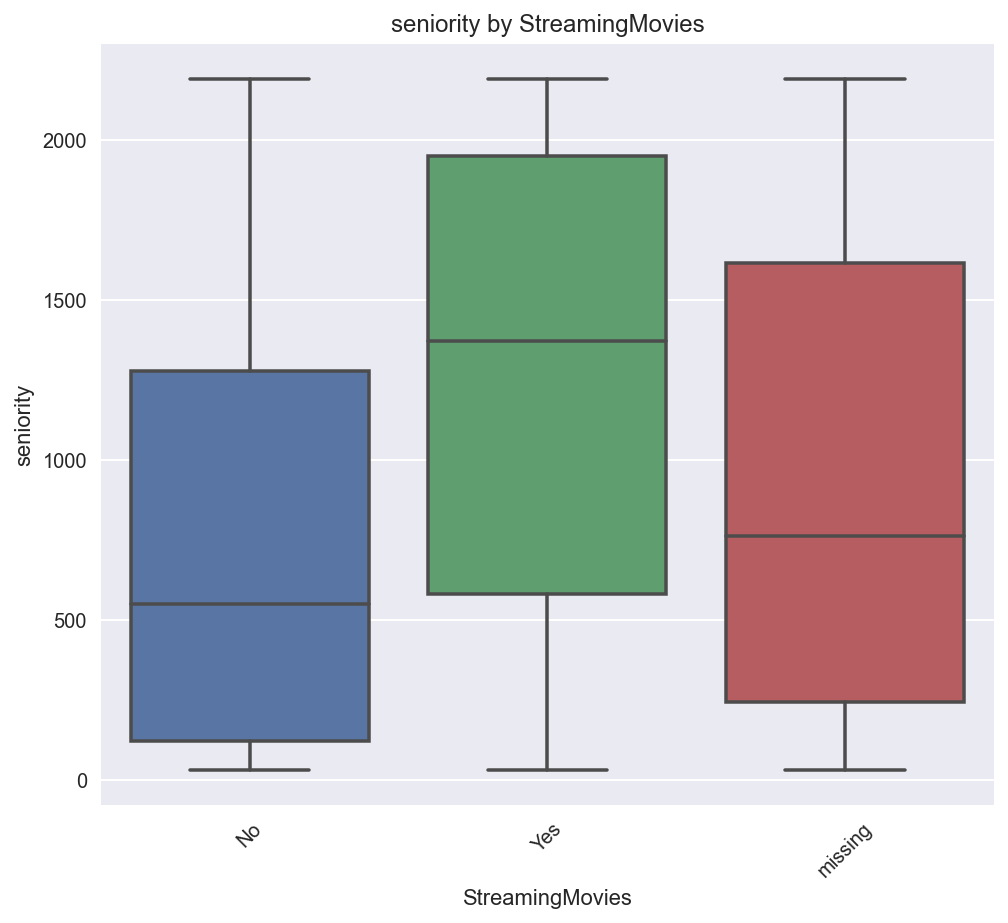

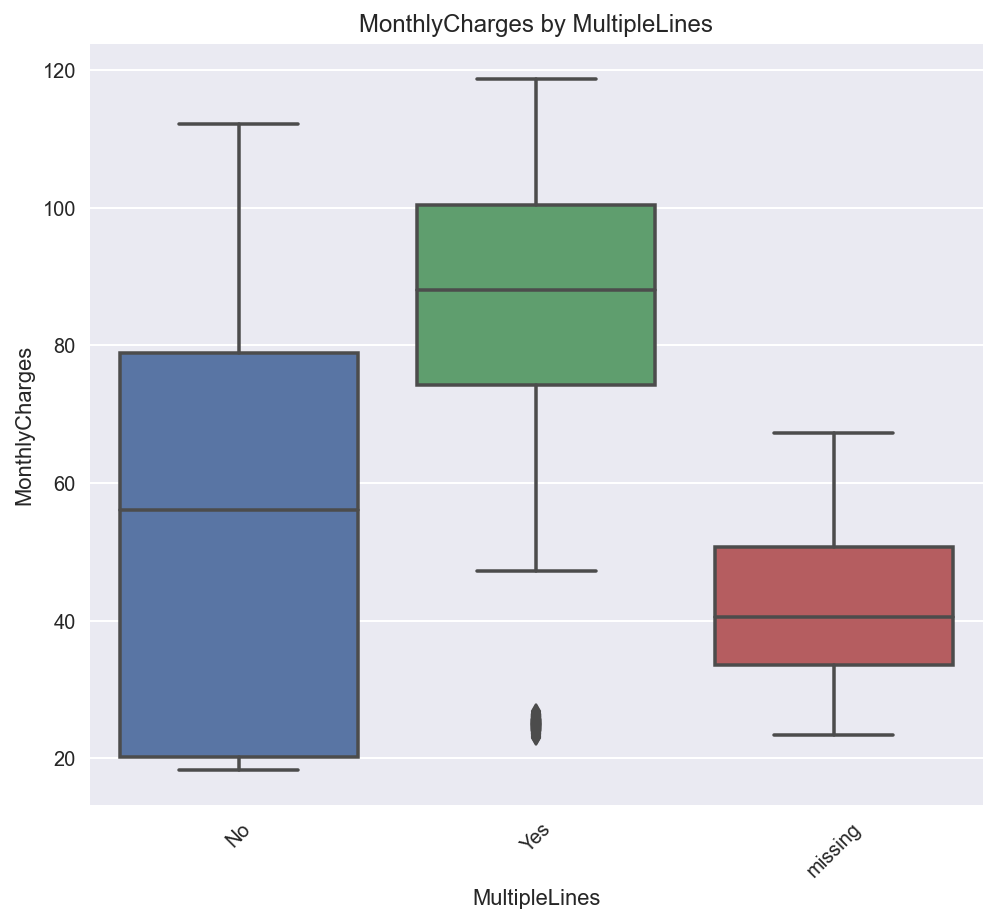

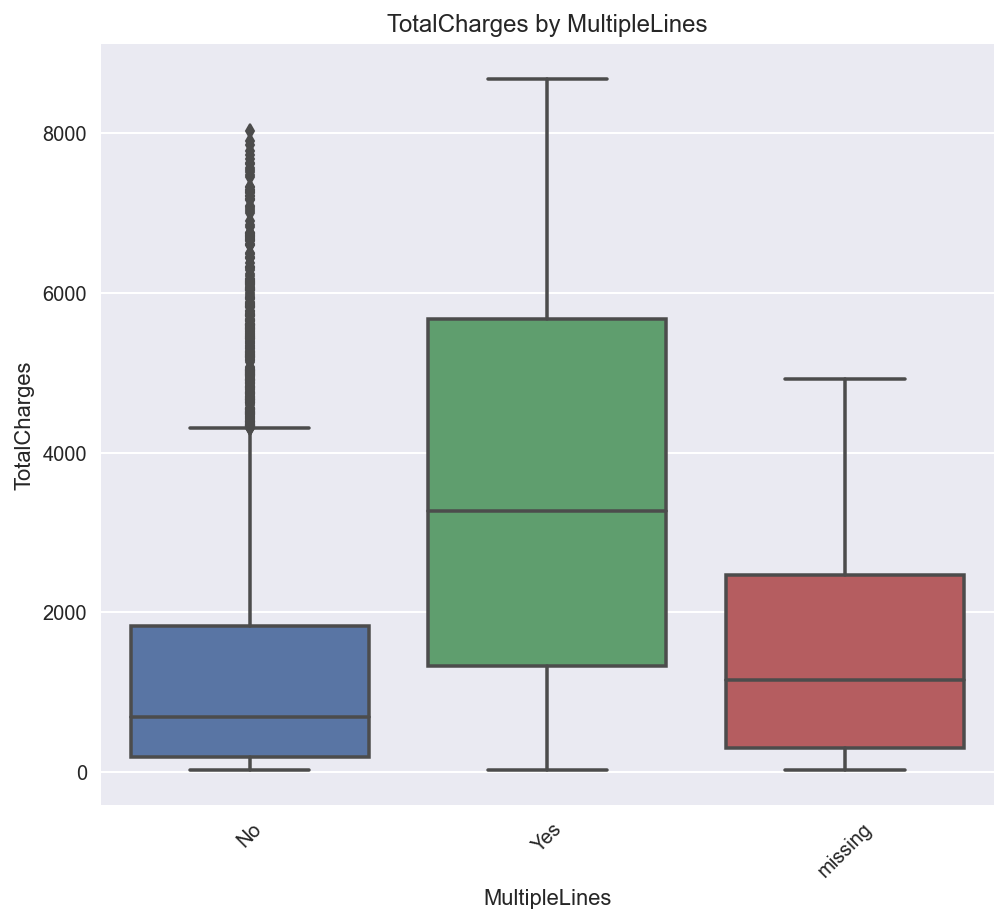

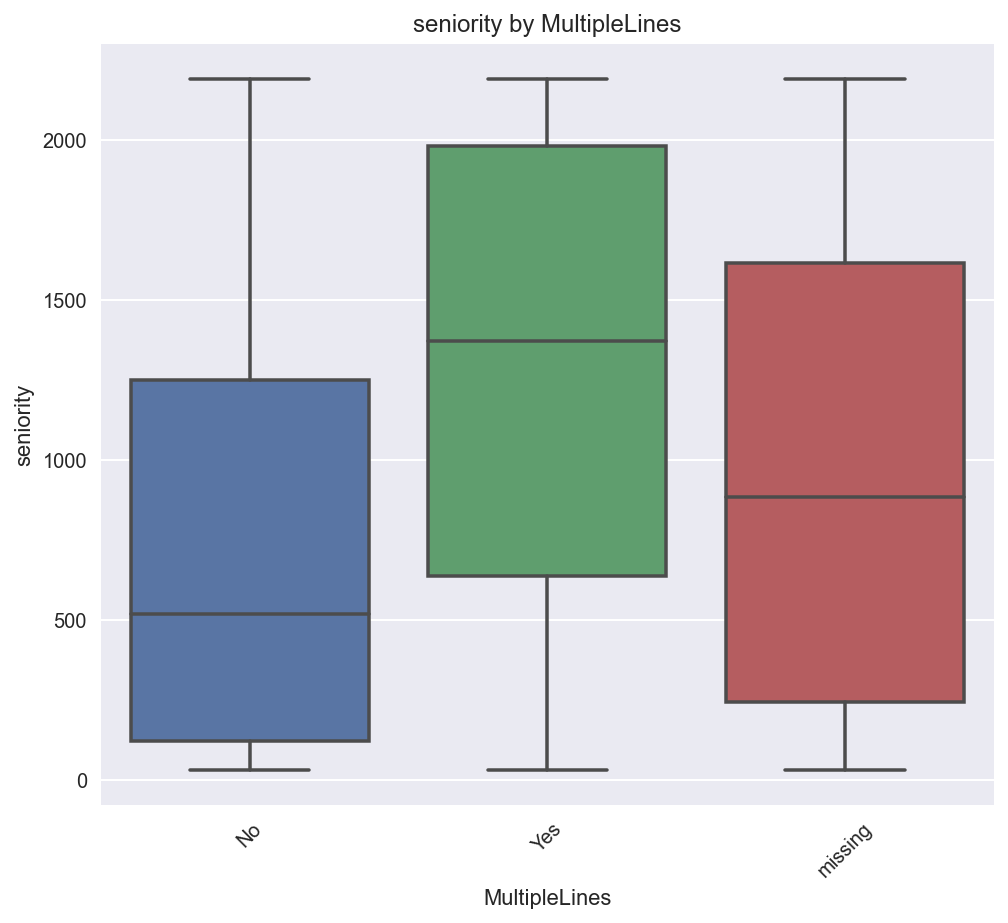

In [61]:
for cat_column in df.select_dtypes(include='category').columns:
    for num_column in df.select_dtypes(include='number').columns:
        fig_int = plt.figure(figsize=(8,7))
        fig_run = sns.boxplot(x=df[cat_column], y = df[num_column], data=df)
        xrot = plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
        tit = plt.title(f'{num_column} by {cat_column}')
        plt.show()

Intermediate conclusions:

* Monthly subscriptions are more costly than one-year subscription. Two-year subscriptions are the cheapest.  
* The longer the subscription, the higher the total charges (and seniority).
* Electronic billing users are heavier clients (pay more) than those asking for physical bills.
* Mailed check customers are the lightest clients.
* Electronic check users pay the most per month but churn fast because the have the low total charges.
* In general, Electronic and mail check users churn the fastest. Far faster than credit card or bank transfer payers.
* High monthly charges are indeed good predictors of churn probability (vice versa for total charges / seniority as loyal customers have higher total charges).  

* Senior citizens pay higher monthly/total charges. Possibly they have more time and require higher level of leisure and communication services.
* Customers with partners tend to pay higher monthly/total charges. Not only they pay higher charges they are more loyal customers (higher seniority).
* Customers with dependents pay lower monthly charges (maybe they have discounts) but they stay with the company longer.
* The type of the internet service is an excellent predictor of the monthly charges (with missing infrastructure users paying the least and fiber optic users paying the most).
* Since there is no big difference between the internet infrastructure classes senirity, the total charges can be generally attributed to the higher monthly charges.
* Users with online security/backup/device protection/tech support/streamingTV/streamingMovies/multiple are more loyal - churn slower and present higher monthly/total charges.
* I tend to believe that the missing data in the internet services features addresses unique subscribers that may have what is called 'light line plans' or 'pay per minute' and so forth because their monthly charges are so much lower than the other users.

#### Relation between target and numerical variables

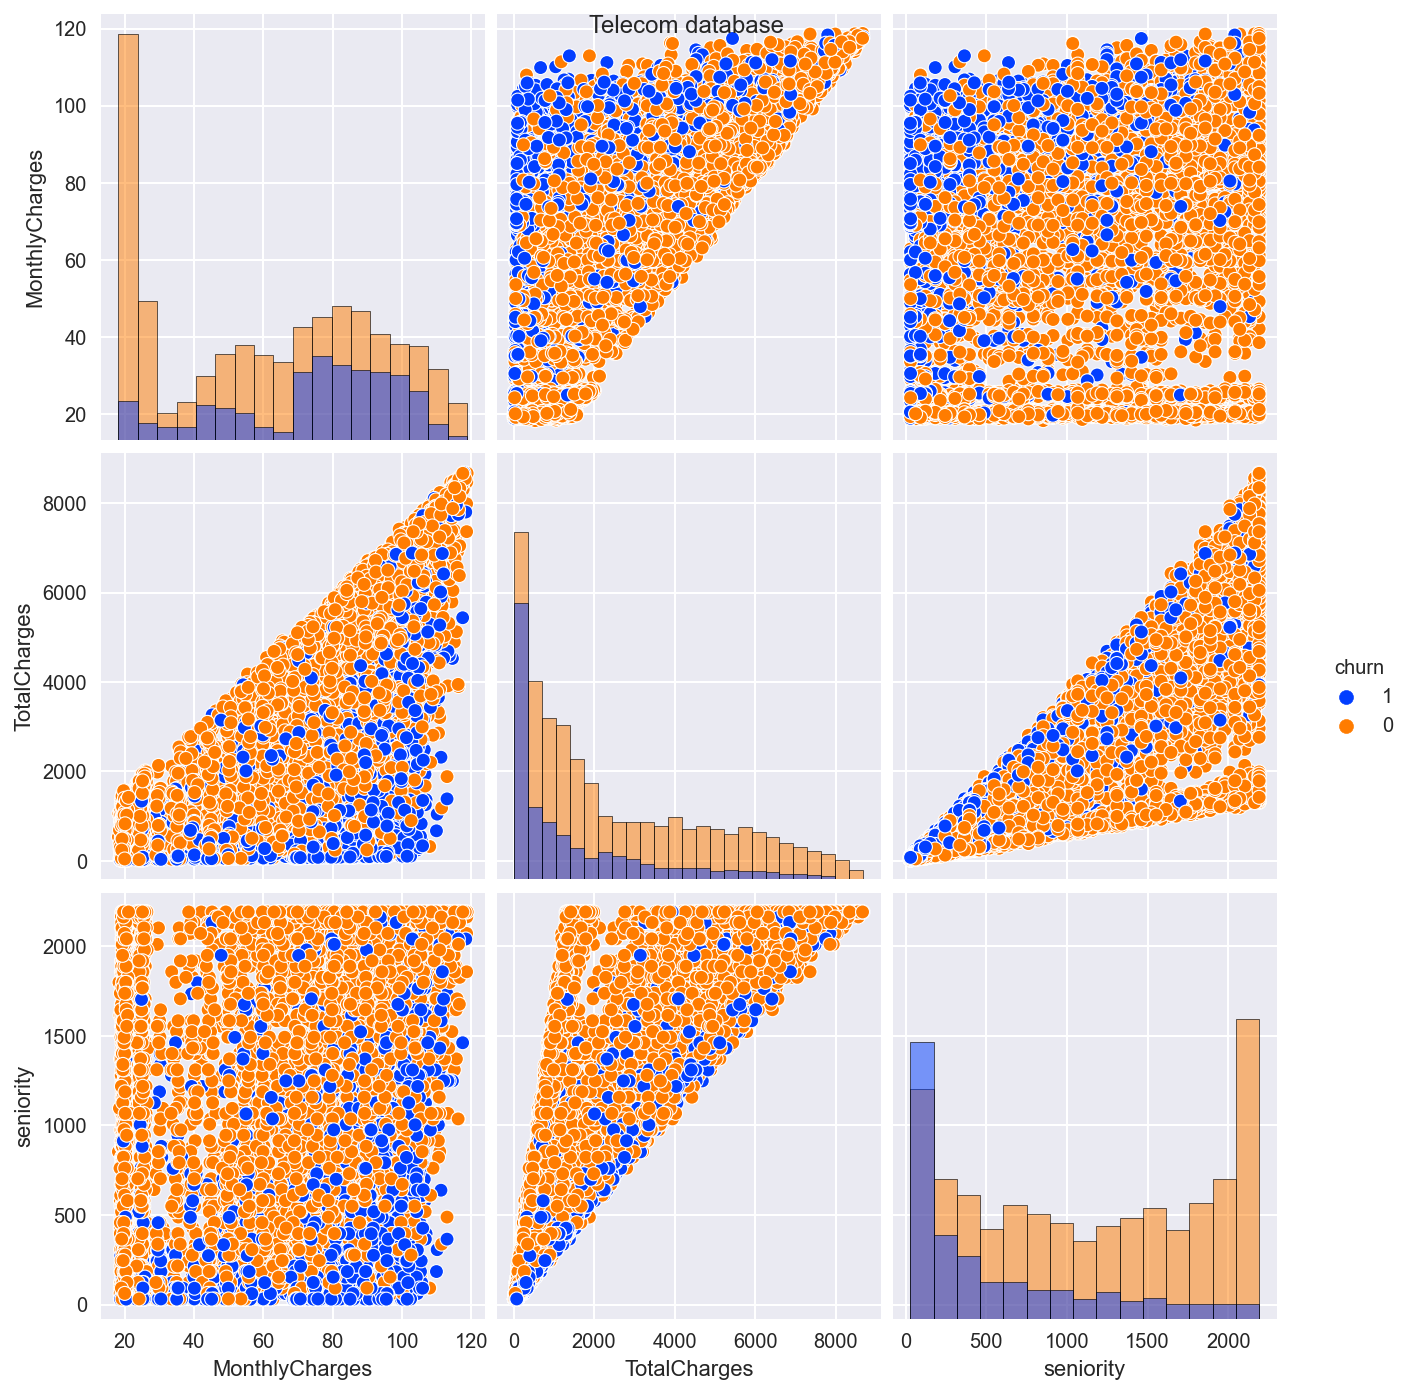

In [62]:
g = sns.pairplot(df, hue = 'churn', diag_kind='hist', palette='bright')
fig1 = g.fig.suptitle("Telecom database")
fig2 = g.fig.set_size_inches(10,10)
plt.show()

We can see that most churners leave fast, but those that stay longer are typically heavy users with high monthly charges.

The EDA is finished.

## Arrange datasets

### Divide the data to features and target

In [63]:
y = df.churn.copy()

In [64]:
X = df.drop(columns = ['churn', 'customerID']).copy()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

### Define categorical and numerical features  
We will need those definitions later for the feature selection process.

In [65]:
cats = list(X.select_dtypes(include='category').columns)
cats

['Type',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'MultipleLines']

In [66]:
nums = list(X.select_dtypes(include='number').columns)
nums

['MonthlyCharges', 'TotalCharges', 'seniority']

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

### Split the data to training, validation and testing sets

In [67]:
# revision 1:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Correction for revision 2 - define validation set for feature and model selection
# Define 60% training set:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, random_state=1)
# Define 20% validation and 20% test sets:
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.5, random_state=2)

In [68]:
X_train.shape
X_val.shape
X_test.shape
y_train.shape
y_val.shape
y_test.shape

(4219, 18)

(1406, 18)

(1407, 18)

(4219,)

(1406,)

(1407,)

## Feature selection

As listed above, we will now evaluate the leading features to use in our models [1-2].  
Note that, if necessary, the following procedure can later be improved with different prediction models, cross validation and so forth to enhance performance. Our main objective here is just feature selection, not receiving an appropriate, best performing model. This will follow. Scikit offers the selectkbest class for this task (see below). The feauture grading can be bases on several stiatistic approaches. We will use the chi squared mutual information approaches.  

Feature selection does not necessitate one hot encoded data. We simply ordinal encode our features. We also do not need scaling. For the chi squared statistic, scaling has identical effects on the numerator (observed-expected) and the denominator (expected) and therefore, the statistic hardly changes [1-2]. The mutual information is cross-entropy based and relies on probabilities and the log of the ratio between the mutual probability p(x1,x2) and the independent case p(x1)*p(x2) [3]. So scaling is irrelevant here as well.  

The scikit-learn library provides an implementation of the chi-squared test using the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class [4-6].  
The documentation provides the following warning: "Beware not to use a regression scoring function with a classification problem, you will get useless results."[7]. Thus, we only encode categorical features. The features array is reduced by the three numerical columns (monthly and total charges and seniority):  
[1] https://machinelearningmastery.com/feature-selection-with-categorical-data/  
[2] https://machinelearningmastery.com/information-gain-and-mutual-information/  
[3] https://www.youtube.com/watch?v=U9h1xkNELvY
[4] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html  
[5] https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection  
[6] https://www.youtube.com/watch?v=UW9U0bYJ-Ys  
[7] https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [69]:
oe = OrdinalEncoder()
oe.fit(X_train[cats])
X_train_enc = oe.transform(X_train[cats])
# correction for revision 2
# X_test_enc = oe.transform(X_test[cats]) 
X_val_enc = oe.transform(X_val[cats]) # added validation set

OrdinalEncoder()

In [70]:
X_train.shape
X_train_enc.shape
# correction for revision 2
#X_test_enc.shape 
X_val_enc.shape   # added validation set

(4219, 18)

(4219, 15)

(1406, 15)

We removed the numeric features so that chi2 test will be valid.

In [71]:
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, y_train)
X_train_fs = fs.transform(X_train_enc)
# correction for revision 2
# X_test_fs = fs.transform(X_test_enc) 
X_val_fs = fs.transform(X_val_enc)     # added validation set

SelectKBest(k='all', score_func=<function chi2 at 0x00000197EF047310>)

When you use directly .fit_transform(features, target), the selector is not stored and you are directly returning the selected features. However, the scores is an attribute of the selector. In order to get them, you have to use .fit(features, target). Once you have your selector fitted, you can get the selected features by calling selector.transform(features)  
https://stackoverflow.com/questions/32701649/how-to-get-the-scores-of-each-feature-from-sklearn-feature-selection-selectkbest

Print the scores for the variables (largest is better):

In [72]:
frame = {'chi2_score': pd.Series(fs.scores_), 'pvalue': pd.Series(fs.pvalues_)}
fs_chi2 = pd.DataFrame(frame)
fs_chi2=fs_chi2.sort_values(by=['chi2_score'], axis=0, ascending=False)
fs_chi2

chi2_score         pvalue
0   684.042557  8.826975e-151
8   411.529184   1.703193e-91
11  402.128888   1.894548e-89
9   271.884899   4.406655e-61
10  258.479039   3.681738e-58
12  128.316412   9.570246e-30
13  127.913431   1.172471e-29
4    88.557673   4.937418e-21
6    82.181970   1.241169e-19
1    57.353253   3.641605e-14
5    52.404305   4.517327e-13
2    30.197968   3.901179e-08
7     5.525547   1.874074e-02
14    2.243534   1.341741e-01
3     0.181433   6.701446e-01

Let's check the calculation:  
https://www.youtube.com/watch?v=fMIwIKLGke0

Feature 0 - type (leading feature):

In [73]:
cats[0]

'Type'

Let's start with a cross table:

In [74]:
crosstable = pd.crosstab(X_train_enc[:,0], y_train, margins=True)
crosstable

churn     1     0   All
row_0                  
0.0     991  1299  2290
1.0     103   801   904
2.0      27   998  1025
All    1121  3098  4219

We can see a clear pattern.  
Type 0 (monthly subsription) is clearly more susceptible to churn relative to Types 1/2 (the one and two year subscriptions).  
This already indicates an important feature.

Now let's use the chi2 test to check for a valid feature:

In [75]:
def check_categorical_dependency(crosstab_table, confidence_interval):
    stat, p, dof, expected = stats.chi2_contingency(crosstab_table)
    
    print ("Chi-Square Statistic value = {}".format(stat))
    print ("P Value = {}".format(p))
    alpha = 1.0 - confidence_interval
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('The expected table:\n')
    return pd.DataFrame(expected)

In [76]:
check_categorical_dependency(crosstable, 0.95)

Chi-Square Statistic value = 735.2476984275379
P Value = 1.4966868066525426e-155
Dependent (reject H0)
The expected table:



0            1       2
0   608.459351  1681.540649  2290.0
1   240.195307   663.804693   904.0
2   272.345342   752.654658  1025.0
3  1121.000000  3098.000000  4219.0

We can see that the tables are not identical.  
Their differences yields the chi2 statistic derived above.  
The p-value clearly indicates dependence (as should be for a valid feature..)

Feature 3 - gender (the worst feature):

In [77]:
cats[3]

'gender'

In [78]:
crosstable = pd.crosstab(X_train_enc[:,3], y_train, margins=True)
crosstable
check_categorical_dependency(crosstable, 0.95)

churn     1     0   All
row_0                  
0.0     564  1526  2090
1.0     557  1572  2129
All    1121  3098  4219

Chi-Square Statistic value = 0.36625160281447283
P Value = 0.9851455511504239
Independent (fail to reject H0)
The expected table:



0            1       2
0   555.318796  1534.681204  2090.0
1   565.681204  1563.318796  2129.0
2  1121.000000  3098.000000  4219.0

We clearly see from the cross table that gender does not affect churn and from the expected table that the expected and actual values are nearly identical - that means a very low chi2 statistic, as we indeed received above. This feature and our target are independent and it is therefore useless for us.

Let us plot our features scores:

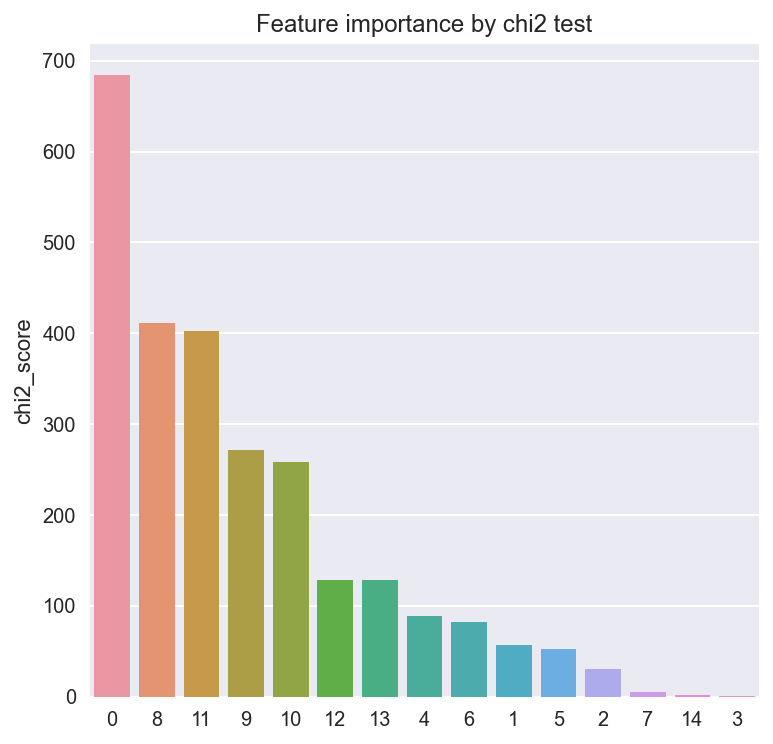

In [79]:
fig_init = plt.figure(figsize=(6,6))
plot = sns.barplot(x=fs_chi2.index,
                   y=fs_chi2['chi2_score'], data=fs_chi2,
                   order=fs_chi2.index)
tit = plt.title('Feature importance by chi2 test')
plt.show()

In [80]:
cats[3]
cats[14]
cats[7]
cats[2]

'gender'

'MultipleLines'

'InternetService'

'PaymentMethod'

The largest values represent the most relevant features.  
The irrelevant features (by order of irrelevance) appear to be 3, 14, 7, 2.  
('gender', 'MultipleLines', 'InternetService', 'PaymentMethod')  

https://stackoverflow.com/questions/57273694/how-selectkbest-chi2-calculates-score  
https://stackoverflow.com/questions/32701649/how-to-get-the-scores-of-each-feature-from-sklearn-feature-selection-selectkbest 

The chi2 feature selection is very established but it has a significant disadvantage.  
It can not address numeric features.  
To include the numerical data in the feature selection process, we have to employ the mutual_info_classif scoring function (mutual information). This statistic is based on cross entropy, as in decision trees and can handle both numerical and categorical data.  

https://stats.stackexchange.com/questions/421912/selectkbest-score-function-with-mixed-categorical-and-continuous-data  
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html  
https://stats.stackexchange.com/questions/420918/how-are-the-scores-computed-with-selectkbest-sklearn

Let's join the numerical data with the encoded categorical data:

In [81]:
X_train_enc_mic = np.concatenate(
    (np.array(X_train[nums]), X_train_enc), 
    axis=1)

In [82]:
X_train_enc_mic.shape

(4219, 18)

In [83]:
# removed from revision 1
#X_test_enc_mic = np.concatenate(
#    (np.array(X_test[nums]), X_test_enc), 
#    axis=1)

In [85]:
X_val_enc_mic = np.concatenate(
    (np.array(X_val[nums]), X_val_enc), 
    axis=1)

In [86]:
# X_test_enc_mic.shape # removed from revision 1
X_val_enc_mic.shape

(1406, 18)

In [90]:
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_enc_mic, y_train)
X_train_fs = fs.transform(X_train_enc_mic)
# X_test_fs = fs.transform(X_test_enc_mic) # removed from revision 1
X_val_fs = fs.transform(X_val_enc_mic)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x00000197EF703C10>)

In [91]:
frame = {'mic_score': pd.Series(fs.scores_)}
fs_mic = pd.DataFrame(frame)
fs_mic=fs_mic.sort_values(by=['mic_score'], axis=0, ascending=False)
fs_mic

mic_score
2    0.318397
3    0.098697
11   0.067659
14   0.057066
1    0.053393
0    0.048669
5    0.048071
10   0.047372
12   0.044384
13   0.037305
15   0.031077
7    0.025487
16   0.020303
4    0.017224
9    0.010276
8    0.009611
6    0.007341
17   0.000000

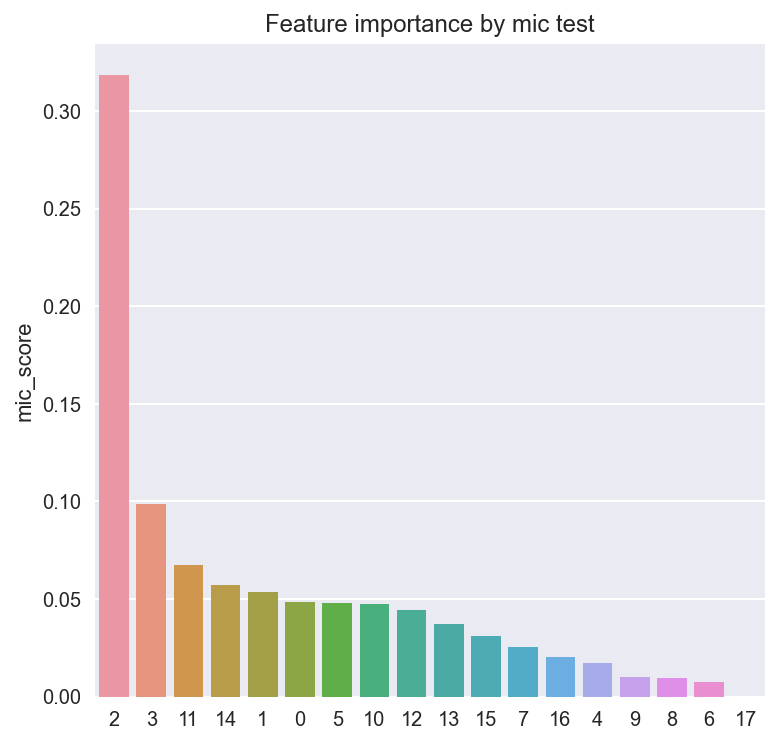

In [92]:
fig_init = plt.figure(figsize=(6,6))
plot = sns.barplot(x=fs_mic.index,
                   y=fs_mic['mic_score'], data=fs_mic,
                   order=fs_mic.index)
tit = plt.title('Feature importance by mic test')
plt.show()

In [92]:
cats[7-3]
cats[6-3]
cats[9-3]
cats[17-3]

'SeniorCitizen'

'gender'

'Dependents'

'MultipleLines'

* Note that the feature importance order changes (compared to the chi2 results).  
* The largest values still represent the most relevant features.  
The irrelevant features for cross entropy (mutual information) appear to be 7, 6, 9, 17.  
('SeniorCitizen', 'gender', 'Dependents', 'MultipleLines')  
* Recall that we added 3 numerical features.  
So these features are corresponding to the previous features 4, 3, 6, 14.
* The chi2 irrelevant features appeared to be 3, 14, 7, 2.  
('gender', 'MultipleLines', 'InternetService', 'PaymentMethod')  
* So the two features 3, 14 (6, 17 or 'MultipleLines', 'gender') are the clear candidates for removal. 
* Features 2, 4, 6, 7 (5, 7, 9, 10) or ('Dependents', 'SeniorCitizen', 'PaymentMethod', 'InternetService') are optional candidate for removal.

(Remark - features 7, 8 and 9 provide very close results.  
Perhaps it is a package version or minute numerical precision differences between my machine and the platform. On my local machine feature 9 usually turns out to be worse than features 7/8 for mutual information.  
The chi2 results were the same.
I do not bother with changing the script as those features ended as remaining on the database. The removed features are clearly worse than the others and provide consistent indications
"Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome."  
https://machinelearningmastery.com/feature-selection-with-categorical-data/)

Let's fit and validate a model based on the following configurations:
1. All features
2. Without features 6, 17 ('MultipleLines', 'gender') - the clear candidates for removal ~~7, 18~~
3. Without features 5-7, 9, 10, 17 - the leading candidates for removal from the two feature selection approaches ~~5-7, 9, 11, 18~~
4. Without a few more less independent features

To keep things simple, let's use logistic regression.  
Please recall that the actual results received are not representative of our final model performance.  
We did not optimize the classifier yet, did not employ one hot encoding and so forth.  
These are just comparative procedures.

In [93]:
model = LogisticRegression(solver='lbfgs')

In [94]:
# Instantiate model
model = LogisticRegression(
    verbose=0, 
    solver='liblinear', 
    C=4, 
    penalty='l2', 
    max_iter=1000)

### All features

In [95]:
# fit the model
model.fit(X_train_enc_mic, y_train)
# make predictions
#correction for revision 2 - replace test with val sets
# yhat = model.predict(X_test_enc_mic) # removed from revision 1
yhat = model.predict(X_val_enc_mic)   # added
# evaluate predictions
# accuracy = accuracy_score(y_test, yhat) # removed from revision 1
accuracy = accuracy_score(y_val, yhat) # added
print('Accuracy: %.2f' % (accuracy*100))
# calculate score
# score = f1_score(y_test, yhat, average='binary') # removed from revision 1
score = f1_score(y_val, yhat, average='binary') # added
print('F1: %.2f' % (score))

LogisticRegression(C=4, max_iter=1000, solver='liblinear')

Accuracy: 80.51
F1: 0.60


Just as an example, you can see below how scaling does not help the performance:

In [96]:
# fit the model

from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler() # invoke scaler

# Since our features distributions are not normal, we will use the minmax scaler.
# Note the we need to fit_transform the training set but only transform the test set.

X_train_enc_mic_scaled = MMscaler.fit_transform(X_train_enc_mic) # instantiate and use scaler on train set  
#correction for revision 2 - replace test with val sets
#X_test_enc_mic_scaled = MMscaler.transform(X_test_enc_mic)       # use scaler on test set  
X_val_enc_mic_scaled = MMscaler.transform(X_val_enc_mic)       # use scaler on test set  

model.fit(X_train_enc_mic_scaled, y_train)
# make predictions

#correction for revision 2 - replace test with val sets
# yhat = model.predict(X_test_enc_mic_scaled) # removed from revision 1
yhat = model.predict(X_val_enc_mic_scaled)

# evaluate predictions
#accuracy = accuracy_score(y_test, yhat)
accuracy = accuracy_score(y_val, yhat)
print('Accuracy: %.2f' % (accuracy*100))
# calculate score
#score = f1_score(y_test, yhat, average='binary')
score = f1_score(y_val, yhat, average='binary')
print('F1: %.2f' % (score))

LogisticRegression(C=4, max_iter=1000, solver='liblinear')

Accuracy: 80.44
F1: 0.59


### Without features 6, 17

In [97]:
#X_train_enc_mic2 = np.delete(X_train_enc_mic,[7,18],1)
#X_test_enc_mic2 = np.delete(X_test_enc_mic,[7,18],1)

X_train_enc_mic2 = np.delete(X_train_enc_mic,[6,17],1)
X_val_enc_mic2 = np.delete(X_val_enc_mic,[6,17],1)
model.fit(X_train_enc_mic2, y_train)

# make predictions
#yhat = model.predict(X_test_enc_mic2)
yhat = model.predict(X_val_enc_mic2)

# evaluate predictions
#accuracy = accuracy_score(y_test, yhat)
accuracy = accuracy_score(y_val, yhat)
print('Accuracy: %.2f' % (accuracy*100))
# calculate score
#score = f1_score(y_test, yhat, average='binary')
score = f1_score(y_val, yhat, average='binary')
print('F1: %.2f' % (score))

LogisticRegression(C=4, max_iter=1000, solver='liblinear')

Accuracy: 81.15
F1: 0.61


We got a small improvement (accuracy and F1).

### Without features 5-7, 9, 10, 17

In [98]:
#X_train_enc_mic3 = np.delete(X_train_enc_mic,[5, 6, 7, 9, 11, 18],1)
#X_test_enc_mic3 = np.delete(X_test_enc_mic,[5, 6, 7, 9, 11, 18],1)

X_train_enc_mic3 = np.delete(X_train_enc_mic,[5, 6, 7, 9, 10, 17],1)
X_val_enc_mic3 = np.delete(X_val_enc_mic,[5, 6, 7, 9, 10, 17],1)

model.fit(X_train_enc_mic3, y_train)
# make predictions
#yhat = model.predict(X_test_enc_mic3)
yhat = model.predict(X_val_enc_mic3)
# evaluate predictions
#accuracy = accuracy_score(y_test, yhat)
accuracy = accuracy_score(y_val, yhat)
print('Accuracy: %.2f' % (accuracy*100))
# calculate score
#score = f1_score(y_test, yhat, average='binary')
score = f1_score(y_val, yhat, average='binary')
print('F1: %.2f' % (score))

LogisticRegression(C=4, max_iter=1000, solver='liblinear')

Accuracy: 80.37
F1: 0.60


Not really better than the original (full) model.

### Without a few more less predominant features

Let's try removing a few more less relevant features just for verification:

In [99]:
#X_train_enc_mic4 = np.delete(X_train_enc_mic,[4, 5, 6, 7, 8, 9, 10, 11, 18],1)
#X_test_enc_mic4 = np.delete(X_test_enc_mic,[4, 5, 6, 7, 8, 9, 10, 11, 18],1)

X_train_enc_mic4 = np.delete(X_train_enc_mic,[4, 5, 6, 7, 8, 9, 10, 17],1)
X_val_enc_mic4 = np.delete(X_val_enc_mic,[4, 5, 6, 7, 8, 9, 10, 17],1)

model.fit(X_train_enc_mic4, y_train)
# make predictions
#yhat = model.predict(X_test_enc_mic4)
yhat = model.predict(X_val_enc_mic4)
# evaluate predictions
#accuracy = accuracy_score(y_test, yhat)
accuracy = accuracy_score(y_val, yhat)
print('Accuracy: %.2f' % (accuracy*100))
# calculate score
#score = f1_score(y_test, yhat, average='binary')
score = f1_score(y_val, yhat, average='binary')
print('F1: %.2f' % (score))

LogisticRegression(C=4, max_iter=1000, solver='liblinear')

Accuracy: 79.66
F1: 0.59


Quite logically, here, we removed too many features and the performance reduced even compared to the original model.

Feature selection should follow option 2 of course.  
We will remove features 6, 17 ~~7, 18~~

In [100]:
X_train.columns[6]
X_train.columns[17]

'gender'

'MultipleLines'

## One-hot encode categorical features

Our categorical variables are not ordinal. Even the BeginMonth is not ordered because a March can precede a January depending on the year of subsricption joining. So we will one hot encode all variables.  
If linear regression is used we must drop the first transformed column to avoid linearly dependent columns and matrix inversion issues. This is not relevant in this project.

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/  
https://www.analyticsvidhya.com/blog/2021/05/how-to-perform-one-hot-encoding-for-multi-categorical-variables/  
https://inmachineswetrust.com/posts/drop-first-columns/  
https://stats.stackexchange.com/questions/231285/dropping-one-of-the-columns-when-using-one-hot-encoding  
https://stats.stackexchange.com/questions/390671/random-forest-regression-with-sparse-data-in-python/430127#430127  
https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707

In [101]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # invoke encoder class

In [102]:
Xtag=X.drop(columns = ['gender', 'MultipleLines']).copy()

Update categorical features to represent cleaned databases:

In [103]:
cats = list(Xtag.select_dtypes(include='category').columns)

In [104]:
for cat in cats:
    # ohe feature, instantiate encoder and form corresponding df
    ohe_X = pd.DataFrame(ohe_encoder.fit_transform(Xtag[[cat]]))
    # impose original names with class suffixes
    ohe_X.columns = ohe_encoder.get_feature_names_out([cat])
    # ensure index compatibility
    ohe_X.index = Xtag.index
    # remove encoded feature
    Xtag.drop([cat] ,axis=1, inplace=True)
    # replace it with the ohe data
    Xtag = pd.concat([Xtag, ohe_X.astype('int64')], axis=1)

https://stackoverflow.com/questions/56338847/how-to-give-column-names-after-one-hot-encoding-with-sklearn

In [105]:
Xtag.head()

MonthlyCharges  TotalCharges  seniority  Type_Month-to-month  \
0           29.85         29.85         31                    1   
1           56.95       1889.50       1036                    0   
2           53.85        108.15         61                    1   
3           42.30       1840.75       1371                    0   
4           70.70        151.65         61                    1   

   Type_One year  Type_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              0              0                    0                     1   
1              1              0                    1                     0   
2              0              0                    0                     1   
3              1              0                    1                     0   
4              0              0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  SeniorCitizen_0  SeniorCitizen_1  Partner_No  \
0                           0                1                0           0   
1                           1                1                0           1   
2                           1                1                0           1   
3                           0                1                0           1   
4                           0                1                0           1   

   Partner_Yes  Dependents_No  Dependents_Yes  InternetService_DSL  \
0            1              1               0                    1   
1            0              1               0                    1   
2            0              1               0                    1   
3            0              1               0                    1   
4            0              1               0                    0   

   InternetService_Fiber optic  InternetService_missing  OnlineSecurity_No  \
0                            0                        0                  1   
1                            0                        0                  0   
2                            0                        0                  0   
3                            0                        0                  0   
4                            1                        0                  1   

   OnlineSecurity_Yes  OnlineSecurity_missing  OnlineBackup_No  \
0                   0                       0                0   
1                   1                       0                1   
2                   1                       0                0   
3                   1                       0                1   
4                   0                       0                1   

   OnlineBackup_Yes  OnlineBackup_missing  DeviceProtection_No  \
0                 1                     0                    1   
1                 0                     0                    0   
2                 1                     0                    1   
3                 0                     0                    0   
4                 0                     0                    1   

   DeviceProtection_Yes  DeviceProtection_missing  TechSupport_No  \
0                     0                         0               1   
1                     1                         0               1   
2                     0        

In [106]:
Xtag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           7032 non-null   float64
 1   TotalCharges                             7032 non-null   float64
 2   seniority                                7032 non-null   int64  
 3   Type_Month-to-month                      7032 non-null   int64  
 4   Type_One year                            7032 non-null   int64  
 5   Type_Two year                            7032 non-null   int64  
 6   PaperlessBilling_No                      7032 non-null   int64  
 7   PaperlessBilling_Yes                     7032 non-null   int64  
 8   PaymentMethod_Bank transfer (automatic)  7032 non-null   int64  
 9   PaymentMethod_Credit card (automatic)    7032 non-null   int64  
 10  PaymentMethod_Electronic check           7032 no

Let's split the data for training, validation and testing:

In [107]:
# revision 1:
#Xtag_train, Xtag_test, y_train, y_test = train_test_split(Xtag, y, test_size=0.25, random_state=1)

# Correction for revision 2 - define validation set for feature and model selection
# Define 60% training set:
Xtag_train, Xtag_test1, y_train, y_test1 = train_test_split(Xtag, y, test_size=0.4, random_state=1)
# Define 20% validation and 20% test sets:
Xtag_val, Xtag_test, y_val, y_test = train_test_split(Xtag_test1, y_test1, test_size=0.5, random_state=2)

## Scaling

In [108]:
X_train_scaled = MMscaler.fit_transform(Xtag_train) # instantiate and use scaler on train set  
#add validation set
X_val_scaled = MMscaler.transform(Xtag_val)       # use scaler on test set  
X_test_scaled = MMscaler.transform(Xtag_test)       # use scaler on test set  

The process will convert the dataframes to arrays...

In [109]:
X_train_scaled.shape
X_val_scaled.shape
X_test_scaled.shape

y_train.shape
y_val.shape
y_test.shape

(4219, 39)

(1406, 39)

(1407, 39)

(4219,)

(1406,)

(1407,)

The datasets are ready.  
No need to use label encoder as the target arrives as boolean.

## Evaluation Procedure

Let us compose an evaluation routine for the project models.  
But first, a short reminder on our metrics:

### Accuracy 

Accuracy is simply the fraction of correct predictions (prediction class = true class) out of all posible prediction set.  
https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

### The F1 score 

The confusion matrix is defined as:  

|                | Positive Prediction | Negative Prediction |
|----------------|---------------------|---------------------|
| Positive Class | True Positive (TP)  | False Negative (FN) |
| Negative Class | False Positive (FP) | True Negative (TN)  |  

where:  
$Precision = \frac{TP}{TP + FP}$  
$Recall = \frac{TP}{TP + FN}$  
$F_{Measure} = \frac{2 * Precision * Recall}{Precision + Recall}$  

* Precision is the classifier ability not to label as positive a sample that is negative  
* Recall is the classifier ability to find all positive samples  
* The FMeasure is called F1 (score) in scikit.
* F1 is the harmonic mean of the precision and recall.  
It reaches its best value at 1 and worst score at 0.  

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics  
https://en.wikipedia.org/wiki/F-score

### ROC AUC

A Receiver Operator Characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It analyzes binary classifiers based on their ability to discriminate classes.  
The x axis is the False Positive Rate (FPR):  
$FPR = \frac{FP}{TN + FP}$  
The y axis is the True Positive Rate (TPR) (which equals the recall).  

Each threshold is a point on the plot and the points are connected to form a curve. A classifier that has no skill (e.g. predicts the majority class under all thresholds) will be represented by a diagonal line from the bottom left to the top right. Any points below this line have worse than no skill.  
A perfect model will be a point in the top left of the plot.

ROC AUC is the Area Under the Curve of the Receiver Operator Characteristic curve from prediction scores. While the ROC Curve is a helpful diagnostic for one model. The area under the ROC curve provides a single score to summarize the plot that can be used to compare different models. A no skill classifier (diagonal line) will have a score of 0.5, whereas a perfect classifier will have a score of 1.0.

https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve  
https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score  

### PRC

PRC is the Precision Recall Curve of pairs for different probability thresholds.  
A perfect classifier will have a PR value of 1.  
The baseline PRC AUC is the total positive samples/total data samples.  
The ROC - AUC corresponding metric is the Average Precision Score (APS) that computes the average value of precision (p) as a function of recall (r) - p(r) over the interval from r = 0 to r = 1:  

$\overline{p} = \int_{0}^{1} p(r)dr \approx \sum_{k=1}^{n} p(k) \Delta r(k) \$

where:  
* k is the rank in the sequence of recall thresholds  
* n is the number of thresholds used  
* p(k) is the precision at cut-off k  
* Δr(k) is the change in recall from threshold k − 1 to threshold k  

That is the area under the precision-recall curve.  

Why do we sometimes need both evaluation approaches (ROC/PRC and derived metrics)?  

1. In a very imbalanced dataset say with numerous true negatives, the FPR (x axis) will be very low all the time because we have many TN values. In these cases we will get a false high ROC AUC all the time. Therefore, in such cases a PR curve (not using TN at all) is much better.  
This is less relevant in our case since our database is not severely imbalanced.  
2. Mean Average Precision is the most common metric in Computer Vision / Deep Learning to evaluate object detection models.

https://www.youtube.com/watch?v=fF0MvCPsEp8  
https://www.youtube.com/watch?v=FppOzcDvaDI  
https://www.youtube.com/watch?v=pM6DJ0ZZee0  
https://www.youtube.com/watch?v=t98TA2RYQvw  
https://www.youtube.com/watch?v=x0SkRpIVMUs

### Evaulation script

In [110]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target),
                                   ('test', test_features, test_target)):
        # Loop on train / test
        # type - train / test identifier
                
        # Store results in a dictionary
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
                   
        # F1
        
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, 
                label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Establish and evaluate models

### Model 0 - Constant

In [111]:
from sklearn.dummy import DummyClassifier

In [112]:
clf_dummy = DummyClassifier(strategy = 'prior') 
# “prior”: the predict method always returns the most frequent class label in the observed y 
# argument passed to fit (like “most_frequent”). predict_proba always returns the empirical 
# class distribution of y also known as the empirical class prior distribution.  

dum_clas = clf_dummy.fit(X_train_scaled, 
                         np.array(y_train.astype(int))) # Features are arbitrary...

# https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
# https://towardsdatascience.com/why-using-a-dummy-classifier-is-a-smart-move-4a55080e3549

          train  test
Accuracy   0.73  0.75
F1         0.00  0.00
APS        0.27  0.25
ROC AUC    0.50  0.50


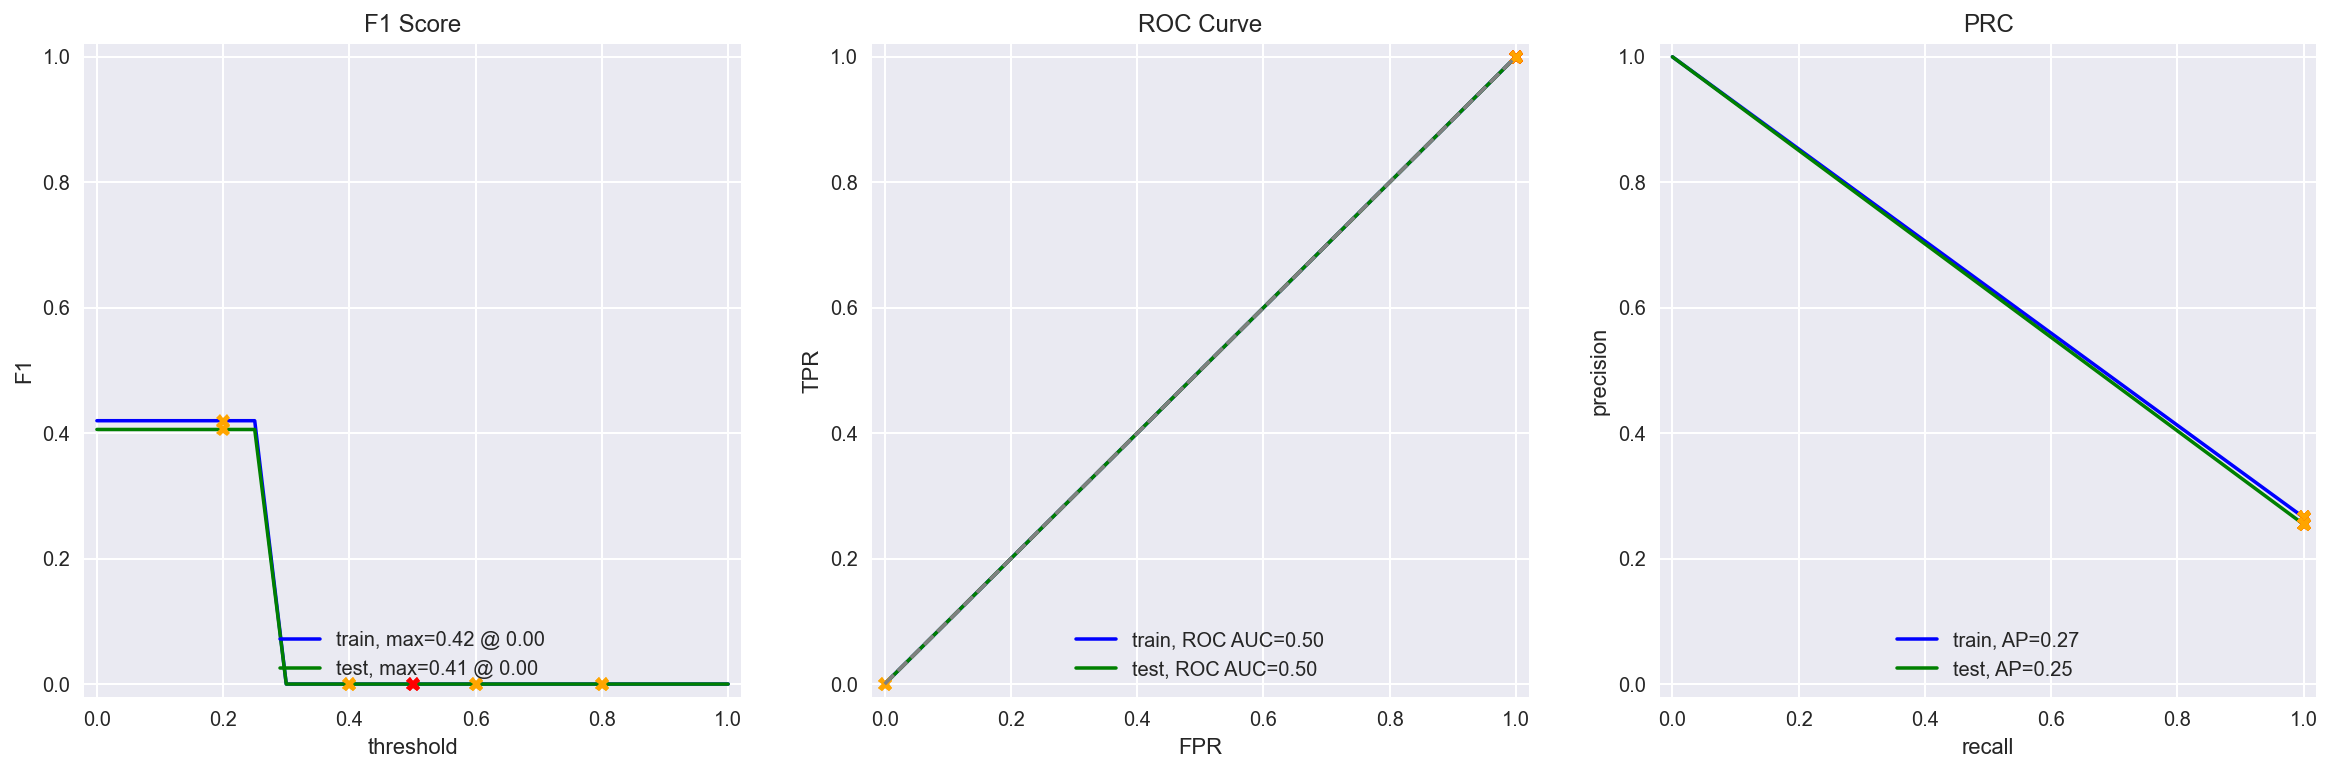

In [113]:
# replace test with val set:

#evaluate_model(dum_clas,
#               X_train_scaled, 
#               np.array(y_train.astype(int)), 
#               X_test_scaled, 
#               np.array(y_test.astype(int)))

evaluate_model(dum_clas,
               X_train_scaled, 
               np.array(y_train.astype(int)), 
               X_val_scaled, 
               np.array(y_val.astype(int)))

As expected, a very poor classifier...

Let's check the results

In [114]:
clf_dummy.fit(X_train_scaled, np.array(y_train.astype(int)))

DummyClassifier()

In [115]:
#predictions = clf_dummy.predict(X_test_scaled)
predictions = clf_dummy.predict(X_val_scaled)

In [116]:
pd.Series(predictions).value_counts()

0    1406
dtype: int64

In [117]:
#y_test.value_counts()
y_val.value_counts()

0    1048
1     358
Name: churn, dtype: int64

As we can see, the classifier always predicts the dominant class value of 0.

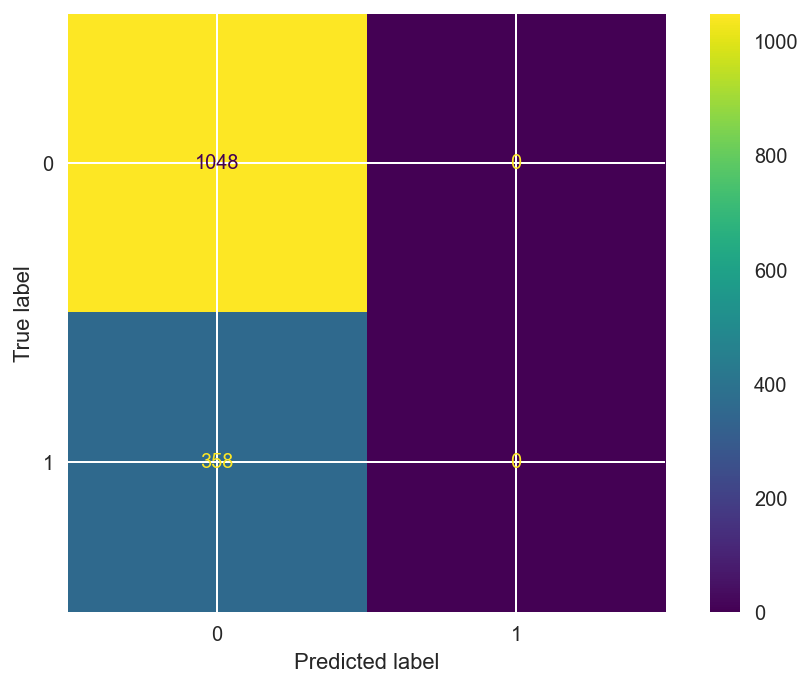

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnfmat = ConfusionMatrixDisplay.from_estimator(
    dum_clas, 
    X_val_scaled, #X_test_scaled, 
    np.array(y_val.astype(int)))#np.array(y_test.astype(int)))  
plt.show()

In [119]:
# accuracy = fraction of correct prediction
#accuracy = y_test[y_test == 0].count() / len(y_test)
accuracy = y_val[y_val == 0].count() / len(y_val)
accuracy

0.7453769559032717

In [120]:
#cm = confusion_matrix(np.array(y_test.astype(int)), predictions)
cm = confusion_matrix(np.array(y_val.astype(int)), predictions)

TN, FP, FN, TP = cm.ravel()

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('True Positive', TP)
print('True Negative', TN)
print('False Positive', FP)
print('False Negative', FN)
print('Accuracy', ACC)
print('FPR', FPR)
print('TPR', TPR)

# https://moonbooks.org/Articles/How-to-create-a-confusion-matrix-and-infer-the-true-positive-true-negative-false-positive-and-false-negative-values-using-scikit-learn-in-python-/
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

True Positive 0
True Negative 1048
False Positive 0
False Negative 358
Accuracy 0.7453769559032717
FPR 0.0
TPR 0.0


C:\Users\thego\AppData\Local\Temp\ipykernel_7124\2044229630.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  PPV = TP/(TP+FP)
C:\Users\thego\AppData\Local\Temp\ipykernel_7124\2044229630.py:19: RuntimeWarning: invalid value encountered in longlong_scalars
  FDR = FP/(TP+FP)


The warning is due to a division by zero.  
https://stackoverflow.com/questions/43216185/runtimewarning-invalid-value-encountered-in-longlong-scalars

### Model 1 - logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
# Instantiate model
logistic = LogisticRegression(
    verbose=0, 
    solver='liblinear', 
    C=4, 
    penalty='l2', 
    max_iter=1000)

# Train model
lr_model = logistic.fit(X_train_scaled,
                             np.array(y_train.astype(int)))

          train  test
Accuracy   0.81  0.81
F1         0.61  0.60
APS        0.66  0.63
ROC AUC    0.85  0.84


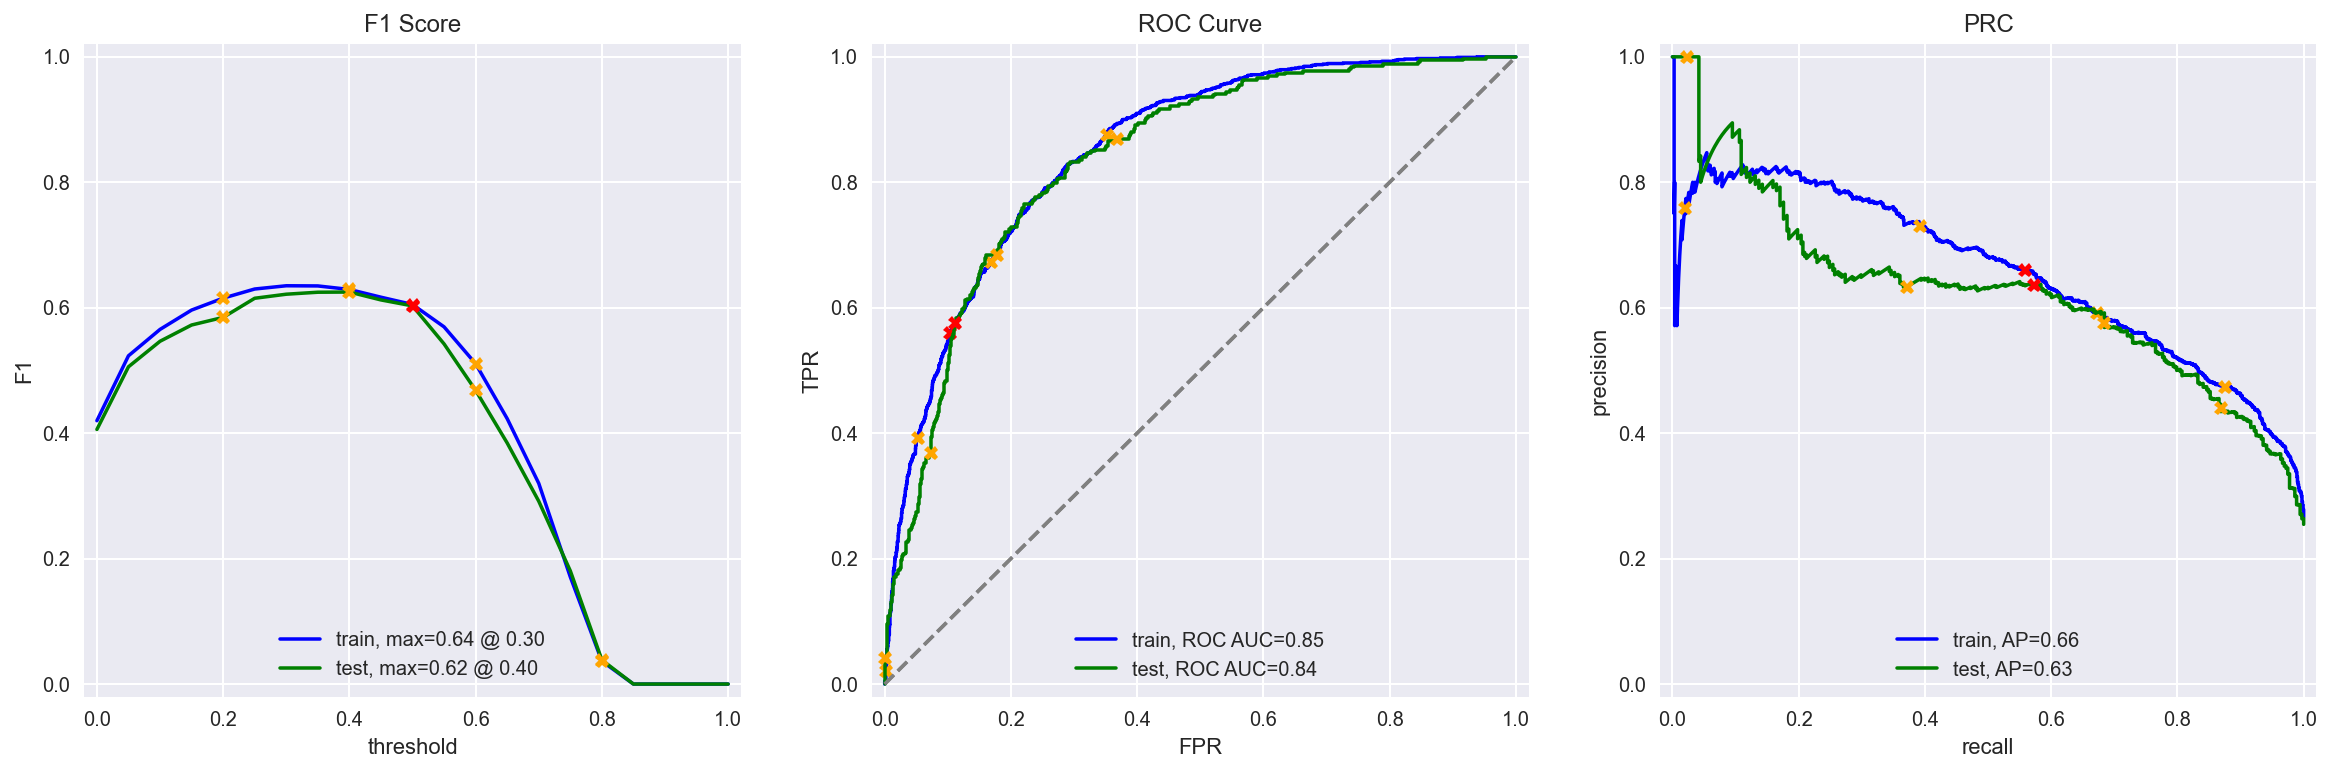

In [123]:
# replace test with val set:

#evaluate_model(lr_model,
#               X_train_scaled, 
#               np.array(y_train.astype(int)), 
#               X_test_scaled, 
#               np.array(y_test.astype(int)))

evaluate_model(lr_model,
               X_train_scaled, 
               np.array(y_train.astype(int)), 
               X_val_scaled, #X_test_scaled, 
               np.array(y_val.astype(int))) #np.array(y_test.astype(int)))

https://www.youtube.com/watch?v=_AjhdXuXEDE

Reasonable performance but not good enough.

### Model 2 LGBMClassifier

In [124]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [125]:
clf = lgb.LGBMClassifier(bagging_fraction = 0.8,
                         feature_fraction = 0.8,
                         #boosting = 'rf',
                         num_leaves = 31, #default
                         max_depth = 5, 
                         min_data_in_leaf = 20, #default
                         n_estimators = 200, #default = 100
                         objective = 'binary')#,
                         #early_stopping_round = 5)
                         
lgbm = clf.fit(X_train_scaled,
                     np.array(y_train.astype(int)))

# https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
# https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


Warnings are due to synonym parameter definition.  
A known lgbm issue.

          train  test
Accuracy   0.93  0.84
F1         0.86  0.66
APS        0.95  0.77
ROC AUC    0.98  0.89


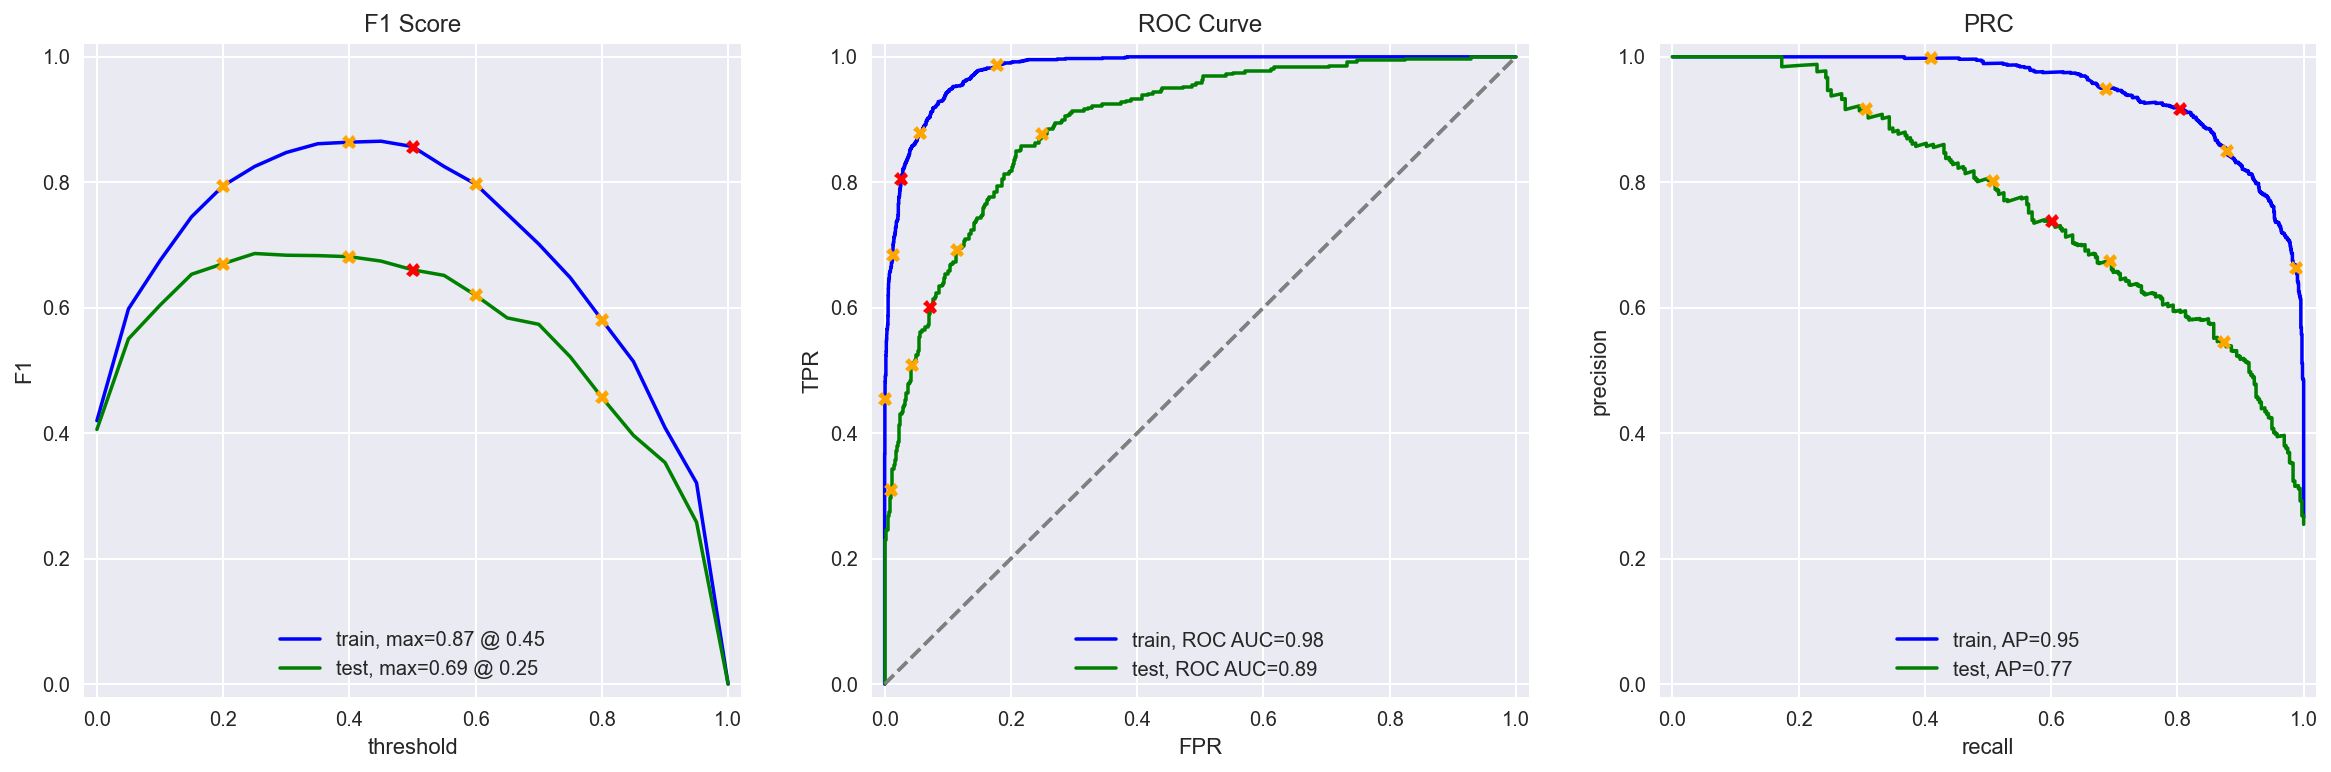

In [126]:
# replace test with val set:

#evaluate_model(lgbm,
#               X_train_scaled, 
#               np.array(y_train.astype(int)), 
#               X_test_scaled, 
#               np.array(y_test.astype(int)))

evaluate_model(lgbm,
               X_train_scaled, 
               np.array(y_train.astype(int)), 
               X_val_scaled, #X_test_scaled, 
               np.array(y_val.astype(int))) #np.array(y_test.astype(int)))

Gradient boosting shows performance advantages over logistic regression.  
As expected for a database heavily populated with categorical features.  
We already meet the client requirement for AUC-ROC ≥ 0.88 (validation set).  
Can we do better?

###  Model 4 - catboost

In [127]:
from catboost import CatBoostClassifier

In [128]:
# Initialize CatBoostClassifier
clf = CatBoostClassifier(iterations=400,
                         verbose=20,
                         learning_rate=0.05,
                         depth=5)

catb = clf.fit(X_train_scaled,
               np.array(y_train.astype(int)))

# https://catboost.ai/en/docs/concepts/python-usages-examples

0:	learn: 0.6612509	total: 147ms	remaining: 58.5s
20:	learn: 0.4246839	total: 183ms	remaining: 3.3s
40:	learn: 0.3890315	total: 220ms	remaining: 1.93s
60:	learn: 0.3722785	total: 285ms	remaining: 1.58s
80:	learn: 0.3605585	total: 319ms	remaining: 1.26s
100:	learn: 0.3527571	total: 371ms	remaining: 1.1s
120:	learn: 0.3469461	total: 406ms	remaining: 936ms
140:	learn: 0.3406768	total: 454ms	remaining: 833ms
160:	learn: 0.3343802	total: 489ms	remaining: 726ms
180:	learn: 0.3265002	total: 525ms	remaining: 635ms
200:	learn: 0.3185422	total: 583ms	remaining: 577ms
220:	learn: 0.3102178	total: 621ms	remaining: 503ms
240:	learn: 0.3049490	total: 664ms	remaining: 438ms
260:	learn: 0.2989946	total: 699ms	remaining: 372ms
280:	learn: 0.2927493	total: 734ms	remaining: 311ms
300:	learn: 0.2872298	total: 780ms	remaining: 257ms
320:	learn: 0.2820465	total: 816ms	remaining: 201ms
340:	learn: 0.2771975	total: 851ms	remaining: 147ms
360:	learn: 0.2713049	total: 897ms	remaining: 96.9ms
380:	learn: 0.26661

          train  test
Accuracy   0.90  0.84
F1         0.79  0.66
APS        0.90  0.78
ROC AUC    0.95  0.89


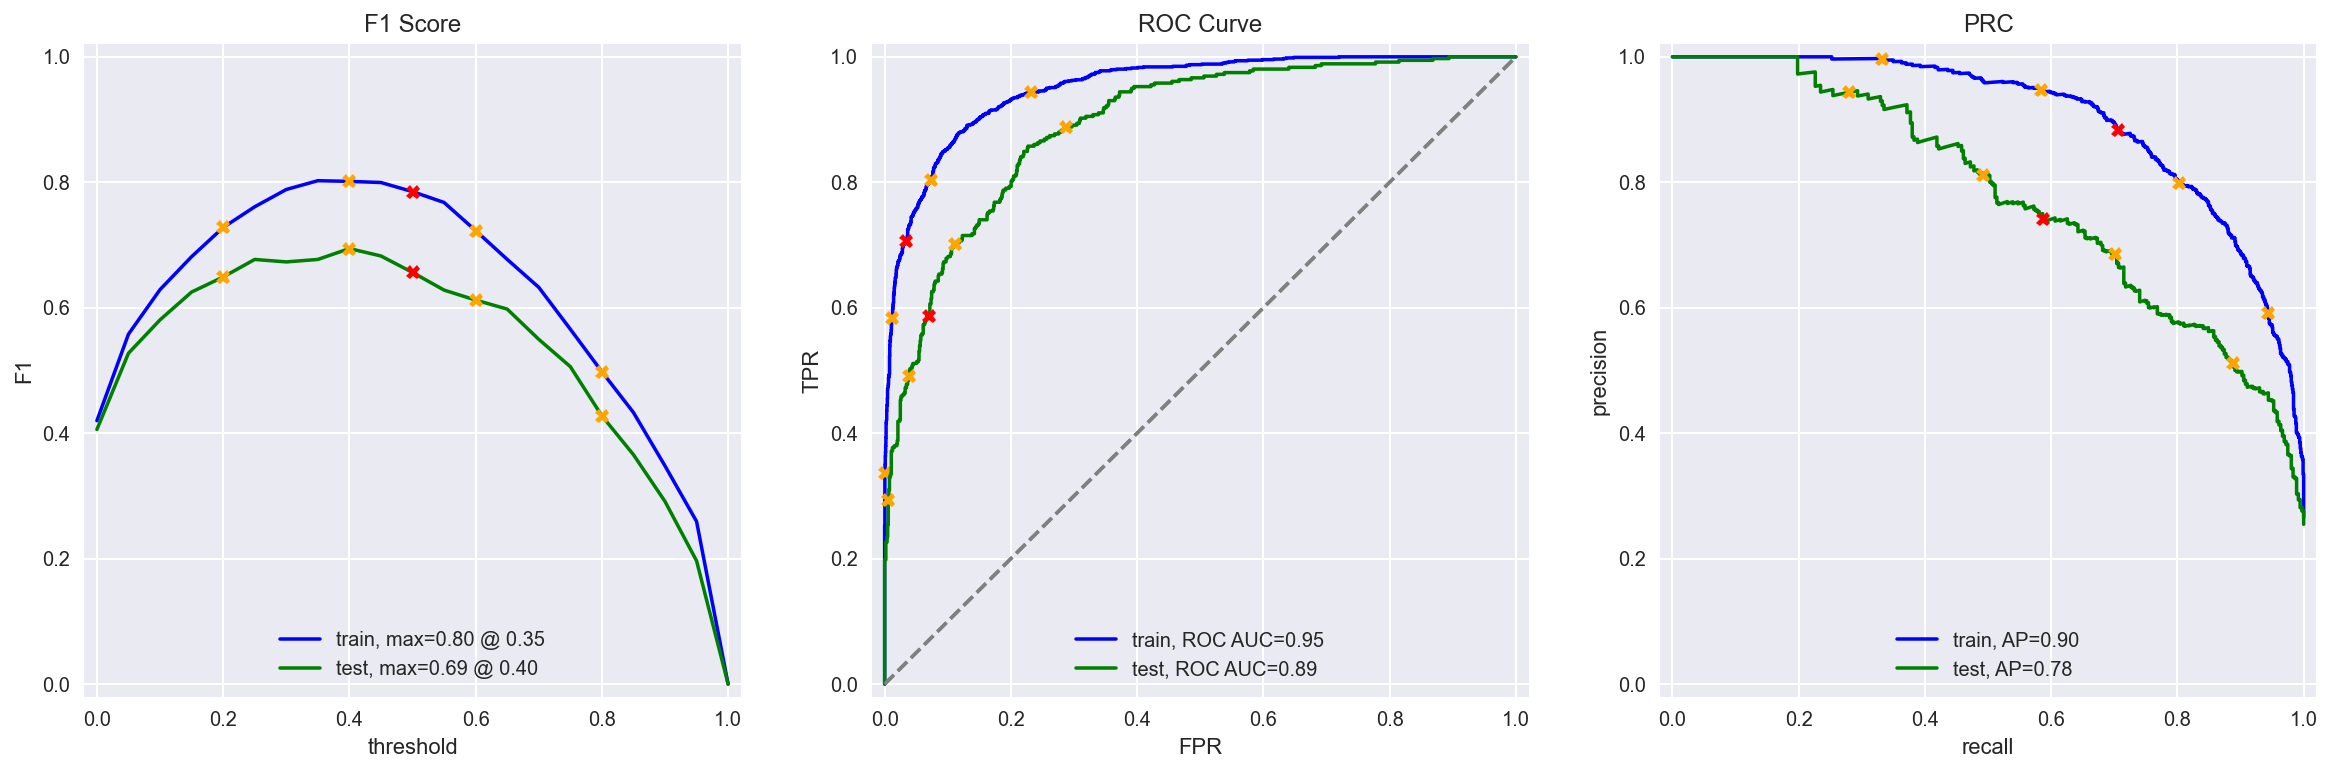

In [129]:
# replace test with val set:

#evaluate_model(catb,
#               X_train_scaled, 
#               np.array(y_train.astype(int)), 
#               X_test_scaled, 
#               np.array(y_test.astype(int)))

evaluate_model(catb,
               X_train_scaled, 
               np.array(y_train.astype(int)), 
               X_val_scaled, #X_test_scaled, 
               np.array(y_val.astype(int))) #np.array(y_test.astype(int)))

Slightly better than lgbm but not significantly better.  
A lot faster though.  
Again, as suspected, gradient boosting is ideal for such a database with heterogenous features (numeric and categorical) and Catboost provides excellent prediction performance. More than the client requests (ROC AUC of 0.88) for the validation set.

Let's examine our model performance for the test set:

          train  test
Accuracy   0.90  0.84
F1         0.79  0.67
APS        0.90  0.80
ROC AUC    0.95  0.89


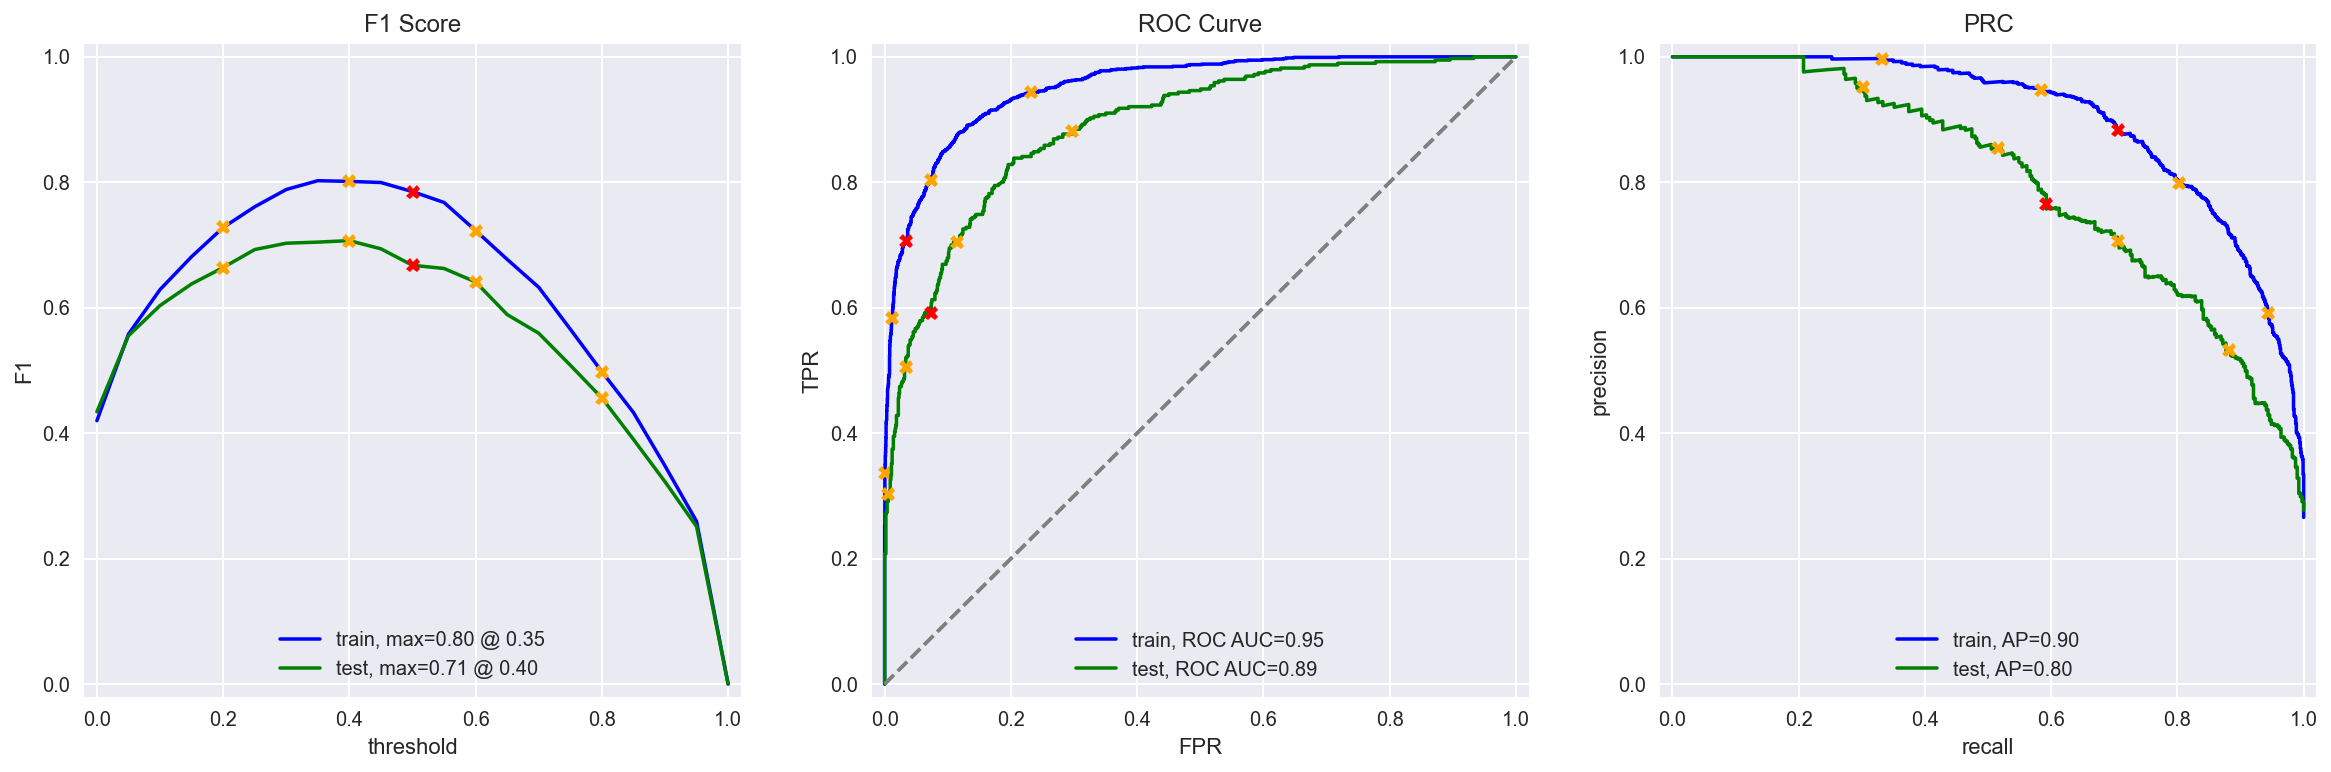

In [132]:
evaluate_model(catb,
               X_train_scaled, 
               np.array(y_train.astype(int)), 
               X_test_scaled,
               np.array(y_test.astype(int)))

We meet the client demand for an ROC-AUC above 0.88 for our test set.  
The validation and test sets provide very similar performance.  
This is reassuring as it indicates stability.  
The accuracy is 84%.  

## Conclusions

1. In this project we were required to predict telecommunications customers churn.  
2. During EDA, we discovered that many months present no churning. In fact, the joining and churning seasonal patterns are very different. This is a very important find. It is a very suspicious outcome. Why are our customers leaving only on specific months? Can we use promotional seasonal sales to improve retention? Do our competitors launch aggressive sales on these months (or a few weeks before)?  
We must return to our clients and ask them to further investigate the matter and to provide us with more customer time related information (streaming history, monthly payment history and so forth).
3. Most churners leave fast, we need to speak with customer support and try to examine what bothered them. Were those technical services, hardware/infrastructure quality?  
We may be able to pinpoint this specific sector churn and improve their retention.
4. Loyal customers that stay longer are typically heavy users with high monthly charges. We should understand what are they finding appealing. We may be able to learn from this insight and improve other sectors/departments experience.
5. Monthly subscription customers are clearly more susceptible to churn relative to one and two year subscriptions. We should offer month to month clients incentives to move to yearly subscriptions. 
6. gender and multiplelines have no effect on churning rates and are irrelevant features for our current study.
7. The clients database is heavily populated with categorical features. This strongly indicates a decision tree based approach should be ideal. Particularly since the data is heterogeneous and also combines a few numeric features. This assumption was proved right after empirical testing.
8. The key technical challenge in this study was to pinpoint the useless features and remove them and only them from our database. The seemingly small resulting performance improvement  is to be treated very seriously. It could translate to very large amounts of money for our clients. It is necessary to find the features 'sweet spot'. Remove the improper features but at the same time avoid removing too many features. The latter causes performance reduction even compared with a full (original/unfiltered) database.
9. We exceeded the client performance request of ROC-AUC above 0.88 and received ROC-AUC=0.89 for our test set (84% accuracy).
10. The validation and test sets provide very similar performance. This is reassuring as it indicates stability.

# Task 3 - Solution report

## Make a report at the end of the Jupyter Notebook with the solution.

In this project we were required to predict telecommunications customers churn.  

In telecommunication, customer retention is key. Acquiring new customers can cost up to 25 times more than retaining existing customers [1]. There are many ways to reduce churn: better products, better delivery methods, lower prices, building satisfactory customer relationships, better marketing and, above all, successful customer communications [2]. Industry retention surveys have shown that while price and product are important, most people leave because of dissatisfaction with the way they are treated. They would not be looking around if they were happy with their current provider, its service and employees [2].  

Using our model, we are able to predict which customers are likely to churn. But, our solution (not model performance!) is still weak because we do not identify the reasons why they churn. In fact, we know nothing on how to improve their retention. Our clients did not focus on this at all. Our database does not provide the necessary information to answer this line of questioning. Therefore, for the following study, I recommend that our clients focus on customer satisfaction surveys.  

EDA demonstrates that:  
* Many months present no churning. In fact, the joining and churning seasonal patterns are very different. This is a very important and suspicious find. Why are our customers leaving only on specific months? Can we use promotional seasonal sales to improve retention? Do our competitors launch aggressive sales on these months (or a few weeks before)? Do we have some sort of problems with our data?  
We must return to our clients and ask them to further investigate the matter and to provide us with more customer time related information (streaming history, monthly payment history and so forth).
* Most churners leave fast, we need to speak with customer support and try to examine what bothered them. Were those technical services, hardware/infrastructure quality? etc.  
We may be able to pinpoint this specific sector churn and improve their retention.
* Loyal customers that stay longer are typically heavy users with high monthly charges. We should understand what are they finding appealing. We may be able to learn from this insight and improve other sectors/departments experience.
* Monthly subscription customers are clearly more susceptible to churn relative to one and two year subscriptions. We should offer month to month clients incentives to move to yearly subscriptions. 
* gender and multiplelines have no effect on churning rates and are irrelevant features for our current study.
* These are our key findings. Additional findings are listed above. Our findings agree well with previous studies [3].  

Our database is relatively small and is heavily populated with categorical features. This strongly indicates a decision tree based approach should be ideal. Particularly since the data is heterogeneous and also combines a few numeric features. There are few canonic decision tree strategies - regular trees, ensembles (like random forest) or gradient boosting. The latter usually performs best and therefore, it made sense to me to use this approach right from the start. Decision trees were demonstrated to perform well and outperform logistic regression in the past [4]. Further supporting my assumption. Luckily, the assumption was proven right after empirical testing. LightGBM and catboost provided the best prediction performance.  

The key technical challenge in this study was to pinpoint the useless features and remove them and only them from our database. The seemingly small resulting performance improvement is to be treated very seriously. It could translate to very large amounts of money for our clients. It is necessary to find the features 'sweet spot'. Remove the improper features but at the same time avoid removing too many features. The latter causes performance reduction even compared with a full (original/unfiltered) database. To detect which features are important, we used the selectKbest selector using the chi squared and mutual information approaches and then removed the joint least contributory features of both approaches from the database.

We exceeded the client performance request of ROC-AUC above 0.88 and received ROC-AUC=0.89 for our test set (84% accuracy). Furthermore, the validation and test sets provide very similar performance. This is reassuring as it indicates stability.

[1] Reducing Customer Churn Is More Cost-Effective Than Chasing New Customers.  
https://www.heavy.ai/use-case/customer-churn-analysis  
[2] Churn reduction in the telecom industry.  
http://www.dbmarketing.com/2010/03/churn-reduction-in-the-telecom-industry/  
[3] Aman Preet Gulati, Published On January 27, 2022 and Last Modified On March 15th, 2022  
Churn Analysis of a Telecom Company  
https://www.analyticsvidhya.com/blog/2022/01/churn-analysis-of-a-telecom-company/  
[4] K. Dahiya and S. Bhatia, "Customer churn analysis in telecom industry," 2015 4th International Conference on Reliability, Infocom Technologies and Optimization (ICRITO) (Trends and Future Directions), 2015, pp. 1-6, doi: 10.1109/ICRITO.2015.7359318.  
https://ieeexplore.ieee.org/document/7359318  

## Answer key questions

### What steps of the plan were performed and what steps were skipped (explain why)?

Comparing my original plan with my final execution for the key steps, we get:  

1. This project data is composed nearly fully of categorical features.  
From my experience, the best approach to work with so many categorical features is to employ decision trees and not neural networks. Particularly since the data is not homogeneous like images but also contains a few numerical features.  
This step was performed as planned.
2. Correcting the imbalance using smote. 
This step was not performed because, luckily, I realized ahead that imputation is not the ideal approach for our categorical-feature heavily populated database.
3. Compare a dummy classifier (mode), decision tree, random forest and catboost algorithms for predicting the churn.
This step was partially performed. I used the dummy classifier but not regular trees or random forest because I realized gradient boosting will outperform these approaches (I suspected from the start that catboost will work best as it is praised for performing well with many categorical features.) Therefore, instead I switched to logistic regression as a baseline classifier and another gradient boosting model - lighgbm as a competitor (it ended working nearly as good as catboost, though much slower).  

The detailed plan stages and their corresponding statuses are:  

1. First I will generate a flat file by merging all datasets on customerID and imputing missing categories with 'missing'.  
Done
2. Generate box plots of the target with the numerical features.  
Done
3. Feature engineer the months as categorical features (see above) and the seniority (already done). 
Done (though month was eventually not used, it did provide very interesting insight).
4. Check the correlation between the target and the features using a chi square test and see if some features can be discarded.  
Done
5. I will then one hot encode all categorical features as they are all low-cardinality.  
Done
6. Minmax scale the data (It is clearly not normal)  
Done
7. Establish a train (60%) - validation (20%) - test (20%) process.  
Done
8. Train the models  
Done
9. Verify that the best performing one (KFOLD selection) meets the clients AUC-ROC and accuracy demands (test data).  
Done, but with a regular validation set, not KFold. (I felt that the database is small and the features are relatively clean with little to no outliers. Therefore, there was no need to over-complicate the task at hand if the client performance requirements can be met with a simpler approach).  
9. Write the appropriate conclusions.  
Done

Overall, my original plan and finall execution were reasonably corresponding.

### What difficulties did you encounter and how did you manage to solve them?

As listed above, the key technical challenge in this study was to pinpoint the useless features and then remove them and only them from our database. Particularly since they were categorical features and we could not use the traditional correlation matrix. This required finding the selectKbest selector approach and implementing it once with chi2 for the categorical features and once with mutual information (cross entropy) for the entire database. Then, realizing that removing the joint least contributory features of both approaches from the database will get the job done.  
The remaining tasks related to this project were a lot easier to accomplish and more traditional for me.

### What were some of the key steps to solving the task?

They are summarized above in 5.2.1 - the detailed plan stages.

### What is your final model and what quality score does it have?

My chosen model is catboost.  
The performance summary for the test set is:  

Accuracy -  0.84  
F1       -  0.67  
APS      -  0.80  
ROC AUC  -  0.89  

The validation and test sets provide very similar performance.  
This is reassuring as it indicates stability.  

The reviewer granted me 6 SP.

# Check List

Here are some of the criteria used by the project reviewers:
- [x]  Have you performed all the steps?
- [x]  Does the solution match the task condition?
- [x]  Have you trained and tested the model correctly?
- [x]  What is the quality score of the best model?  
(above the required 0.91)
- [x]  Have you kept to the project structure?
- [x]  Have you kept the code neat?
- [x]  Did you answer all the questions?
- [x]  Are the answers clear?